In [1]:
import graph_lib as gr
import graph_path as gr_path


from torch_geometric.datasets import TUDataset
import random
import networkx as nx
from torch_geometric.utils.convert import to_networkx,from_networkx
import matplotlib.pyplot as plt
import numpy as np
import torch
import ot
import math
import seaborn as sns

C:\Users\ekima\anaconda3\envs\graphs\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\ekima\anaconda3\envs\graphs\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


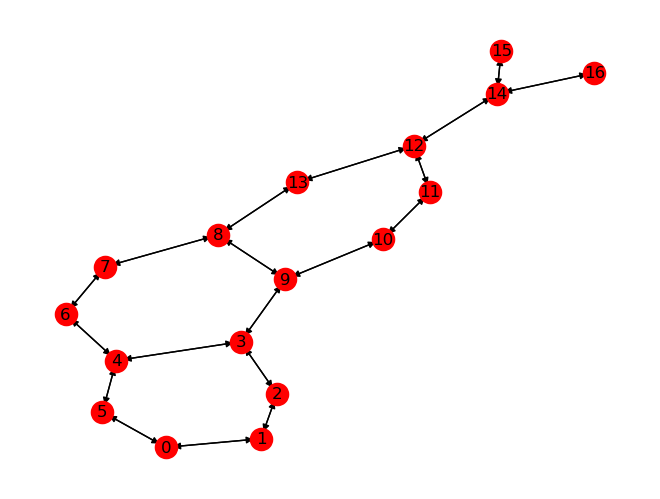

In [2]:
dataset = TUDataset('data', name='MUTAG')
gr.draw_graph(dataset[0])

## Graphs for the same histograms  

Graph generation with the same histograms of node degrees and TMD distance at different levels. 

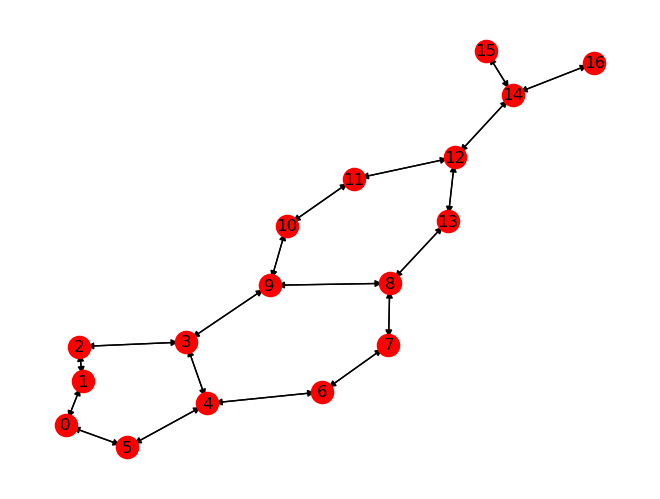

In [3]:
# example of the graph
gr.draw_graph(dataset[0])

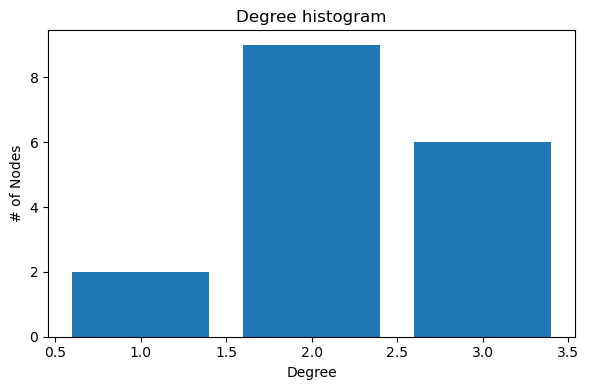

Degree sequence:  [2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 1]
Degree histogram:  [0, 2, 9, 6]


In [4]:
d1 = dataset[0]
degrees = gr.get_distrib(d1)
max_degree = max(degrees) + 1
h = []
for v in range(max_degree):
    h.append(degrees.count(v))
gr.plot_distr_plot(d1)
print("Degree sequence: ", degrees)
print("Degree histogram: ", h)

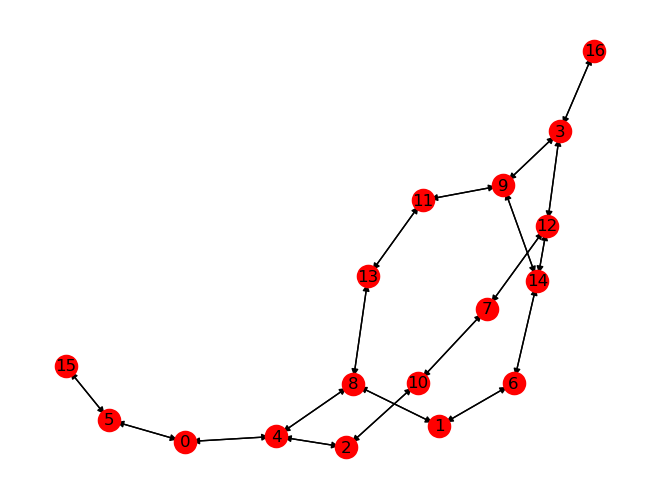

Dist dataset 0 - generated, level = 2 :  0.0
Dist dataset 0 - generated, level = 3 :  6.0
Dist dataset 0 - generated, level = 4 :  32.0


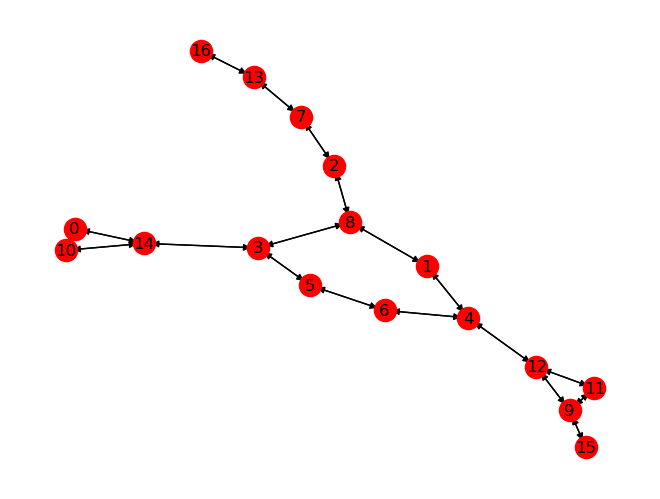

Dist dataset 0 - generated, level = 2 :  0.0
Dist dataset 0 - generated, level = 3 :  4.0
Dist dataset 0 - generated, level = 4 :  24.0


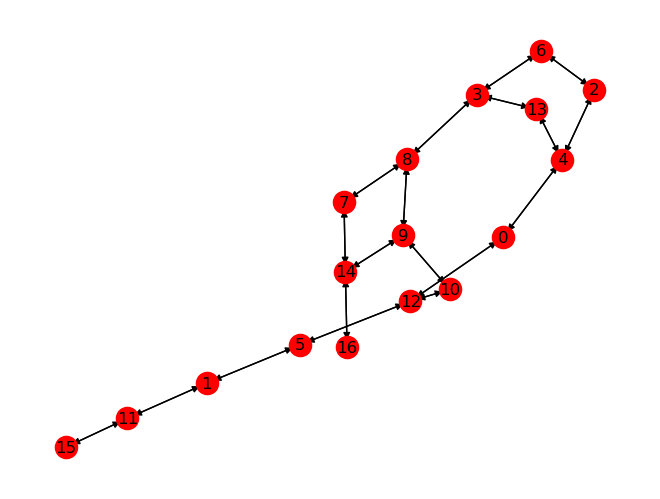

Dist dataset 0 - generated, level = 2 :  0.0
Dist dataset 0 - generated, level = 3 :  8.0
Dist dataset 0 - generated, level = 4 :  38.0


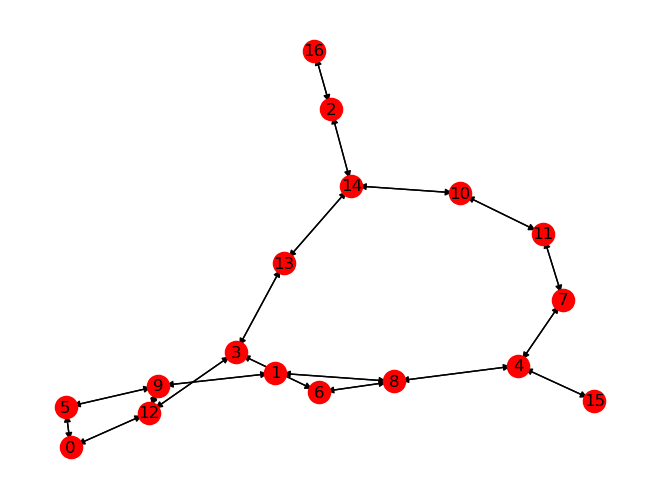

Dist dataset 0 - generated, level = 2 :  0.0
Dist dataset 0 - generated, level = 3 :  8.0
Dist dataset 0 - generated, level = 4 :  32.0


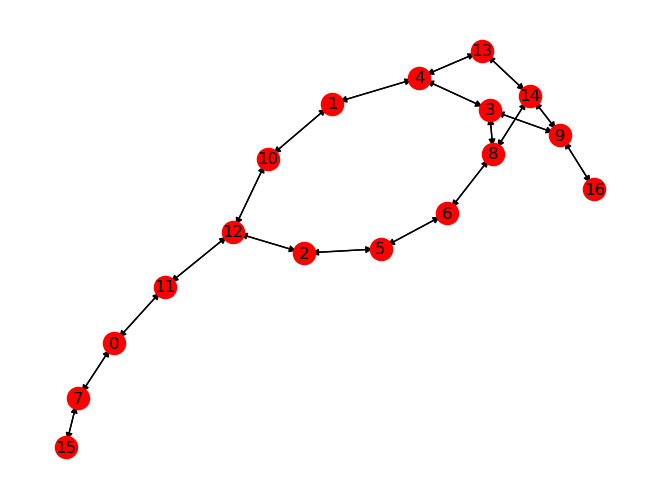

Dist dataset 0 - generated, level = 2 :  0.0
Dist dataset 0 - generated, level = 3 :  8.0
Dist dataset 0 - generated, level = 4 :  42.0


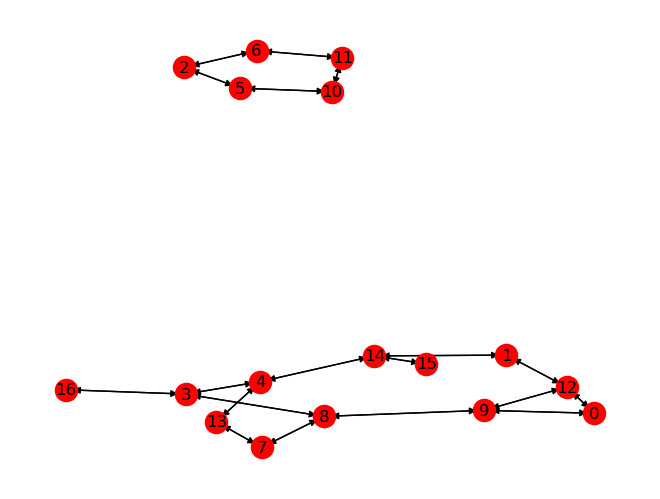

Dist dataset 0 - generated, level = 2 :  0.0
Dist dataset 0 - generated, level = 3 :  8.0
Dist dataset 0 - generated, level = 4 :  40.0


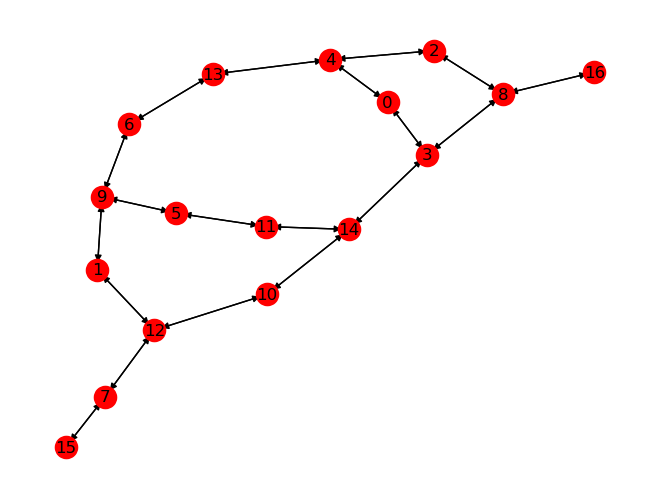

Dist dataset 0 - generated, level = 2 :  0.0
Dist dataset 0 - generated, level = 3 :  12.0
Dist dataset 0 - generated, level = 4 :  48.0


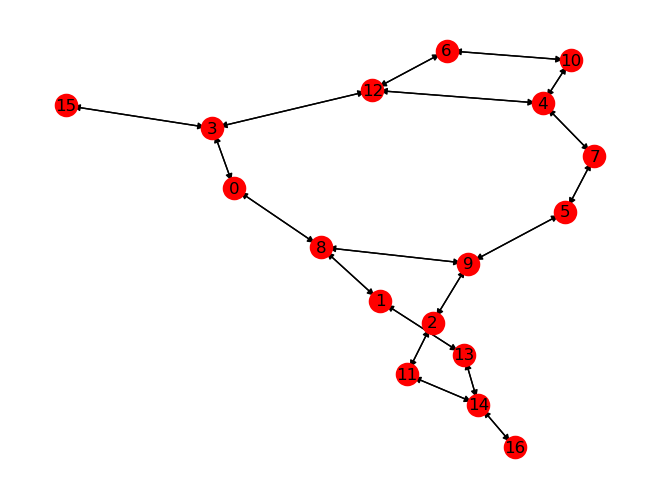

Dist dataset 0 - generated, level = 2 :  0.0
Dist dataset 0 - generated, level = 3 :  6.0
Dist dataset 0 - generated, level = 4 :  28.0


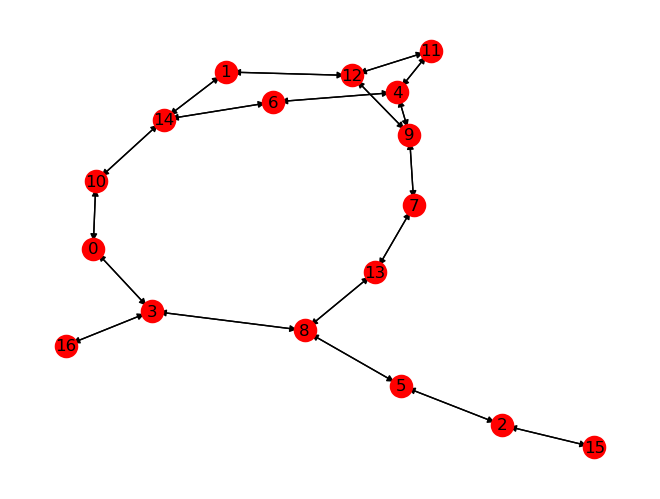

Dist dataset 0 - generated, level = 2 :  0.0
Dist dataset 0 - generated, level = 3 :  8.0
Dist dataset 0 - generated, level = 4 :  36.0


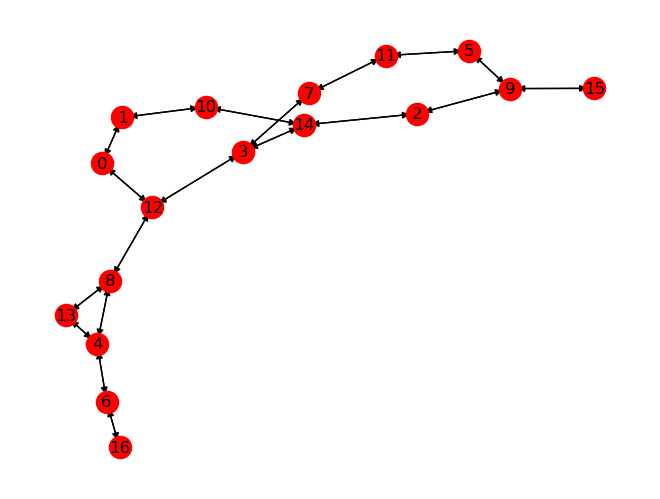

Dist dataset 0 - generated, level = 2 :  0.0
Dist dataset 0 - generated, level = 3 :  6.0
Dist dataset 0 - generated, level = 4 :  34.0


In [5]:
for i in range(10):
    draw = degrees
    is_good = False
    while(not is_good):
        z = list(draw)
        G = nx.configuration_model(z)
        G = nx.Graph(G)
        G.remove_edges_from(nx.selfloop_edges(G))

        actual_degrees = [d for v, d in G.degree()]
        is_good = actual_degrees == z
    # plot_graph(G)
    new_G = from_networkx(G)
    new_G.x = torch.ones(new_G.num_nodes, 1)
    gr.draw_graph(new_G)
    wass_2 = gr.TMD_original(d1, new_G, 1, L=2)
    wass_3 = gr.TMD_original(d1, new_G, 1, L=3)
    wass_4 = gr.TMD_original(d1, new_G, 1, L=4)

    print("Dist dataset 0 - generated, level = 2 : ", wass_2[3])
    print("Dist dataset 0 - generated, level = 3 : ", wass_3[3])
    print("Dist dataset 0 - generated, level = 4 : ", wass_4[3])

## Following the path

Adding edges to an original graph in order to move to a destination graph with the same step in terms of TMD distance on the level 2.

In [6]:
# set datasets
d2 = dataset[0]
d1 = dataset[1]

# calculate histograms
a1, a2, max_max = gr.calc_distrib(d1, d2)
# add empty nodes if needed
diff = sum(a2) - sum(a1) 
if diff > 0:
    a1[0] = diff
    coragraph = to_networkx(d1)
    while diff > 0:
        coragraph.add_node(max(list(coragraph.nodes))+1)
        diff = diff - 1
    d1_filled = from_networkx(coragraph)
    d1_filled.x = torch.ones(len(list(coragraph.nodes)), 1)
    print('Change 1')
elif diff < 0: 
    a2[0] = abs(diff)
    coragraph = to_networkx(d2)
    while diff < 0:
        coragraph.add_node(max(list(coragraph.nodes))+1)
        diff = diff + 1
    d2_filled = from_networkx(coragraph)
    d2_filled.x = torch.ones(len(list(coragraph.nodes)), 1)
    print('Change 2')
cost_matrix = gr_path.get_cost_matrix(max_max)

# dist_1, dist_2, M, wass = TMD(d1, d2, 1, L=l)
path, d = ot.emd(a1, a2, cost_matrix, log=True) 

Change 1


C:\Users\ekima\AppData\Local\Temp\ipykernel_2292\63158944.py:30: UserWarning: Input histogram consists of integer. The transport plan will be casted accordingly, possibly resulting in a loss of precision. If this behaviour is unwanted, please make sure your input histogram consists of floating point elements.
  path, d = ot.emd(a1, a2, cost_matrix, log=True)


In [7]:
# graph degrees
a1,a2

([4, 2, 7, 4], [0, 2, 9, 6])

In [8]:
g1 = to_networkx(d1_filled)
g1 = g1.to_undirected()

In [9]:
path

array([[0, 2, 0, 2],
       [0, 0, 2, 0],
       [0, 0, 7, 0],
       [0, 0, 0, 4]])

In [10]:
# update path to have only actions to change by one degree
path = gr_path.update_path(path)
path

3
0 1
3
1 2
3
2 3


array([[0, 4, 0, 0],
       [0, 0, 4, 0],
       [0, 0, 7, 2],
       [0, 0, 0, 4]])

all nodes:  [[13, 14, 15, 16], [11, 12], [0, 1, 3, 4, 5, 6, 9], [2, 7, 8, 10]]
[4, 4, 2] [4, 2, 7, 4]
[4, 4, 2] [4, 2, 7, 4]
weights:  [16, 8, 14]
[4, 3, 2] [4, 1, 7, 4]
weights:  [16, 3, 14]
actions:  1 0
Nodes:  11 15
Path sum:  8


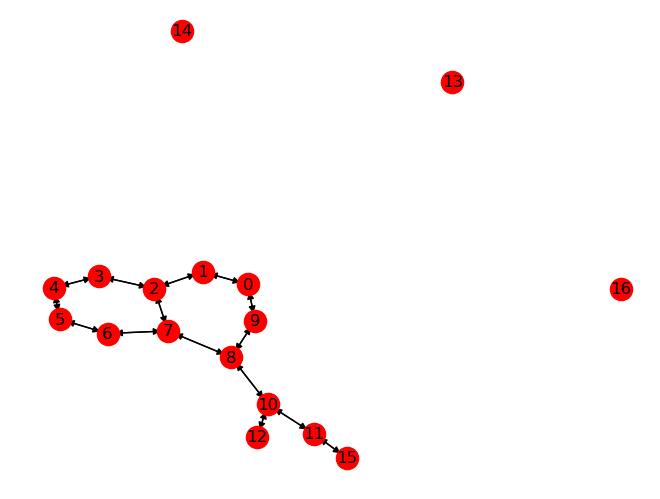

Distance between original graphs:  10.0
Distance to the first graph:  2.0
Distance to the second graph:  8.0
**********
Distance between original graphs, level = 3:  36.0
Distance to the first graph, level = 3:  6.0
Distance to the second graph, level = 3:  30.0
**********
Distance between original graphs, level = 4:  102.0
Distance to the first graph, level = 4:  16.0
Distance to the second graph, level = 4:  86.0
all nodes:  [[13, 14, 16], [12, 15], [0, 1, 3, 4, 5, 6, 9, 11], [2, 7, 8, 10]]
[3, 3, 2] [3, 2, 8, 4]
[3, 3, 2] [3, 2, 8, 4]
weights:  [9, 6, 16]
[2, 3, 2] [2, 2, 8, 4]
weights:  [4, 6, 16]
actions:  0 1
Nodes:  13 15
Path sum:  6


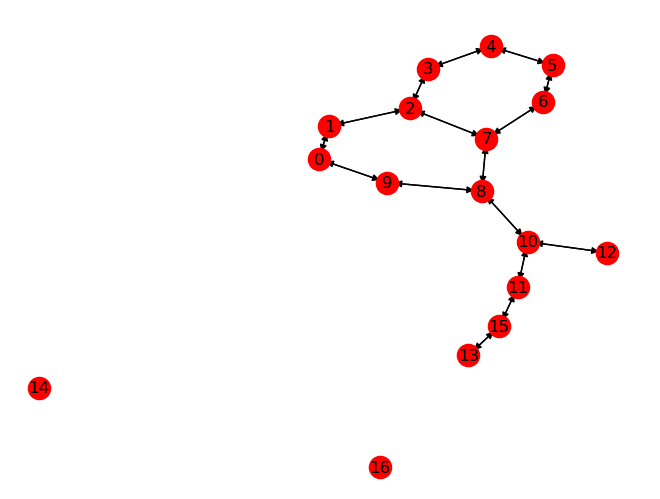

Distance between original graphs:  10.0
Distance to the first graph:  4.0
Distance to the second graph:  6.0
**********
Distance between original graphs, level = 3:  36.0
Distance to the first graph, level = 3:  12.0
Distance to the second graph, level = 3:  24.0
**********
Distance between original graphs, level = 4:  102.0
Distance to the first graph, level = 4:  30.0
Distance to the second graph, level = 4:  72.0
all nodes:  [[14, 16], [12, 13], [0, 1, 3, 4, 5, 6, 9, 11, 15], [2, 7, 8, 10]]
[2, 2, 2] [2, 2, 9, 4]
[2, 2, 2] [2, 2, 9, 4]
weights:  [4, 4, 18]
[2, 2, 1] [2, 2, 8, 4]
weights:  [4, 4, 8]
actions:  2 1
Nodes:  0 12
Path sum:  4


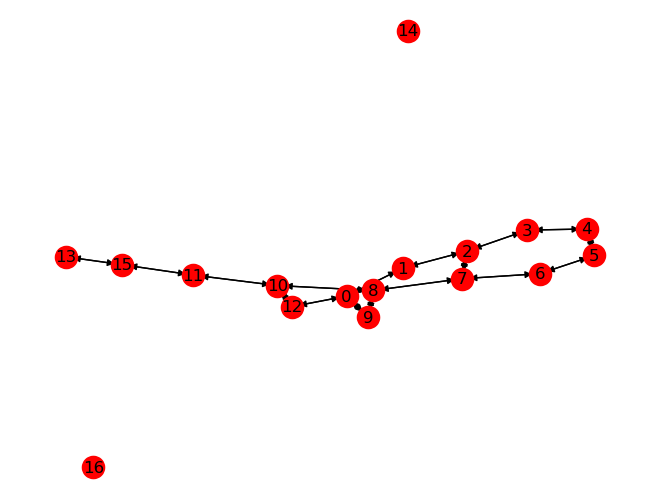

Distance between original graphs:  10.0
Distance to the first graph:  6.0
Distance to the second graph:  4.0
**********
Distance between original graphs, level = 3:  36.0
Distance to the first graph, level = 3:  22.0
Distance to the second graph, level = 3:  18.0
**********
Distance between original graphs, level = 4:  102.0
Distance to the first graph, level = 4:  66.0
Distance to the second graph, level = 4:  58.0
all nodes:  [[14, 16], [13], [1, 3, 4, 5, 6, 9, 11, 12, 15], [0, 2, 7, 8, 10]]
[2, 1, 1] [2, 1, 9, 5]
[2, 1, 1] [2, 1, 9, 5]
weights:  [4, 1, 9]
[2, 1, 0] [2, 1, 8, 5]
weights:  [4, 1, 0]
actions:  2 0
Nodes:  3 14
Path sum:  2


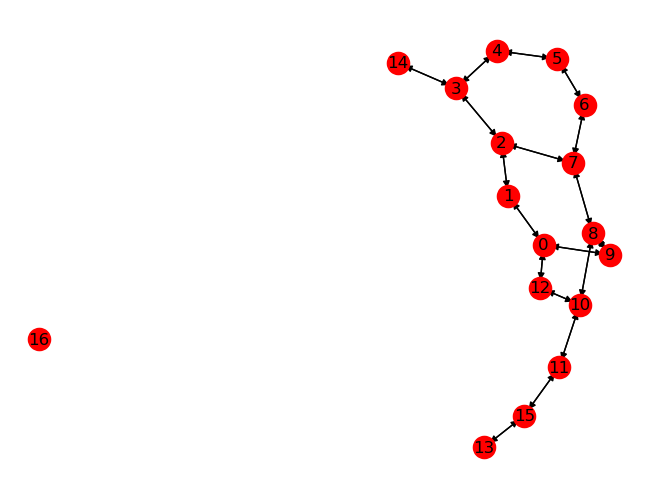

Distance between original graphs:  10.0
Distance to the first graph:  8.0
Distance to the second graph:  2.0
**********
Distance between original graphs, level = 3:  36.0
Distance to the first graph, level = 3:  30.0
Distance to the second graph, level = 3:  14.0
**********
Distance between original graphs, level = 4:  102.0
Distance to the first graph, level = 4:  90.0
Distance to the second graph, level = 4:  52.0
all nodes:  [[16], [13, 14], [1, 4, 5, 6, 9, 11, 12, 15], [0, 2, 3, 7, 8, 10]]
[1, 1, 0] [1, 2, 8, 6]
[1, 1, 0] [1, 2, 8, 6]
weights:  [1, 2, 0]
[0, 1, 0] [0, 2, 8, 6]
weights:  [0, 2, 0]
actions:  0 1
Nodes:  16 14
Path sum:  0


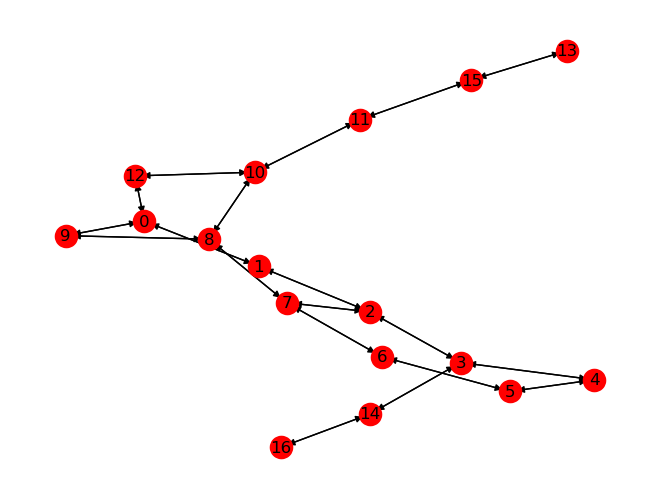

Distance between original graphs:  10.0
Distance to the first graph:  10.0
Distance to the second graph:  0.0
**********
Distance between original graphs, level = 3:  36.0
Distance to the first graph, level = 3:  36.0
Distance to the second graph, level = 3:  10.0
**********
Distance between original graphs, level = 4:  102.0
Distance to the first graph, level = 4:  106.0
Distance to the second graph, level = 4:  42.0


In [11]:
path_sum = 1
while path_sum > 0:
    g1, path, path_sum = gr_path.run_step(g1, path)
    gr_path.run_check(g1, d1_filled, d2)

## Barycenter for two distributions 

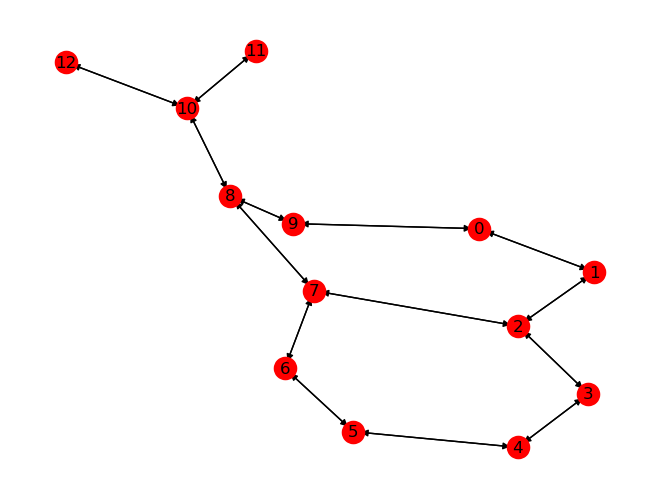

In [12]:
gr.draw_graph(dataset[1])

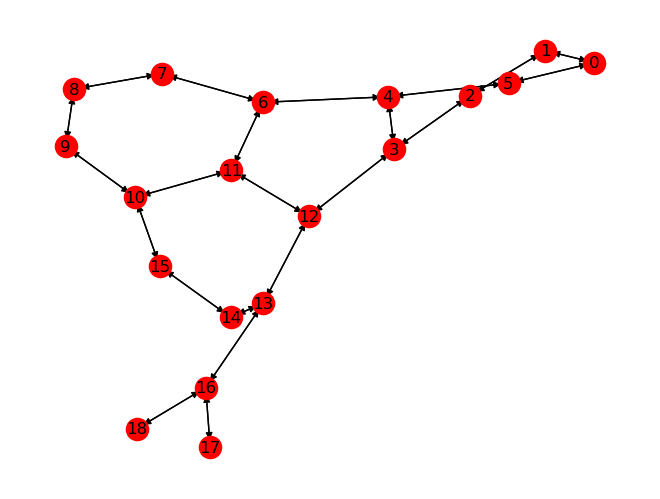

In [13]:
gr.draw_graph(dataset[3])

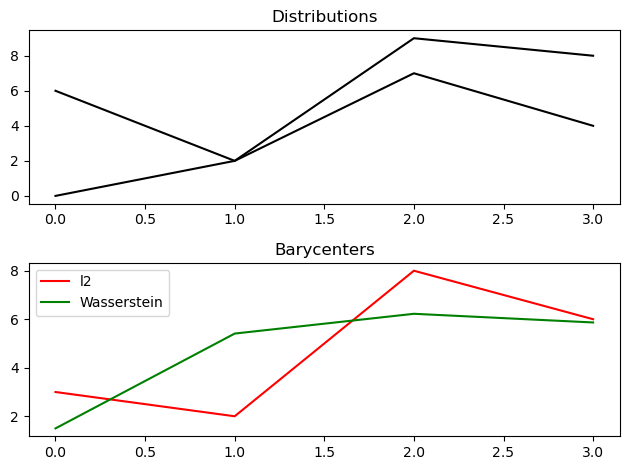

Initial distributions:  [6, 2, 7, 4] [0, 2, 9, 8]
Average:  [3. 2. 8. 6.]
Wasserstein:  [1.50000713 5.40905544 6.22426826 5.86666917]


In [14]:
d1 = dataset[1]
d2 = dataset[3]
# L = 2
a1, a2, max_max = gr.calc_distrib(d1, d2)
diff = sum(a2) - sum(a1) 
if diff > 0:
    a1[0] = diff
elif diff < 0: 
    a2[0] = abs(diff)
    

# dist_1, dist_2, M, real_wass = TMD(d1, d2, 1, L=L)
bary_l2, bary_wass = gr.calc_barycenter(a1, a2, max_max, alpha=0.5, reg=1e-3)
print("Initial distributions: ", a1, a2)
print("Average: ", bary_l2)
print("Wasserstein: ", bary_wass)

## Barycenter, example 1

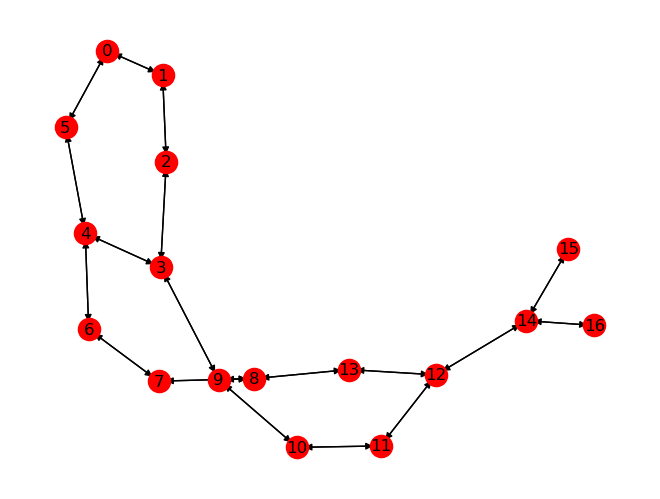

In [15]:
gr.draw_graph(dataset[0])

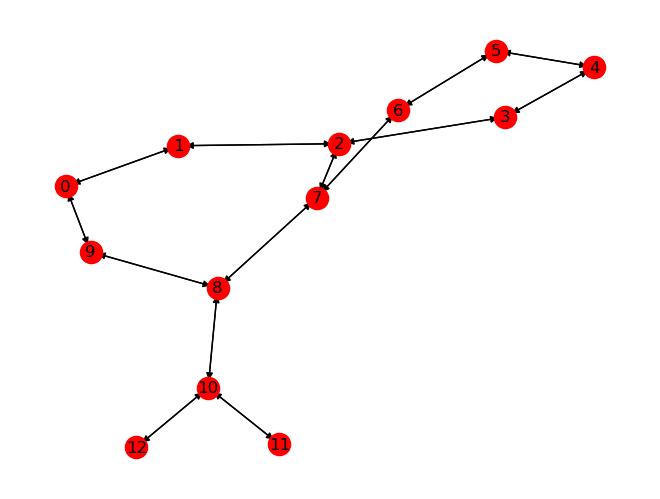

In [16]:
gr.draw_graph(dataset[1])

In [17]:
# set datasets
d1 = dataset[0]
d2 = dataset[1]

# calculate histograms
a1, a2, max_max = gr.calc_distrib(d1, d2)
# aff empty nodes if needed
diff = sum(a2) - sum(a1) 
if diff > 0:
    a1[0] = diff
    coragraph = to_networkx(d1)
    while diff > 0:
        coragraph.add_node(max(list(coragraph.nodes)))
        diff = diff - 1
    d1 = from_networkx(coragraph)
    d1.x = torch.ones(len(list(coragraph.nodes)), 1)
elif diff < 0: 
    a2[0] = abs(diff)
    coragraph = to_networkx(d2)
    while diff < 0:
        coragraph.add_node(max(list(coragraph.nodes))+1)
        diff = diff + 1
    d2 = from_networkx(coragraph)
    d2.x = torch.ones(len(list(coragraph.nodes)), 1)

Alpha:  0.0
[0.35890196 1.84864616 8.7515484  6.04090348]
Original histogramm 1:  [0, 2, 9, 6]
Wassernstein histogramm:  [0, 2, 9, 6]
Original histogramm 2:  [4, 2, 7, 4]
Layer =  2
Dist dataset 0 - dataset 1:  10.0
Dist dataset 0 - intermediate:  0.0
Dist intermediate - dataset 1:  10.0
Dist intermediate, sums:  10.0
Layer =  3
Dist dataset 0 - dataset 1:  36.0
Dist dataset 0 - intermediate:  8.0
Dist intermediate - dataset 1:  36.0
Dist intermediate, sums:  44.0
Layer =  4
Dist dataset 0 - dataset 1:  102.0
Dist dataset 0 - intermediate:  42.0
Dist intermediate - dataset 1:  106.0
Dist intermediate, sums:  148.0


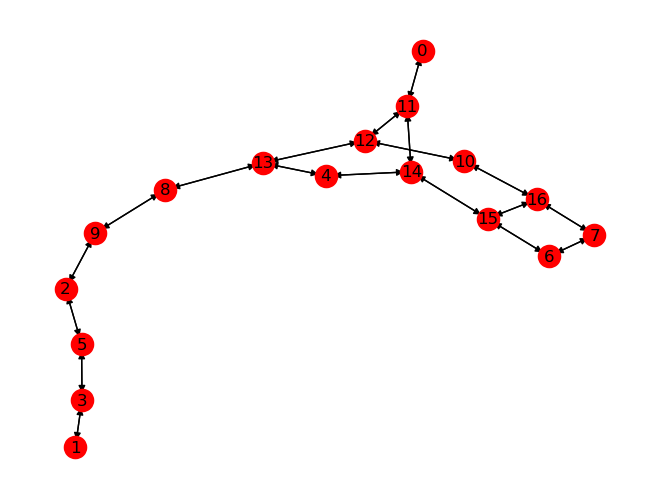

Alpha:  0.1
[0.47506783 2.24576479 8.34756712 5.93160026]
Original histogramm 1:  [0, 2, 9, 6]
Wassernstein histogramm:  [1, 2, 8, 6]
Original histogramm 2:  [4, 2, 7, 4]
Layer =  2
Dist dataset 0 - dataset 1:  10.0
Dist dataset 0 - intermediate:  2.0
Dist intermediate - dataset 1:  8.0
Dist intermediate, sums:  10.0
Layer =  3
Dist dataset 0 - dataset 1:  36.0
Dist dataset 0 - intermediate:  10.0
Dist intermediate - dataset 1:  30.0
Dist intermediate, sums:  40.0
Layer =  4
Dist dataset 0 - dataset 1:  102.0
Dist dataset 0 - intermediate:  34.0
Dist intermediate - dataset 1:  88.0
Dist intermediate, sums:  122.0


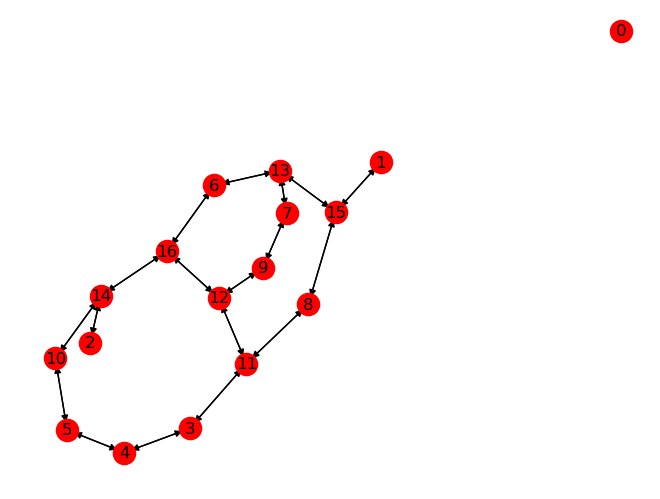

Alpha:  0.2
[0.64757322 3.0842235  7.47006944 5.79813385]
[0.66742796 3.140863   7.40817437 5.78353467]
[0.68737024 3.18412347 7.35984036 5.76866593]
[0.70736996 3.2158232  7.32334408 5.75346276]
[0.72744539 3.23901319 7.29569099 5.73785043]
[0.74764152 3.2569946  7.27360776 5.72175613]
[0.76800881 3.27261131 7.25426377 5.7051161 ]
[0.78859101 3.28797111 7.23556056 5.68787732]
[0.80942191 3.30443286 7.21615638 5.66998885]
[0.83052254 3.32287715 7.19517086 5.65142944]
[0.8519085  3.3436527  7.17228191 5.63215689]
[0.87358811 3.36686926 7.14740075 5.61214188]
[0.89556526 3.39245295 7.12062422 5.59135757]
[0.9178419  3.42018499 7.09220479 5.56976832]
[0.94041341 3.44987675 7.06233387 5.54737597]
[0.9632777  3.4811943  7.03137972 5.52414827]
[0.98642972 3.51382299 6.99967734 5.50006996]
[1.0098632  3.54743916 6.96756749 5.47513016]
[1.03357087 3.5817176  6.93538828 5.44932325]
[1.05754455 3.61633654 6.90346916 5.42264975]
[1.08177525 3.65098139 6.87212623 5.39511713]
[1.10625316 3.68534782

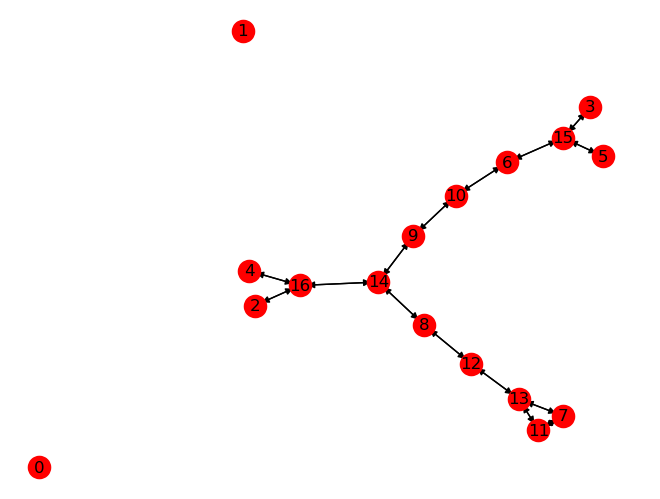

Alpha:  0.30000000000000004
[0.8519085  3.3436527  7.17228191 5.63215689]
[0.87358811 3.36686926 7.14740075 5.61214188]
[0.89556526 3.39245295 7.12062422 5.59135757]
[0.9178419  3.42018499 7.09220479 5.56976832]
[0.94041341 3.44987675 7.06233387 5.54737597]
[0.9632777  3.4811943  7.03137972 5.52414827]
[0.98642972 3.51382299 6.99967734 5.50006996]
[1.0098632  3.54743916 6.96756749 5.47513016]
[1.03357087 3.5817176  6.93538828 5.44932325]
[1.05754455 3.61633654 6.90346916 5.42264975]
[1.08177525 3.65098139 6.87212623 5.39511713]
[1.10625316 3.68534782 6.84165833 5.3667407 ]
[1.13096771 3.71914469 6.81234332 5.33754427]
[1.15590761 3.75209689 6.78443474 5.30756076]
[1.1810608  3.7839481  6.75815849 5.27683261]
[1.20641448 3.81446363 6.73370996 5.24541193]
[1.23195509 3.84343295 6.71125147 5.21336049]
[1.2576683  3.87067198 6.69091034 5.18074937]
[1.28353899 3.89602498 6.67277767 5.14765836]
[1.30955121 3.91936583 6.65690792 5.11417504]
[1.33568818 3.94059873 6.64331946 5.08039363]
[1.361

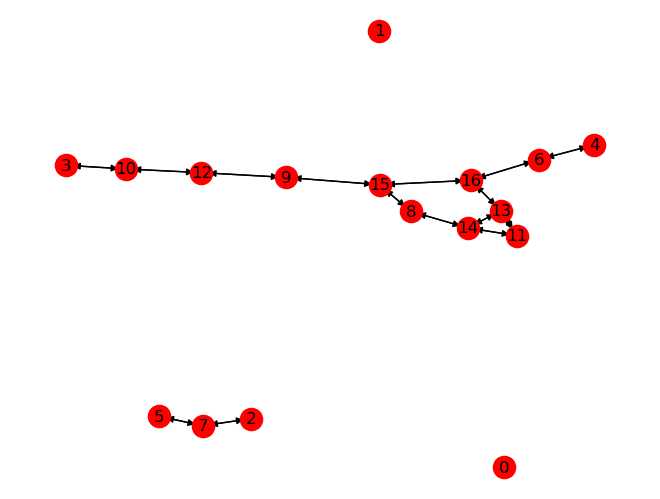

Alpha:  0.4
[1.08177525 3.65098139 6.87212623 5.39511713]
[1.10625316 3.68534782 6.84165833 5.3667407 ]
[1.13096771 3.71914469 6.81234332 5.33754427]
[1.15590761 3.75209689 6.78443474 5.30756076]
[1.1810608  3.7839481  6.75815849 5.27683261]
[1.20641448 3.81446363 6.73370996 5.24541193]
[1.23195509 3.84343295 6.71125147 5.21336049]
[1.2576683  3.87067198 6.69091034 5.18074937]
[1.28353899 3.89602498 6.67277767 5.14765836]
[1.30955121 3.91936583 6.65690792 5.11417504]
[1.33568818 3.94059873 6.64331946 5.08039363]
[1.36193222 3.95965821 6.63199598 5.0464136 ]
[1.38826474 3.97650836 6.62288884 5.01233805]
[1.41466619 3.99114158 6.61592021 4.97827202]
[1.44111599 4.00357655 6.6109868  4.94432066]
[1.46759253 4.01385586 6.60796416 4.91058745]
[1.49407304 4.02204331 6.60671117 4.87717248]
[1.52053362 4.02822089 6.60707466 4.84417083]
[1.54694917 4.03248579 6.60889383 4.81167121]
[1.57329334 4.03494745 6.61200447 4.77975475]
[1.59953855 4.03572465 6.61624272 4.74849408]
[1.62565607 4.03494291

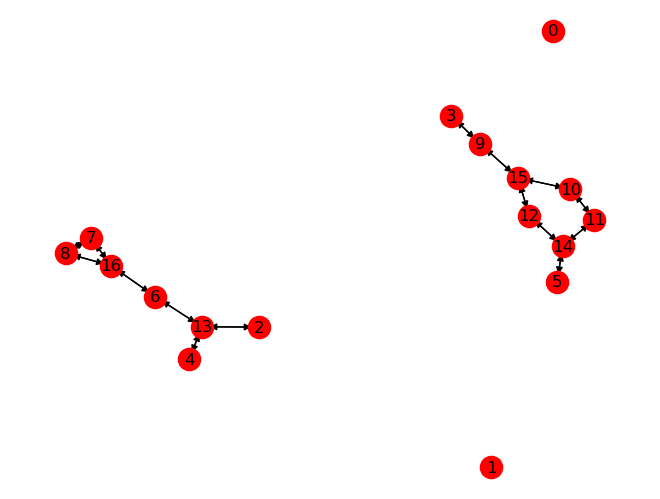

Alpha:  0.5
[1.33568818 3.94059873 6.64331946 5.08039363]
[1.36193222 3.95965821 6.63199598 5.0464136 ]
[1.38826474 3.97650836 6.62288884 5.01233805]
[1.41466619 3.99114158 6.61592021 4.97827202]
[1.44111599 4.00357655 6.6109868  4.94432066]
[1.46759253 4.01385586 6.60796416 4.91058745]
[1.49407304 4.02204331 6.60671117 4.87717248]
[1.52053362 4.02822089 6.60707466 4.84417083]
[1.54694917 4.03248579 6.60889383 4.81167121]
[1.57329334 4.03494745 6.61200447 4.77975475]
[1.59953855 4.03572465 6.61624272 4.74849408]
[1.62565607 4.03494291 6.6214483  4.71795273]
[1.65161608 4.03273198 6.62746722 4.68818471]
[1.67738796 4.02922367 6.63415393 4.65923444]
[1.70294065 4.0245497  6.6413728  4.63113685]
Original histogramm 1:  [0, 2, 9, 6]
Wassernstein histogramm:  [2, 4, 7, 4]
Original histogramm 2:  [4, 2, 7, 4]
Layer =  2
Dist dataset 0 - dataset 1:  10.0
Dist dataset 0 - intermediate:  8.0
Dist intermediate - dataset 1:  2.0
Dist intermediate, sums:  10.0
Layer =  3
Dist dataset 0 - dataset 1

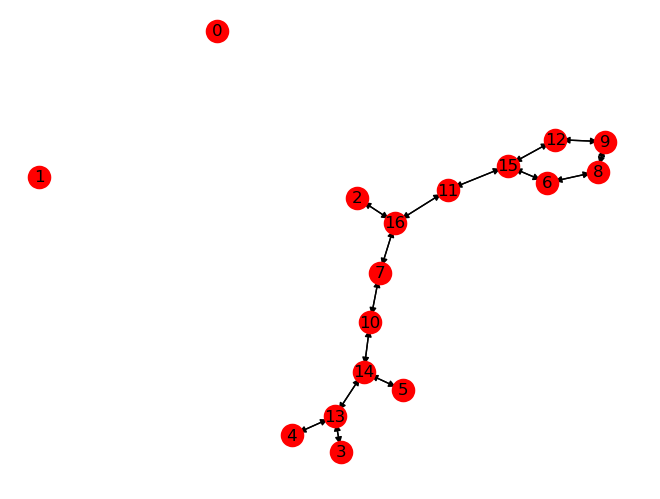

Alpha:  0.6000000000000001
[1.59953855 4.03572465 6.61624272 4.74849408]
[1.62565607 4.03494291 6.6214483  4.71795273]
[1.65161608 4.03273198 6.62746722 4.68818471]
[1.67738796 4.02922367 6.63415393 4.65923444]
[1.70294065 4.0245497  6.6413728  4.63113685]
Original histogramm 1:  [0, 2, 9, 6]
Wassernstein histogramm:  [2, 4, 7, 4]
Original histogramm 2:  [4, 2, 7, 4]
Layer =  2
Dist dataset 0 - dataset 1:  10.0
Dist dataset 0 - intermediate:  8.0
Dist intermediate - dataset 1:  2.0
Dist intermediate, sums:  10.0
Layer =  3
Dist dataset 0 - dataset 1:  36.0
Dist dataset 0 - intermediate:  32.0
Dist intermediate - dataset 1:  16.0
Dist intermediate, sums:  48.0
Layer =  4
Dist dataset 0 - dataset 1:  102.0
Dist dataset 0 - intermediate:  106.0
Dist intermediate - dataset 1:  52.0
Dist intermediate, sums:  158.0


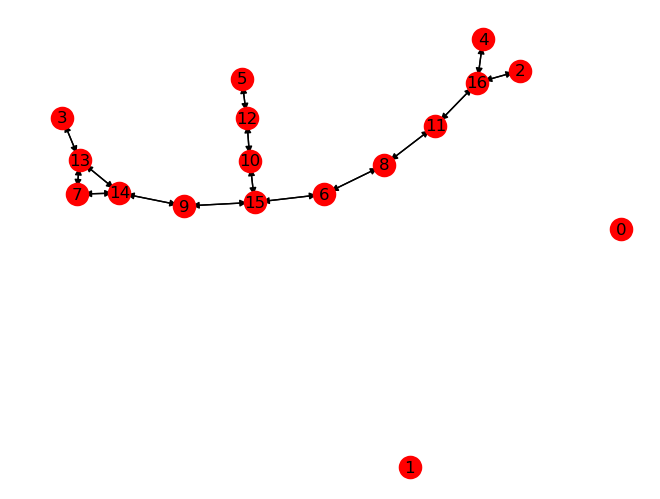

Alpha:  0.7000000000000001
[1.85013311 3.97884011 6.68969385 4.48133293]
Original histogramm 1:  [0, 2, 9, 6]
Wassernstein histogramm:  [2, 4, 7, 4]
Original histogramm 2:  [4, 2, 7, 4]
Layer =  2
Dist dataset 0 - dataset 1:  10.0
Dist dataset 0 - intermediate:  8.0
Dist intermediate - dataset 1:  2.0
Dist intermediate, sums:  10.0
Layer =  3
Dist dataset 0 - dataset 1:  36.0
Dist dataset 0 - intermediate:  32.0
Dist intermediate - dataset 1:  16.0
Dist intermediate, sums:  48.0
Layer =  4
Dist dataset 0 - dataset 1:  102.0
Dist dataset 0 - intermediate:  104.0
Dist intermediate - dataset 1:  52.0
Dist intermediate, sums:  156.0


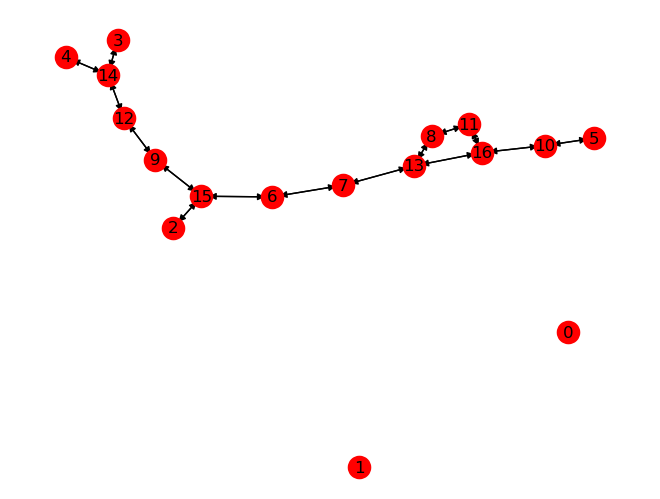

Alpha:  0.8
[2.10408836 3.83752693 6.76013795 4.29824676]
Original histogramm 1:  [0, 2, 9, 6]
Wassernstein histogramm:  [2, 4, 7, 4]
Original histogramm 2:  [4, 2, 7, 4]
Layer =  2
Dist dataset 0 - dataset 1:  10.0
Dist dataset 0 - intermediate:  8.0
Dist intermediate - dataset 1:  2.0
Dist intermediate, sums:  10.0
Layer =  3
Dist dataset 0 - dataset 1:  36.0
Dist dataset 0 - intermediate:  32.0
Dist intermediate - dataset 1:  16.0
Dist intermediate, sums:  48.0
Layer =  4
Dist dataset 0 - dataset 1:  102.0
Dist dataset 0 - intermediate:  96.0
Dist intermediate - dataset 1:  46.0
Dist intermediate, sums:  142.0


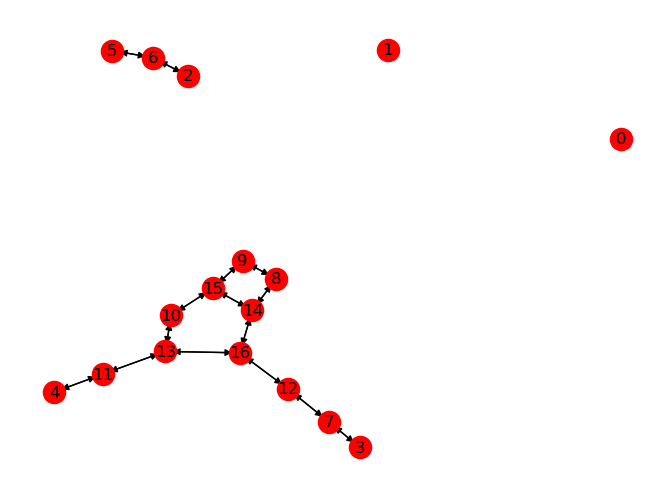

Alpha:  0.9
[2.66451429 3.35870486 6.80147855 4.17530229]
[2.7330253  3.29734835 6.80435169 4.16527466]
[2.80096287 3.23640825 6.80705639 4.15557249]
[2.8677739  3.17644464 6.80960423 4.14617723]
[2.93299342 3.11792948 6.81200574 4.13707137]
[2.99624204 3.0612492  6.81427038 4.12823839]
[3.05722121 3.00670947 6.8164066  4.11966272]
[3.11570619 2.95454017 6.8184224  4.11133124]
[3.17154216 2.90490848 6.82032313 4.10322623]
[3.22463083 2.85791642 6.8221155  4.09533725]
[3.2749267  2.81361678 6.82380456 4.08765195]
[3.322428   2.77201847 6.82539481 4.08015871]
[3.36716919 2.73309397 6.8268902  4.07284664]
[3.40921392 2.69678636 6.82829424 4.06570548]
[3.44864865 2.66301561 6.8296101  4.05872564]
[3.48557698 2.6316843  6.83084067 4.05189806]
[3.5201147  2.60268245 6.83198858 4.04521427]
[3.55238557 2.5758918  6.83305632 4.03866631]
[3.58251781 2.55118926 6.83404623 4.03224669]
Original histogramm 1:  [0, 2, 9, 6]
Wassernstein histogramm:  [4, 2, 7, 4]
Original histogramm 2:  [4, 2, 7, 4]
L

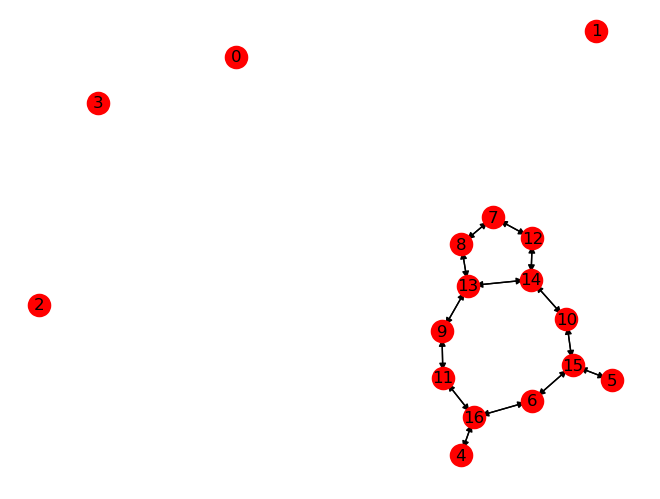

Alpha:  1.0
[3.2749267  2.81361678 6.82380456 4.08765195]
[3.322428   2.77201847 6.82539481 4.08015871]
[3.36716919 2.73309397 6.8268902  4.07284664]
[3.40921392 2.69678636 6.82829424 4.06570548]
[3.44864865 2.66301561 6.8296101  4.05872564]
[3.48557698 2.6316843  6.83084067 4.05189806]
[3.5201147  2.60268245 6.83198858 4.04521427]
[3.55238557 2.5758918  6.83305632 4.03866631]
[3.58251781 2.55118926 6.83404623 4.03224669]
Original histogramm 1:  [0, 2, 9, 6]
Wassernstein histogramm:  [4, 2, 7, 4]
Original histogramm 2:  [4, 2, 7, 4]
Layer =  2
Dist dataset 0 - dataset 1:  10.0
Dist dataset 0 - intermediate:  10.0
Dist intermediate - dataset 1:  0.0
Dist intermediate, sums:  10.0
Layer =  3
Dist dataset 0 - dataset 1:  36.0
Dist dataset 0 - intermediate:  36.0
Dist intermediate - dataset 1:  8.0
Dist intermediate, sums:  44.0
Layer =  4
Dist dataset 0 - dataset 1:  102.0
Dist dataset 0 - intermediate:  110.0
Dist intermediate - dataset 1:  34.0
Dist intermediate, sums:  144.0


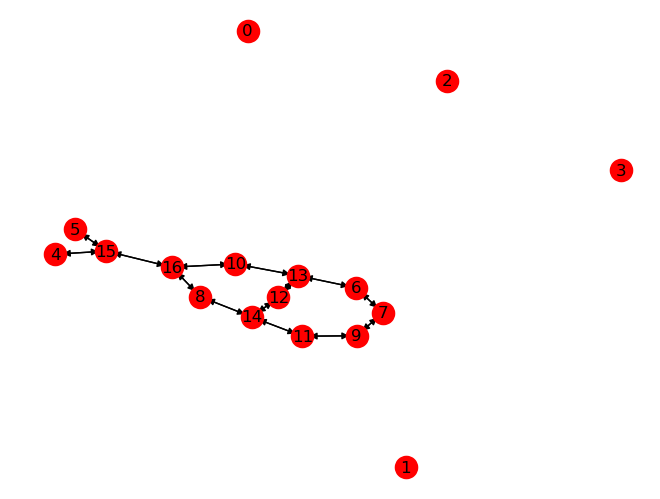

In [18]:
# calculate histograms
a1, a2, max_max = gr.calc_distrib(d1, d2)
# aff empty nodes if needed
diff = sum(a2) - sum(a1) 
if diff > 0:
    a1[0] = diff
elif diff < 0: 
    a2[0] = abs(diff)

    
# set parameters
n = max_max
A = np.vstack((a1, a2)).T
n_distributions = A.shape[1]
# loss matrix + normalization
M = ot.utils.dist0(n)
M /= M.max()

# reg = 1e-3
reg = 0.03

# set alpha list
n_alpha = 11
alpha_list = np.linspace(0, 1, n_alpha)

for i in range(n_alpha):
    # i = 5
    alpha = alpha_list[i]
    print("=" * 100)
    print("Alpha: ", alpha)
    correct_seq = False
    while correct_seq == False:
        weights = np.array([1 - alpha, alpha])
        wass_hist_double = ot.bregman.barycenter(A, M, reg, weights)
        print(wass_hist_double)
        wass_hist = [int(round(wass_hist_double[i], 0)) for i in range(len(wass_hist_double))]
        # print(wass_hist_double, wass_hist)

        # wass_hist_double = [round(B_wass[i][j], 4) for i in range(max_max)]
        while (sum(wass_hist) != sum(a1)):
            if(sum(wass_hist) > sum(a1) ): 
                diff = [wass_hist_double[i] - wass_hist[i] for i in range(len(wass_hist))]
                index = diff.index(min(diff))
                wass_hist[index] = math.floor(wass_hist_double[index])
            if(sum(wass_hist) < sum(a1) ): 
                diff = [wass_hist_double[i] - wass_hist[i] for i in range(len(wass_hist))]
                index = diff.index(max(diff))
                wass_hist[index] = math.ceil(wass_hist_double[index])

        degree_sum = sum([wass_hist[i] * i for i in range(len(wass_hist))])
        if degree_sum % 2 == 1:
            correct_seq = False
            alpha = alpha+0.01
            # print(wass_hist, degree_sum)
            # print("Bad sequence")
        else: 
            correct_seq = True
            # print(wass_hist, degree_sum )
            # print("Good sequence")
    print("Original histogramm 1: ", a1)
    print("Wassernstein histogramm: ", wass_hist)
    print("Original histogramm 2: ", a2)
#     cost_matrix = get_cost_matrix(n=max_max)
#     path, d_12 = ot.emd(a1, a2, cost_matrix, log=True) 
#     path, d_1wass = ot.emd(a1, wass_hist, cost_matrix, log=True) 
#     path, d_2wass = ot.emd(a2, wass_hist, cost_matrix, log=True) 

#     print("Cost between original sequences: ", round(d_12['cost'],3 ))
#     print("Cost between original sequence 1 and waaserstein: ", round(d_1wass['cost'],3 ))
#     print("Cost between original sequence 2 and waaserstein: ", round(d_2wass['cost'],3 ))


    res = []
    for i in range(len(wass_hist)):
        counts = wass_hist[i]
        # print(counts)
        for n in range(counts):
            res.append(i)
    # print(res)

    draw = res
    correct_grapg = False
    while(not correct_grapg):
        z = list(draw)
        G = nx.configuration_model(z)
        G = nx.Graph(G)
        G.remove_edges_from(nx.selfloop_edges(G))

        actual_degrees = [d for v, d in G.degree()]
        correct_grapg = actual_degrees == z
    # plot_graph(G)
    new_G = from_networkx(G)
    new_G.x = torch.ones(new_G.num_nodes, 1)

    levels = [2,3,4]
    for l in levels: 
        
        wass_orig = gr.TMD_original(d1, d2, 1, L=l)
        wass_0 = gr.TMD_original(d1, new_G, 1, L=l)
        wass_1 = gr.TMD_original(new_G, d2, 1, L=l)
        wass_01_sum = wass_0[3] + wass_1[3]
        print("Layer = ", l)
        print("Dist dataset 0 - dataset 1: ", wass_orig[3])
        print("Dist dataset 0 - intermediate: ", wass_0[3])
        print("Dist intermediate - dataset 1: ", wass_1[3])
        print("Dist intermediate, sums: ", wass_01_sum)
        
    gr.draw_graph(new_G)

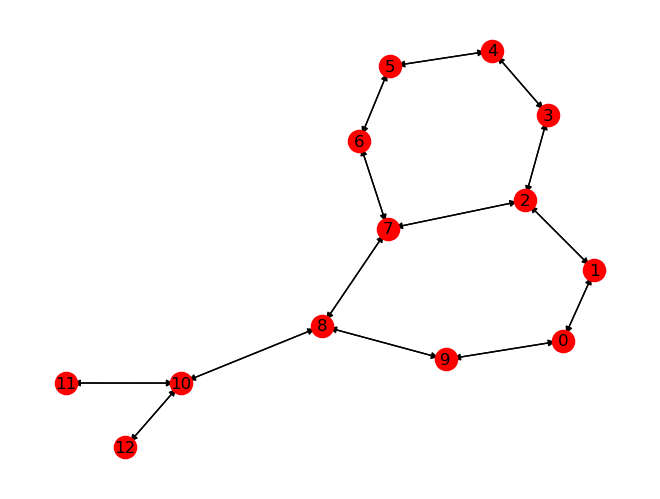

In [19]:
gr.draw_graph(dataset[1])

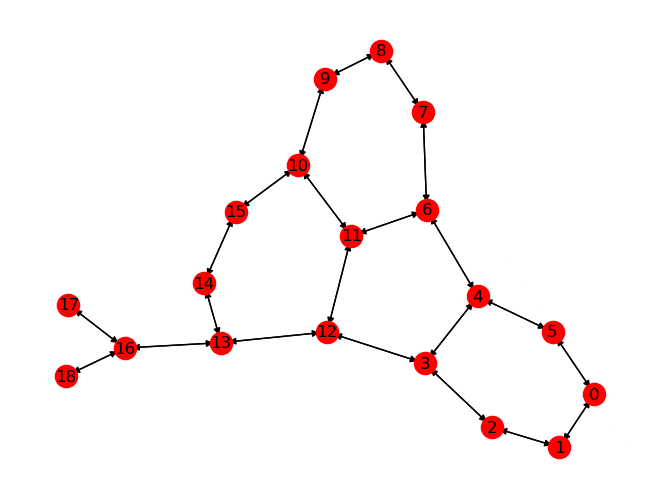

In [20]:
gr.draw_graph(dataset[3])

In [21]:
# set datasets
d1 = dataset[1]
d2 = dataset[3]

# # calculate histograms
# a1, a2, max_max = calc_distrib(d1, d2)
# # aff empty nodes if needed
# diff = sum(a2) - sum(a1) 
# if diff > 0:
#     a1[0] = diff
#     coragraph = to_networkx(d1)
#     while diff > 0:
#         coragraph.add_node(max(list(coragraph.nodes)))
#         diff = diff - 1
#     d1 = from_networkx(coragraph)
#     d1.x = torch.ones(len(list(coragraph.nodes)), 1)
# elif diff < 0: 
#     a2[0] = abs(diff)
#     coragraph = to_networkx(d2)
#     while diff < 0:
#         coragraph.add_node(max(list(coragraph.nodes))+1)
#         diff = diff + 1
#     d2 = from_networkx(coragraph)
#     d2.x = torch.ones(len(list(coragraph.nodes)), 1)

Alpha:  0.0
Original histogramm 1:  [6, 2, 7, 4]
Wassernstein histogramm:  [6, 2, 7, 4]
Original histogramm 2:  [0, 2, 9, 8]
Layer =  2
Dist dataset 0 - dataset 1:  22.0
Dist dataset 0 - intermediate:  6.0
Dist intermediate - dataset 1:  16.0
Dist intermediate, sums:  22.0
Layer =  3
Dist dataset 0 - dataset 1:  66.0
Dist dataset 0 - intermediate:  14.0
Dist intermediate - dataset 1:  60.0
Dist intermediate, sums:  74.0
Layer =  4
Dist dataset 0 - dataset 1:  188.0
Dist dataset 0 - intermediate:  38.0
Dist intermediate - dataset 1:  182.0
Dist intermediate, sums:  220.0


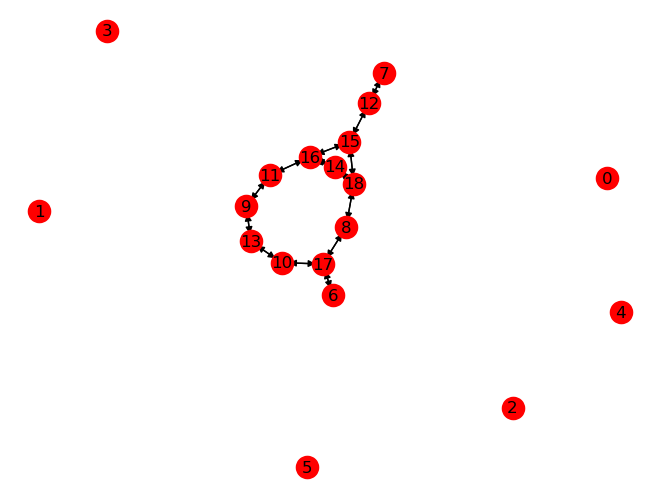

Alpha:  0.1
Original histogramm 1:  [6, 2, 7, 4]
Wassernstein histogramm:  [6, 2, 7, 4]
Original histogramm 2:  [0, 2, 9, 8]
Layer =  2
Dist dataset 0 - dataset 1:  22.0
Dist dataset 0 - intermediate:  6.0
Dist intermediate - dataset 1:  16.0
Dist intermediate, sums:  22.0
Layer =  3
Dist dataset 0 - dataset 1:  66.0
Dist dataset 0 - intermediate:  12.0
Dist intermediate - dataset 1:  60.0
Dist intermediate, sums:  72.0
Layer =  4
Dist dataset 0 - dataset 1:  188.0
Dist dataset 0 - intermediate:  40.0
Dist intermediate - dataset 1:  178.0
Dist intermediate, sums:  218.0


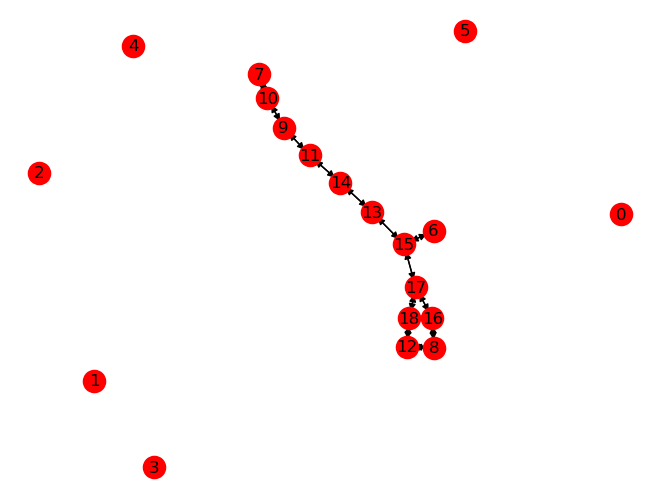

Alpha:  0.2
Original histogramm 1:  [6, 2, 7, 4]
Wassernstein histogramm:  [2, 6, 7, 4]
Original histogramm 2:  [0, 2, 9, 8]
Layer =  2
Dist dataset 0 - dataset 1:  22.0
Dist dataset 0 - intermediate:  10.0
Dist intermediate - dataset 1:  12.0
Dist intermediate, sums:  22.0
Layer =  3
Dist dataset 0 - dataset 1:  66.0
Dist dataset 0 - intermediate:  32.0
Dist intermediate - dataset 1:  52.0
Dist intermediate, sums:  84.0
Layer =  4
Dist dataset 0 - dataset 1:  188.0
Dist dataset 0 - intermediate:  94.0
Dist intermediate - dataset 1:  178.0
Dist intermediate, sums:  272.0


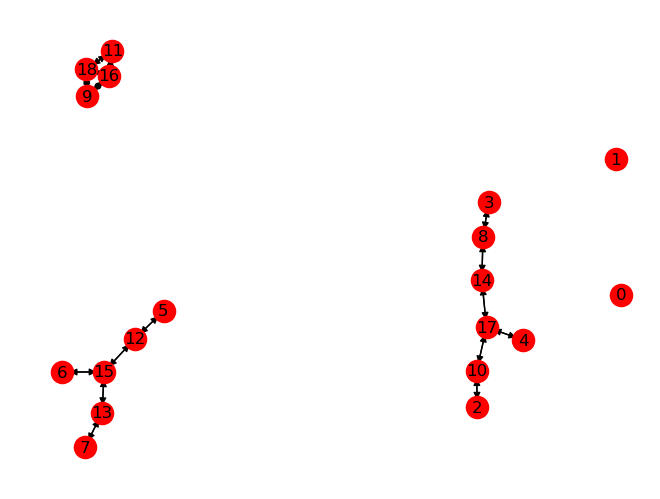

Alpha:  0.30000000000000004
Original histogramm 1:  [6, 2, 7, 4]
Wassernstein histogramm:  [2, 6, 7, 4]
Original histogramm 2:  [0, 2, 9, 8]
Layer =  2
Dist dataset 0 - dataset 1:  22.0
Dist dataset 0 - intermediate:  10.0
Dist intermediate - dataset 1:  12.0
Dist intermediate, sums:  22.0
Layer =  3
Dist dataset 0 - dataset 1:  66.0
Dist dataset 0 - intermediate:  24.0
Dist intermediate - dataset 1:  52.0
Dist intermediate, sums:  76.0
Layer =  4
Dist dataset 0 - dataset 1:  188.0
Dist dataset 0 - intermediate:  64.0
Dist intermediate - dataset 1:  170.0
Dist intermediate, sums:  234.0


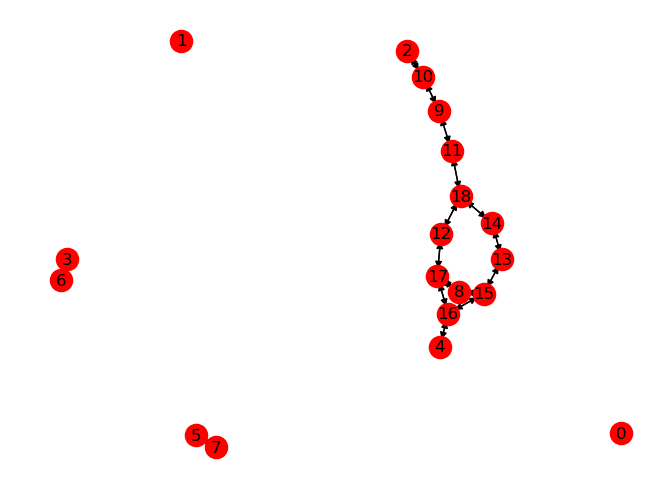

Alpha:  0.4
Original histogramm 1:  [6, 2, 7, 4]
Wassernstein histogramm:  [2, 6, 7, 4]
Original histogramm 2:  [0, 2, 9, 8]
Layer =  2
Dist dataset 0 - dataset 1:  22.0
Dist dataset 0 - intermediate:  10.0
Dist intermediate - dataset 1:  12.0
Dist intermediate, sums:  22.0
Layer =  3
Dist dataset 0 - dataset 1:  66.0
Dist dataset 0 - intermediate:  32.0
Dist intermediate - dataset 1:  52.0
Dist intermediate, sums:  84.0
Layer =  4
Dist dataset 0 - dataset 1:  188.0
Dist dataset 0 - intermediate:  82.0
Dist intermediate - dataset 1:  178.0
Dist intermediate, sums:  260.0


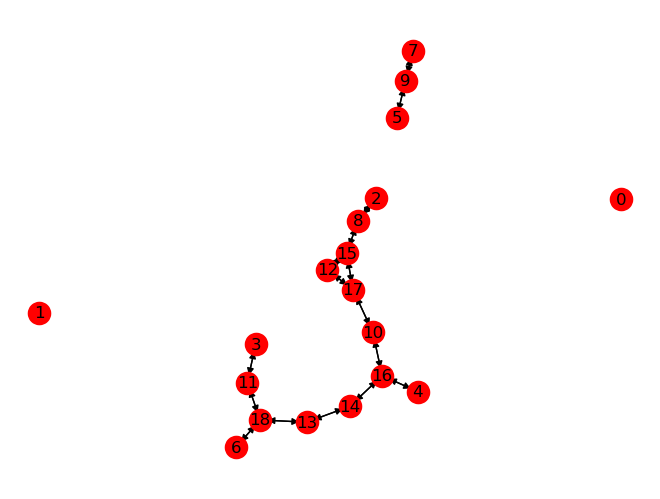

Alpha:  0.5
Original histogramm 1:  [6, 2, 7, 4]
Wassernstein histogramm:  [0, 6, 5, 8]
Original histogramm 2:  [0, 2, 9, 8]
Layer =  2
Dist dataset 0 - dataset 1:  22.0
Dist dataset 0 - intermediate:  18.0
Dist intermediate - dataset 1:  4.0
Dist intermediate, sums:  22.0
Layer =  3
Dist dataset 0 - dataset 1:  66.0
Dist dataset 0 - intermediate:  50.0
Dist intermediate - dataset 1:  20.0
Dist intermediate, sums:  70.0
Layer =  4
Dist dataset 0 - dataset 1:  188.0
Dist dataset 0 - intermediate:  134.0
Dist intermediate - dataset 1:  70.0
Dist intermediate, sums:  204.0


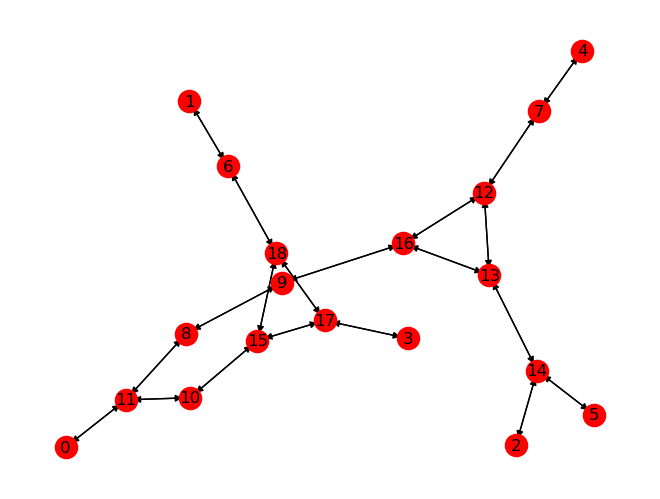

Alpha:  0.6000000000000001
Original histogramm 1:  [6, 2, 7, 4]
Wassernstein histogramm:  [0, 6, 5, 8]
Original histogramm 2:  [0, 2, 9, 8]
Layer =  2
Dist dataset 0 - dataset 1:  22.0
Dist dataset 0 - intermediate:  18.0
Dist intermediate - dataset 1:  4.0
Dist intermediate, sums:  22.0
Layer =  3
Dist dataset 0 - dataset 1:  66.0
Dist dataset 0 - intermediate:  50.0
Dist intermediate - dataset 1:  22.0
Dist intermediate, sums:  72.0
Layer =  4
Dist dataset 0 - dataset 1:  188.0
Dist dataset 0 - intermediate:  144.0
Dist intermediate - dataset 1:  82.0
Dist intermediate, sums:  226.0


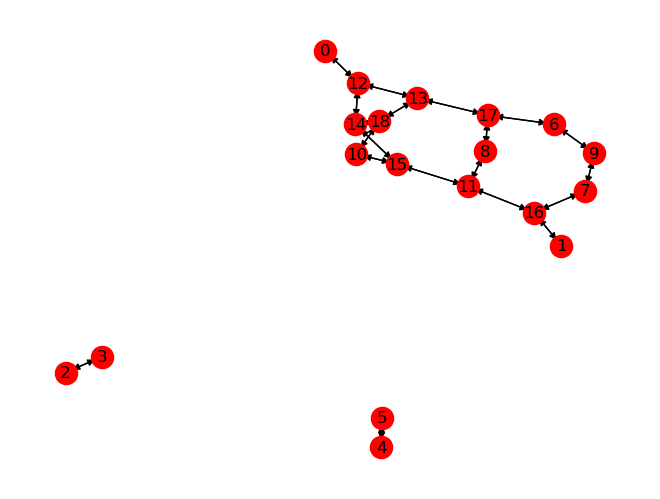

Alpha:  0.7000000000000001
Original histogramm 1:  [6, 2, 7, 4]
Wassernstein histogramm:  [0, 6, 5, 8]
Original histogramm 2:  [0, 2, 9, 8]
Layer =  2
Dist dataset 0 - dataset 1:  22.0
Dist dataset 0 - intermediate:  18.0
Dist intermediate - dataset 1:  4.0
Dist intermediate, sums:  22.0
Layer =  3
Dist dataset 0 - dataset 1:  66.0
Dist dataset 0 - intermediate:  50.0
Dist intermediate - dataset 1:  20.0
Dist intermediate, sums:  70.0
Layer =  4
Dist dataset 0 - dataset 1:  188.0
Dist dataset 0 - intermediate:  136.0
Dist intermediate - dataset 1:  70.0
Dist intermediate, sums:  206.0


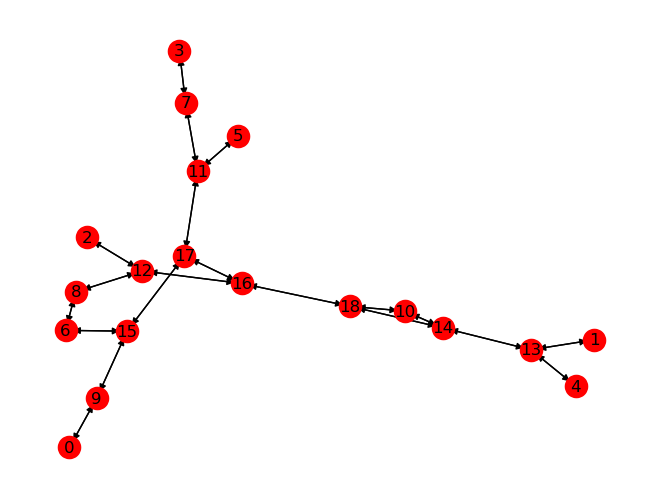

Alpha:  0.8
Original histogramm 1:  [6, 2, 7, 4]
Wassernstein histogramm:  [0, 2, 9, 8]
Original histogramm 2:  [0, 2, 9, 8]
Layer =  2
Dist dataset 0 - dataset 1:  22.0
Dist dataset 0 - intermediate:  22.0
Dist intermediate - dataset 1:  0.0
Dist intermediate, sums:  22.0
Layer =  3
Dist dataset 0 - dataset 1:  66.0
Dist dataset 0 - intermediate:  66.0
Dist intermediate - dataset 1:  18.0
Dist intermediate, sums:  84.0
Layer =  4
Dist dataset 0 - dataset 1:  188.0
Dist dataset 0 - intermediate:  188.0
Dist intermediate - dataset 1:  72.0
Dist intermediate, sums:  260.0


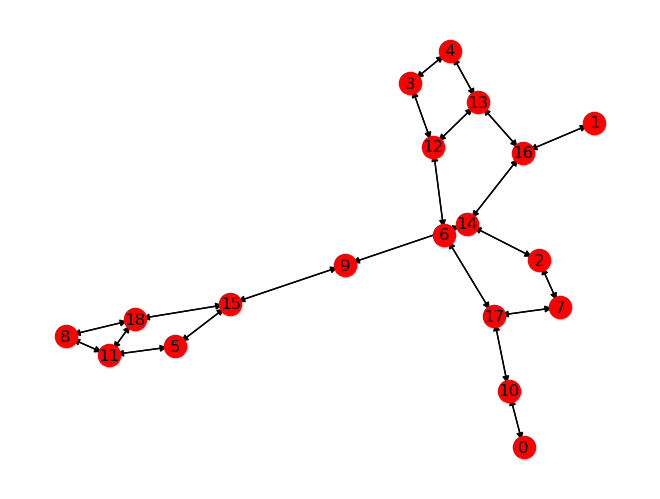

Alpha:  0.9
Original histogramm 1:  [6, 2, 7, 4]
Wassernstein histogramm:  [0, 2, 9, 8]
Original histogramm 2:  [0, 2, 9, 8]
Layer =  2
Dist dataset 0 - dataset 1:  22.0
Dist dataset 0 - intermediate:  22.0
Dist intermediate - dataset 1:  0.0
Dist intermediate, sums:  22.0
Layer =  3
Dist dataset 0 - dataset 1:  66.0
Dist dataset 0 - intermediate:  66.0
Dist intermediate - dataset 1:  14.0
Dist intermediate, sums:  80.0
Layer =  4
Dist dataset 0 - dataset 1:  188.0
Dist dataset 0 - intermediate:  182.0
Dist intermediate - dataset 1:  58.0
Dist intermediate, sums:  240.0


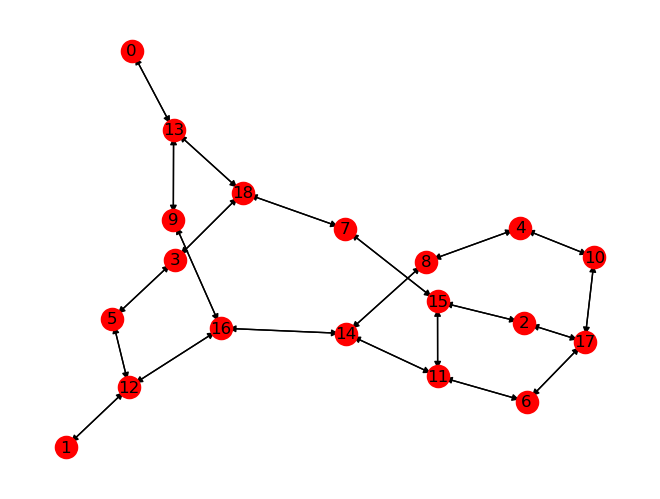

Alpha:  1.0
Original histogramm 1:  [6, 2, 7, 4]
Wassernstein histogramm:  [0, 2, 9, 8]
Original histogramm 2:  [0, 2, 9, 8]
Layer =  2
Dist dataset 0 - dataset 1:  22.0
Dist dataset 0 - intermediate:  22.0
Dist intermediate - dataset 1:  0.0
Dist intermediate, sums:  22.0
Layer =  3
Dist dataset 0 - dataset 1:  66.0
Dist dataset 0 - intermediate:  66.0
Dist intermediate - dataset 1:  12.0
Dist intermediate, sums:  78.0
Layer =  4
Dist dataset 0 - dataset 1:  188.0
Dist dataset 0 - intermediate:  190.0
Dist intermediate - dataset 1:  62.0
Dist intermediate, sums:  252.0


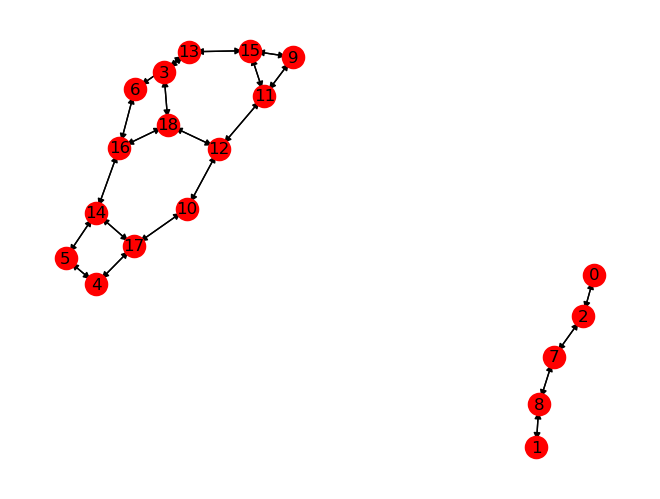

In [22]:
# calculate histograms
a1, a2, max_max = gr.calc_distrib(d1, d2)
# aff empty nodes if needed
diff = sum(a2) - sum(a1) 
if diff > 0:
    a1[0] = diff
elif diff < 0: 
    a2[0] = abs(diff)

    
# set parameters
n = max_max
A = np.vstack((a1, a2)).T
n_distributions = A.shape[1]
# loss matrix + normalization
M = ot.utils.dist0(n)
M /= M.max()

reg = 1e-3


# set alpha list
n_alpha = 11
alpha_list = np.linspace(0, 1, n_alpha)

for i in range(n_alpha):
    # i = 5
    alpha = alpha_list[i]
    print("=" * 100)
    print("Alpha: ", alpha)
    correct_seq = False
    while correct_seq == False:
        weights = np.array([1 - alpha, alpha])
        wass_hist_double = ot.bregman.barycenter(A, M, reg, weights)
        wass_hist = [int(round(wass_hist_double[i], 0)) for i in range(len(wass_hist_double))]
        # print(wass_hist_double, wass_hist)

        # wass_hist_double = [round(B_wass[i][j], 4) for i in range(max_max)]
        while (sum(wass_hist) != sum(a1)):
            if(sum(wass_hist) > sum(a1) ): 
                diff = [wass_hist_double[i] - wass_hist[i] for i in range(len(wass_hist))]
                index = diff.index(min(diff))
                wass_hist[index] = math.floor(wass_hist_double[index])
            if(sum(wass_hist) < sum(a1) ): 
                diff = [wass_hist_double[i] - wass_hist[i] for i in range(len(wass_hist))]
                index = diff.index(max(diff))
                wass_hist[index] = math.ceil(wass_hist_double[index])

        degree_sum = sum([wass_hist[i] * i for i in range(len(wass_hist))])
        if degree_sum % 2 == 1:
            correct_seq = False
            alpha = alpha+0.01
            # print(wass_hist, degree_sum)
            # print("Bad sequence")
        else: 
            correct_seq = True
            # print(wass_hist, degree_sum )
            # print("Good sequence")
    print("Original histogramm 1: ", a1)
    print("Wassernstein histogramm: ", wass_hist)
    print("Original histogramm 2: ", a2)
#     cost_matrix = get_cost_matrix(n=max_max)
#     path, d_12 = ot.emd(a1, a2, cost_matrix, log=True) 
#     path, d_1wass = ot.emd(a1, wass_hist, cost_matrix, log=True) 
#     path, d_2wass = ot.emd(a2, wass_hist, cost_matrix, log=True) 

#     print("Cost between original sequences: ", round(d_12['cost'],3 ))
#     print("Cost between original sequence 1 and waaserstein: ", round(d_1wass['cost'],3 ))
#     print("Cost between original sequence 2 and waaserstein: ", round(d_2wass['cost'],3 ))


    res = []
    for i in range(len(wass_hist)):
        counts = wass_hist[i]
        # print(counts)
        for n in range(counts):
            res.append(i)
    # print(res)

    draw = res
    correct_grapg = False
    while(not correct_grapg):
        z = list(draw)
        G = nx.configuration_model(z)
        G = nx.Graph(G)
        G.remove_edges_from(nx.selfloop_edges(G))

        actual_degrees = [d for v, d in G.degree()]
        correct_grapg = actual_degrees == z
    # plot_graph(G)
    new_G = from_networkx(G)
    new_G.x = torch.ones(new_G.num_nodes, 1)

    levels = [2,3,4]
    for l in levels: 
        

        wass_orig = gr.TMD_original(d1, d2, 1, L=l)
        wass_0 = gr.TMD_original(d1, new_G, 1, L=l)
        wass_1 = gr.TMD_original(new_G, d2, 1, L=l)
        wass_01_sum = wass_0[3] + wass_1[3]
        print("Layer = ", l)
        print("Dist dataset 0 - dataset 1: ", wass_orig[3])
        print("Dist dataset 0 - intermediate: ", wass_0[3])
        print("Dist intermediate - dataset 1: ", wass_1[3])
        print("Dist intermediate, sums: ", wass_01_sum)
        
    gr.draw_graph(new_G)

## Level 3

In [23]:
def run_check(g, d1, d2):
    
    data = from_networkx(g)
    data.x = torch.ones(len(list(g.nodes)), 1)
    gr.draw_graph(data)
    
    print("Distance between original graphs: ", gr.TMD_original(d1, d2, L=2, w=1)[3])
    print("Distance to the first graph: ", gr.TMD_original(d1, data, L=2, w=1)[3])
    print("Distance to the second graph: ", gr.TMD_original(d2, data, L=2, w=1)[3])
    
    print('*' * 10)
    print("Distance between original graphs, level = 3: ", gr.TMD_original(d1, d2, L=3, w=1)[3])
    print("Distance to the first graph, level = 3: ", gr.TMD_original(d1, data, L=3, w=1)[3])
    print("Distance to the second graph, level = 3: ", gr.TMD_original(d2, data, L=3, w=1)[3])
    
    
    print('*' * 10)
    print("Distance between original graphs, level = 4: ", gr.TMD_original(d1, d2, L=4, w=1)[3])
    print("Distance to the first graph, level = 4: ", gr.TMD_original(d1, data, L=4, w=1)[3])
    print("Distance to the second graph, level = 4: ", gr.TMD_original(d2, data, L=4, w=1)[3])

In [24]:
def get_nl(input_graph):
    d = gr.get_neighbors(input_graph)
    names = []
    for k, v in d.items():
        neighb = [len(d[vv]) for vv in v]
        neighb.sort()
        name = [len(v)] + neighb
        names.append(name)
    diff = len(d1.x) - len(names)
    for i in range(diff):
        names.append([0])
    names.append([0, 0])
    return names

In [25]:
def get_label_dict(label_list):
    # new labels
    dict_ = {}
    for i in range(len(label_list)):
        if tuple(label_list[i]) in dict_:
            dict_[tuple(label_list[i])].append(i)
        else:
            dict_[tuple(label_list[i])] = [i]
    return dict_

def group_matrix_mean(mm, x_label, y_label, agg=np.mean):
    # new labels
    x_label_dict = get_label_dict(x_label)
    y_label_dict = get_label_dict(y_label)
    new_x_labels = x_label_dict.keys()    
    new_y_labels = y_label_dict.keys()
    # group rows
    grouped_rows = np.empty((len(new_y_labels),mm.shape[1]))
    i = 0
    for k, v in y_label_dict.items():
        # print(mm[:, v])
        row = agg(mm[v], axis=0)
        grouped_rows[i] = row
        i +=1
    # group columns    
    grouped_cols = np.empty((grouped_rows.shape[0], len(new_x_labels)))
    i = 0
    for k, v in x_label_dict.items():
        col = agg(grouped_rows[:, v], axis=1)
        # print(np.column_stack(col))
        grouped_cols[:, i] = np.column_stack(col)
        i +=1
    
    return grouped_cols, new_x_labels, new_y_labels,  x_label_dict, y_label_dict

def add_(g1, d1, d2, node_1, node_2):
    # action_1, action_2 = 2, 3
    # print("Nodes: ", node_1, node_2)
    # if g1.get_edge_data(node_1, node_2, default=True): # edge doesnot exist 
    #     g1.add_edge(node_1, node_2)
        # update path
        # path[action_1][action_1+1] -= 1
        # path[action_2][action_2+1] -= 1
    # path_sum = path[0][1] + path[1][2] + path[2][3]
    # print("Path sum: ", path_sum)
    run_check(g1, d1, d2)
    data = from_networkx(g1)
    data.x = torch.ones(len(list(g1.nodes)), 1)
    dist_1, dist_2, M3, wass = gr.TMD_original(data, d2, 1, L=3)
    path_node3, d = ot.emd(dist_1, dist_2, M3, log=True)
    y_labels = get_nl(data)
    x_labels = get_nl(d2)
    grouped_M3, new_x_labels, new_y_labels,  x_label_dict, y_label_dict = group_matrix_mean(M3, x_labels, y_labels)
    grouped_path3, new_x_labels, new_y_labels,  x_label_dict, y_label_dict = group_matrix_mean(path_node3, x_labels, y_labels, agg=np.sum)
    print("grouped_M3 * grouped_path3")
    sns.heatmap(grouped_M3 * grouped_path3, annot=True, xticklabels=new_x_labels, yticklabels=new_y_labels)
    plt.show()
    print(y_label_dict)
    print("grouped_path3")
    sns.heatmap(grouped_path3, annot=True, xticklabels=new_x_labels, yticklabels=new_y_labels)
    plt.show()
    print("grouped_M3")
    sns.heatmap(grouped_M3, annot=True) #, xticklabels=new_x_labels, yticklabels=new_y_labels)
      
    return M3, grouped_M3, grouped_path3

In [26]:

def add_no_group(g1, d1, d2, node_1, node_2):
    # action_1, action_2 = 2, 3
    # print("Nodes: ", node_1, node_2)
    # if g1.get_edge_data(node_1, node_2, default=True): # edge doesnot exist 
    #     g1.add_edge(node_1, node_2)
        # update path
        # path[action_1][action_1+1] -= 1
        # path[action_2][action_2+1] -= 1
    # path_sum = path[0][1] + path[1][2] + path[2][3]
    # print("Path sum: ", path_sum)
    run_check(g1, d1, d2)
    data = from_networkx(g1)
    data.x = torch.ones(len(list(g1.nodes)), 1)
    dist_1, dist_2, M3, wass = gr.TMD_original(data, d2, 1, L=3)
    path_node3, d = ot.emd(dist_1, dist_2, M3, log=True)
    y_labels = get_nl(data)
    x_labels = get_nl(d2)
    grouped_M3, new_x_labels, new_y_labels,  x_label_dict, y_label_dict = group_matrix_mean(M3, x_labels, y_labels)
    grouped_path3, new_x_labels, new_y_labels,  x_label_dict, y_label_dict = group_matrix_mean(path_node3, x_labels, y_labels, agg=np.sum)
    
#     sns.heatmap(path_node3, annot=True, xticklabels=x_labels, yticklabels=y_labels)
    plt.show()
#     sns.heatmap(M3, annot=True, xticklabels=x_labels, yticklabels=y_labels)
        
        
    plt.show()
    sns.heatmap(grouped_path3 * grouped_M3 , annot=True, xticklabels=new_x_labels, yticklabels=new_y_labels)
    print(y_label_dict)
    plt.show()
    sns.heatmap(grouped_path3, annot=True, xticklabels=new_x_labels, yticklabels=new_y_labels)
        
        
    plt.show()
#     sns.heatmap(grouped_M3, annot=True, xticklabels=new_x_labels, yticklabels=new_y_labels)
    plt.show()
#     sns.heatmap(M3 * path_node3, annot=True, xticklabels=new_x_labels, yticklabels=new_y_labels)
       
    return M3, M3, path_node3

In [27]:
# set datasets
d2 = dataset[0]
d1 = dataset[1]

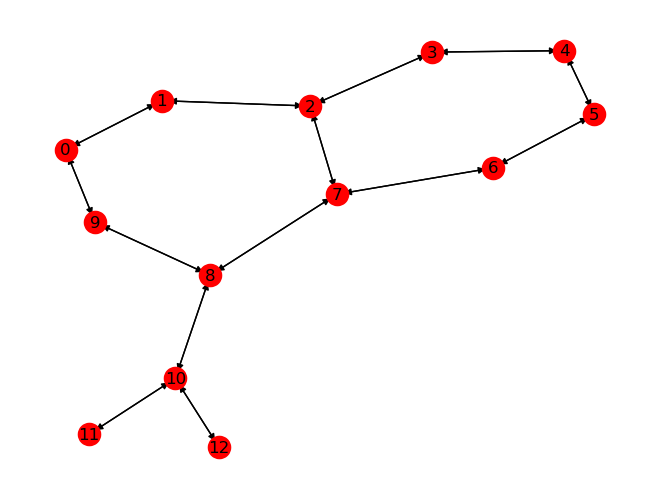

In [28]:
gr.draw_graph(d1)

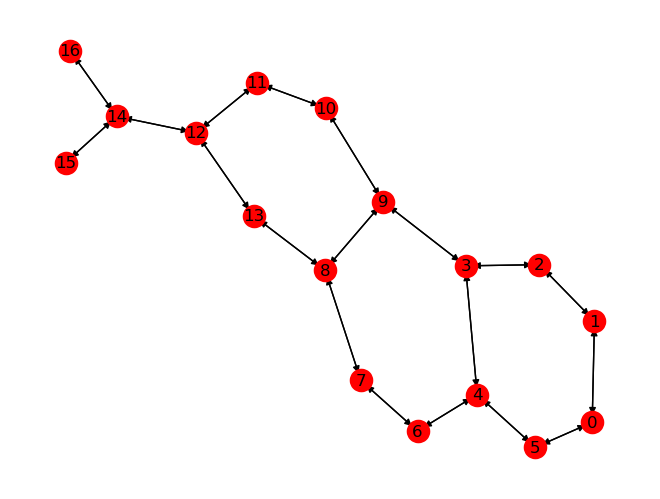

In [29]:
gr.draw_graph(d2)

In [30]:
# calculate histograms
a1, a2, max_max = gr.calc_distrib(d1, d2)
# aff empty nodes if needed
diff = sum(a2) - sum(a1) 
if diff > 0:
    a1[0] = diff
    coragraph = to_networkx(d1)
    while diff > 0:
        coragraph.add_node(max(list(coragraph.nodes))+1)
        diff = diff - 1
    d1_filled = from_networkx(coragraph)
    d1_filled.x = torch.ones(len(list(coragraph.nodes)), 1)
    print('Change 1')
elif diff < 0: 
    a2[0] = abs(diff)
    coragraph = to_networkx(d2)
    while diff < 0:
        coragraph.add_node(max(list(coragraph.nodes))+1)
        diff = diff + 1
    d2_filled = from_networkx(coragraph)
    d2_filled.x = torch.ones(len(list(coragraph.nodes)), 1)
    print('Change 2')
cost_matrix = gr_path.get_cost_matrix(max_max)

# dist_1, dist_2, M, wass = TMD(d1, d2, 1, L=l)
path, d = ot.emd(a1, a2, cost_matrix, log=True) 

Change 1


C:\Users\ekima\AppData\Local\Temp\ipykernel_2292\3525126103.py:26: UserWarning: Input histogram consists of integer. The transport plan will be casted accordingly, possibly resulting in a loss of precision. If this behaviour is unwanted, please make sure your input histogram consists of floating point elements.
  path, d = ot.emd(a1, a2, cost_matrix, log=True)


In [31]:
# add empty nodes
d1 = d1_filled

In [32]:
path = gr_path.update_path(path)
path

3
0 1
3
1 2
3
2 3


array([[0, 4, 0, 0],
       [0, 0, 4, 0],
       [0, 0, 7, 2],
       [0, 0, 0, 4]])

In [33]:
dist_1, dist_2, M2, wass = gr.TMD_original(d1, d2, 1, L=2)
path_node2, d = ot.emd(dist_1, dist_2, M2, log=True)

dist_1, dist_2, M3, wass = gr.TMD_original(d1, d2, 1, L=3)
path_node3, d = ot.emd(dist_1, dist_2, M3, log=True)

In [34]:
# get list of neighbors
y_labels = get_nl(d1)
x_labels = get_nl(d2)

In [35]:
g1 = to_networkx(d1_filled)
g1 = g1.to_undirected()
# get nodes
nodes = gr_path.get_nodes(g1)
print("all nodes: ", nodes)

all nodes:  [[13, 14, 15, 16], [11, 12], [0, 1, 3, 4, 5, 6, 9], [2, 7, 8, 10]]


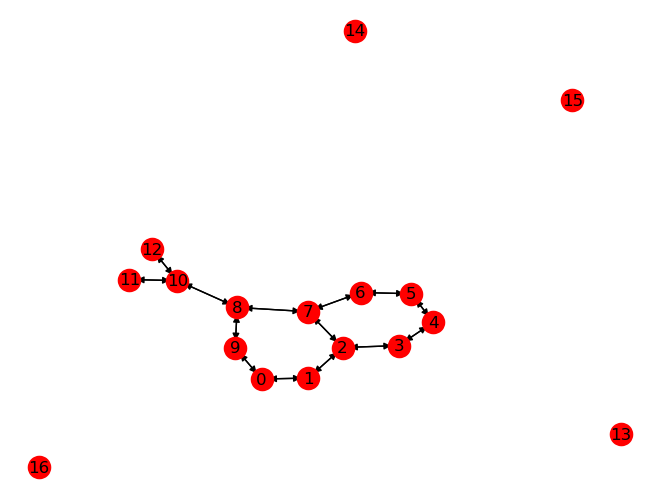

Distance between original graphs:  10.0
Distance to the first graph:  0.0
Distance to the second graph:  10.0
**********
Distance between original graphs, level = 3:  36.0
Distance to the first graph, level = 3:  0.0
Distance to the second graph, level = 3:  36.0
**********
Distance between original graphs, level = 4:  102.0
Distance to the first graph, level = 4:  0.0
Distance to the second graph, level = 4:  102.0
grouped_M3 * grouped_path3


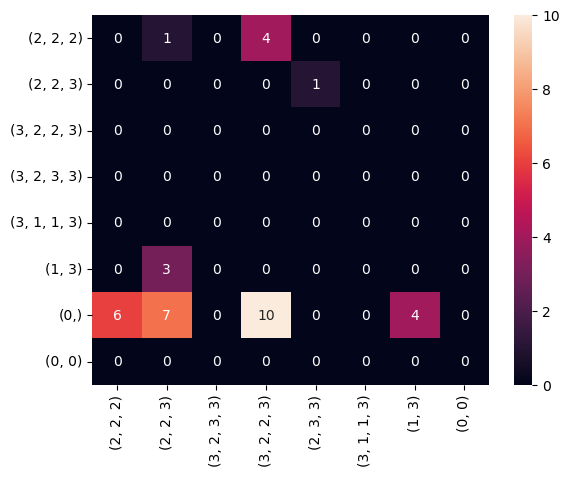

{(2, 2, 2): [0, 4, 5], (2, 2, 3): [1, 3, 6, 9], (3, 2, 2, 3): [2], (3, 2, 3, 3): [7, 8], (3, 1, 1, 3): [10], (1, 3): [11, 12], (0,): [13, 14, 15, 16], (0, 0): [17]}
grouped_path3


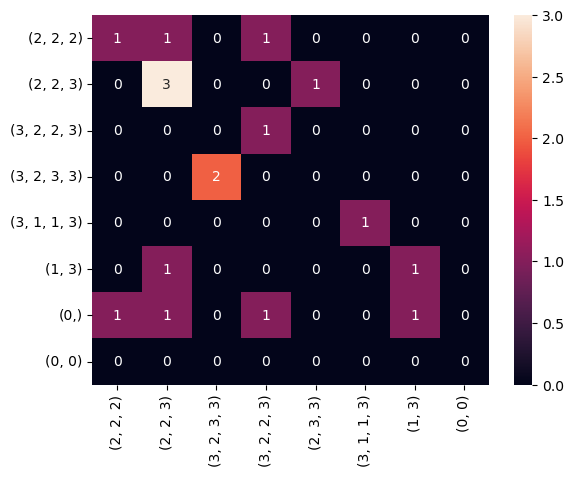

grouped_M3


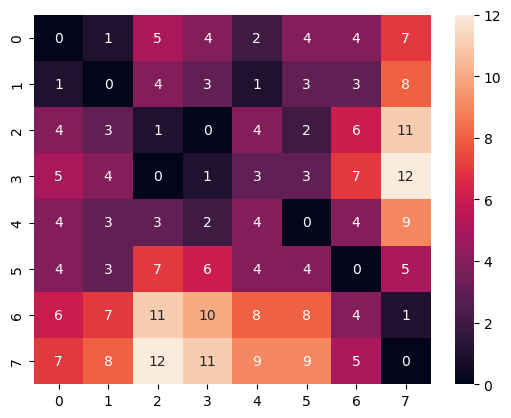

In [36]:
M3, grouped_M3, grouped_path3 = add_(g1, d1, d2, 15,12)

In [37]:
print("size of graph 1: ", M3[-1:].sum())
print("size of graph 2: ", M3[:,-1].sum())

size of graph 1:  147.0
size of graph 2:  111.0


In [38]:
g1.add_edge(13, 4)

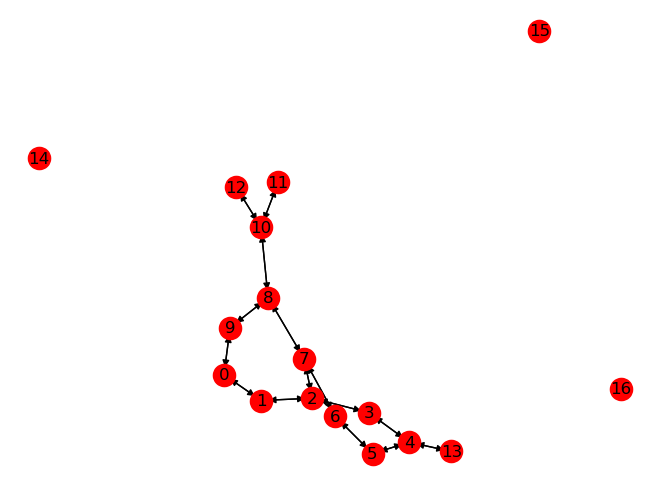

Distance between original graphs:  10.0
Distance to the first graph:  2.0
Distance to the second graph:  8.0
**********
Distance between original graphs, level = 3:  36.0
Distance to the first graph, level = 3:  8.0
Distance to the second graph, level = 3:  28.0
**********
Distance between original graphs, level = 4:  102.0
Distance to the first graph, level = 4:  22.0
Distance to the second graph, level = 4:  80.0
grouped_M3 * grouped_path3


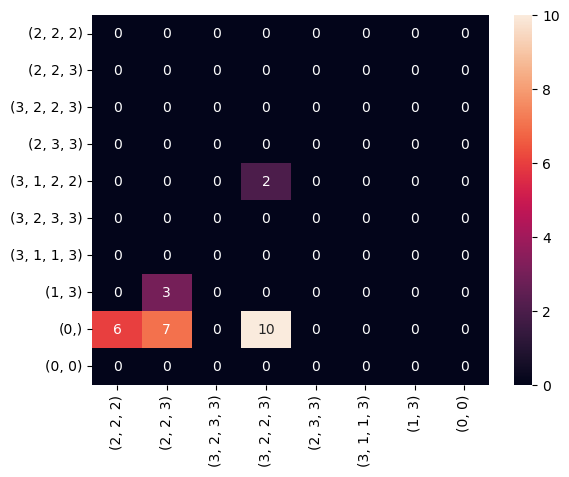

{(2, 2, 2): [0], (2, 2, 3): [1, 5, 6, 9], (3, 2, 2, 3): [2], (2, 3, 3): [3], (3, 1, 2, 2): [4], (3, 2, 3, 3): [7, 8], (3, 1, 1, 3): [10], (1, 3): [11, 12, 13], (0,): [14, 15, 16], (0, 0): [17]}
grouped_path3


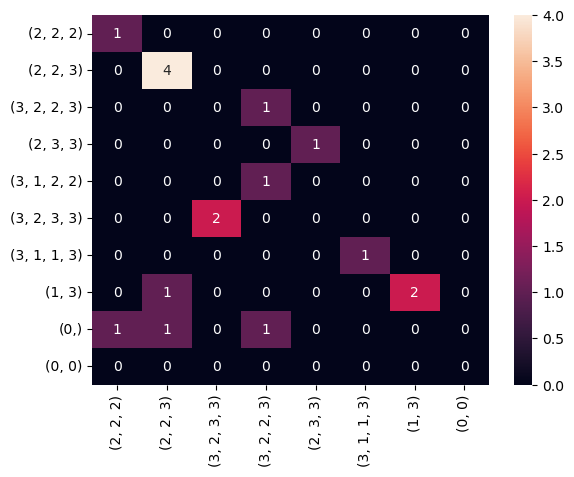

grouped_M3


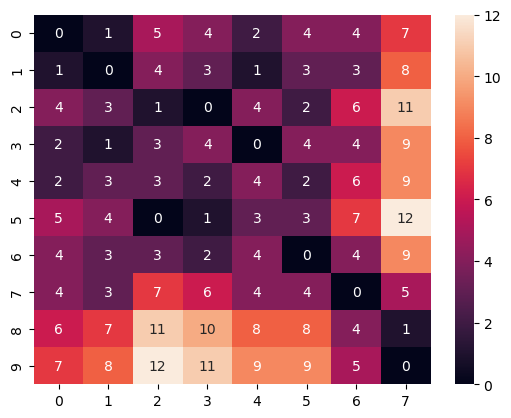

In [39]:
M3, grouped_M3, grouped_path3 = add_(g1, d1, d2, 15,12)

In [40]:
print("size of graph 1: ", M3[-1:].sum())
print("size of graph 2: ", M3[:,-1].sum())

size of graph 1:  147.0
size of graph 2:  119.0


In [41]:
g1.add_edge(13, 14)
# g1.add_edge(0, 14)
# g1.add_edge(1, 14)


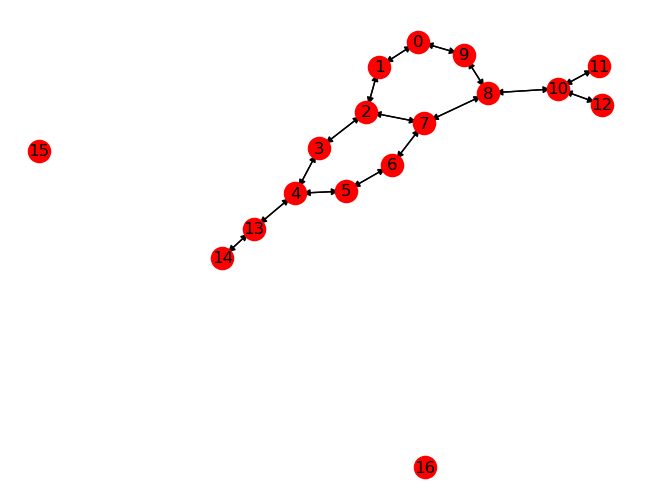

Distance between original graphs:  10.0
Distance to the first graph:  4.0
Distance to the second graph:  6.0
**********
Distance between original graphs, level = 3:  36.0
Distance to the first graph, level = 3:  14.0
Distance to the second graph, level = 3:  22.0
**********
Distance between original graphs, level = 4:  102.0
Distance to the first graph, level = 4:  38.0
Distance to the second graph, level = 4:  64.0
grouped_M3 * grouped_path3


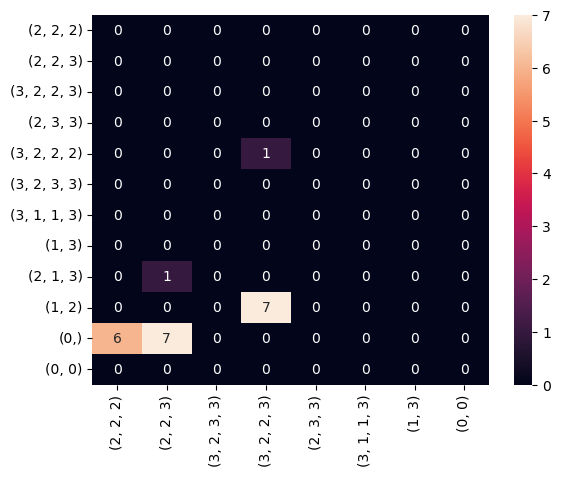

{(2, 2, 2): [0], (2, 2, 3): [1, 5, 6, 9], (3, 2, 2, 3): [2], (2, 3, 3): [3], (3, 2, 2, 2): [4], (3, 2, 3, 3): [7, 8], (3, 1, 1, 3): [10], (1, 3): [11, 12], (2, 1, 3): [13], (1, 2): [14], (0,): [15, 16], (0, 0): [17]}
grouped_path3


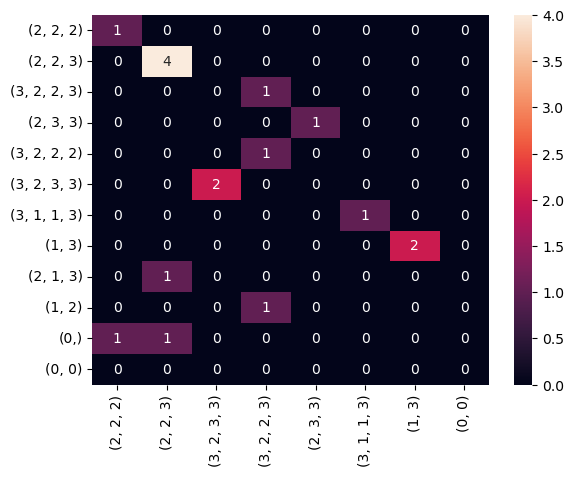

grouped_M3


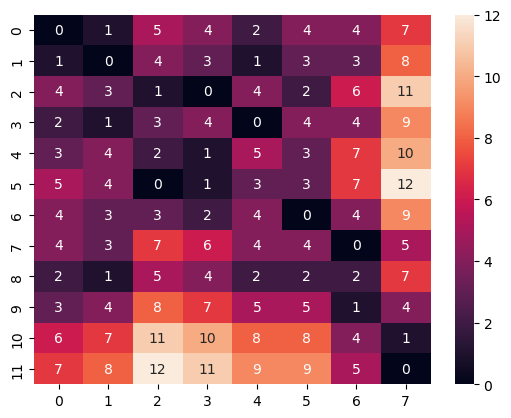

In [42]:
M3, grouped_M3, grouped_path3 = add_(g1, d1, d2, 15,12)

In [43]:
print("size of graph 1: ", M3[-1:].sum())
print("size of graph 2: ", M3[:,-1].sum())

size of graph 1:  147.0
size of graph 2:  125.0


In [44]:
g1.add_edge(14, 15)

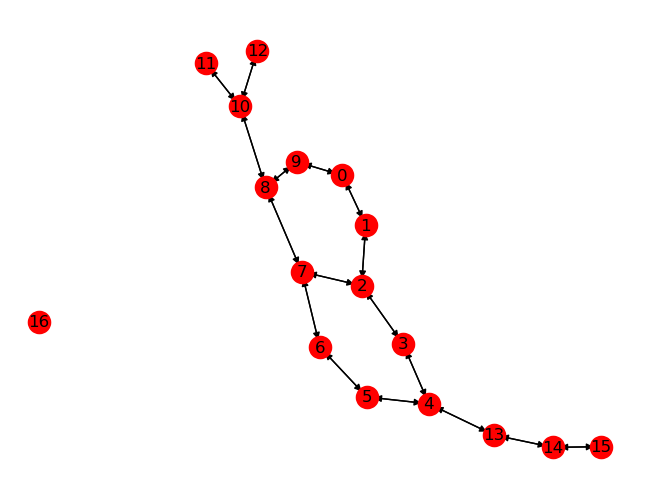

Distance between original graphs:  10.0
Distance to the first graph:  6.0
Distance to the second graph:  4.0
**********
Distance between original graphs, level = 3:  36.0
Distance to the first graph, level = 3:  20.0
Distance to the second graph, level = 3:  16.0
**********
Distance between original graphs, level = 4:  102.0
Distance to the first graph, level = 4:  52.0
Distance to the second graph, level = 4:  52.0
grouped_M3 * grouped_path3


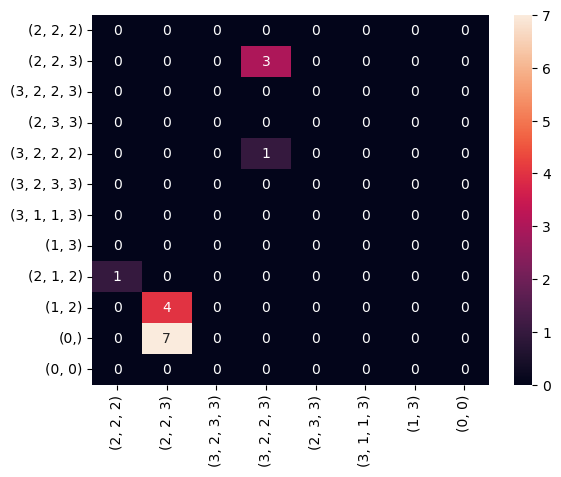

{(2, 2, 2): [0], (2, 2, 3): [1, 5, 6, 9, 13], (3, 2, 2, 3): [2], (2, 3, 3): [3], (3, 2, 2, 2): [4], (3, 2, 3, 3): [7, 8], (3, 1, 1, 3): [10], (1, 3): [11, 12], (2, 1, 2): [14], (1, 2): [15], (0,): [16], (0, 0): [17]}
grouped_path3


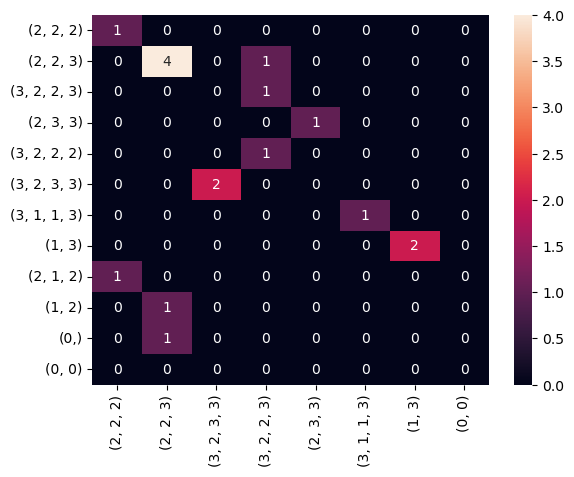

grouped_M3


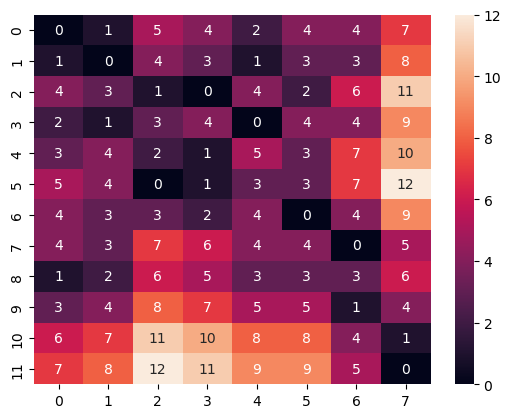

In [45]:
M3, grouped_M3, grouped_path3 = add_(g1, d1, d2, 15,12)

In [46]:
print("size of graph 1: ", M3[-1:].sum())
print("size of graph 2: ", M3[:,-1].sum())

size of graph 1:  147.0
size of graph 2:  131.0


In [47]:
g1.add_edge(15, 13)

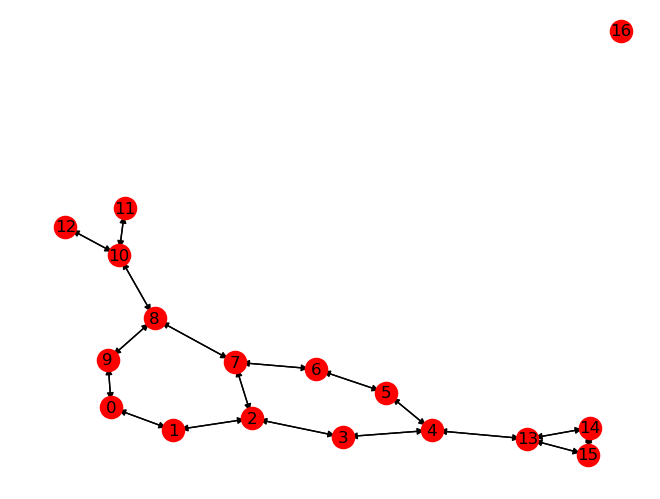

Distance between original graphs:  10.0
Distance to the first graph:  8.0
Distance to the second graph:  2.0
**********
Distance between original graphs, level = 3:  36.0
Distance to the first graph, level = 3:  30.0
Distance to the second graph, level = 3:  6.0
**********
Distance between original graphs, level = 4:  102.0
Distance to the first graph, level = 4:  88.0
Distance to the second graph, level = 4:  22.0
grouped_M3 * grouped_path3


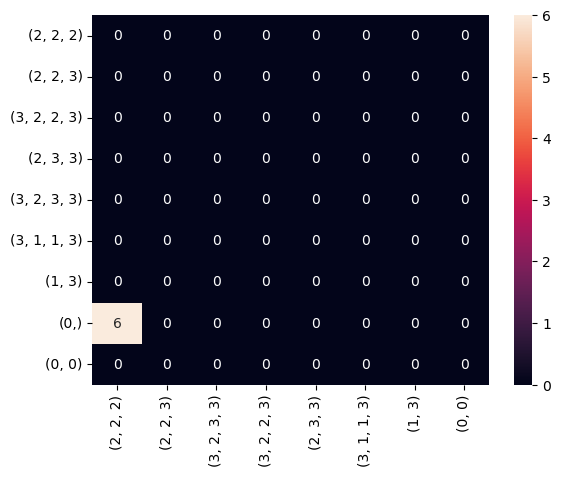

{(2, 2, 2): [0], (2, 2, 3): [1, 5, 6, 9, 14, 15], (3, 2, 2, 3): [2, 4, 13], (2, 3, 3): [3], (3, 2, 3, 3): [7, 8], (3, 1, 1, 3): [10], (1, 3): [11, 12], (0,): [16], (0, 0): [17]}
grouped_path3


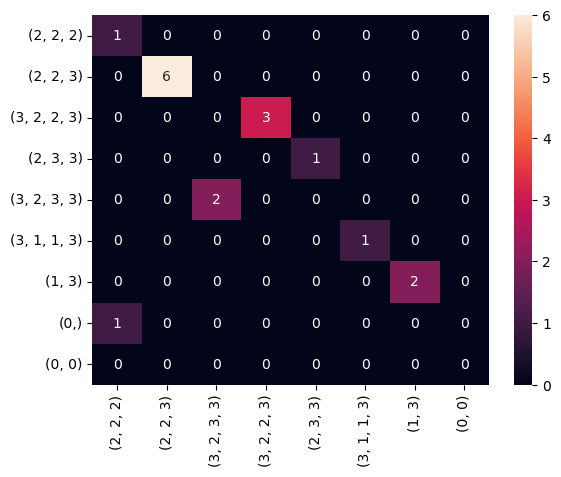

grouped_M3


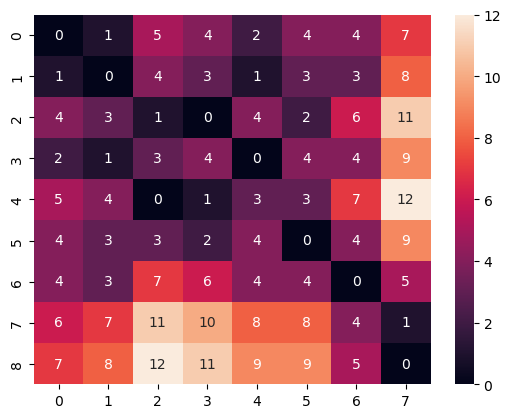

In [50]:
M3, grouped_M3, grouped_path3 = add_(g1, d1, d2, 15,12)

In [51]:
print("size of graph 1: ", M3[-1:].sum())
print("size of graph 2: ", M3[:,-1].sum())

size of graph 1:  147.0
size of graph 2:  141.0


In [52]:
# h = [1, 4, 5, 6, 7, 8, 9, 10, 11, 12]
# v = [4, 0, 2, 0, 3, 4, 1, 0, 1, 2]
# v = [3, 0, 3, 0, 1, 4, 2, 0, 2, 2]
# v = [0, 0, 2, 0, 2, 6, 2, 0, 3, 2]

# # sum(v)


In [53]:

# m = 0
# for i in range(len(h)):
#     m += h[i] * v[i]
# print(m)

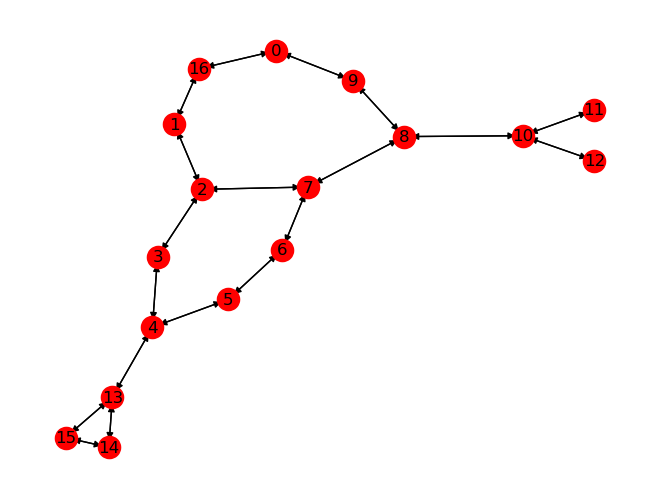

Distance between original graphs:  10.0
Distance to the first graph:  10.0
Distance to the second graph:  0.0
**********
Distance between original graphs, level = 3:  36.0
Distance to the first graph, level = 3:  36.0
Distance to the second graph, level = 3:  0.0
**********
Distance between original graphs, level = 4:  102.0
Distance to the first graph, level = 4:  102.0
Distance to the second graph, level = 4:  6.0
grouped_M3 * grouped_path3


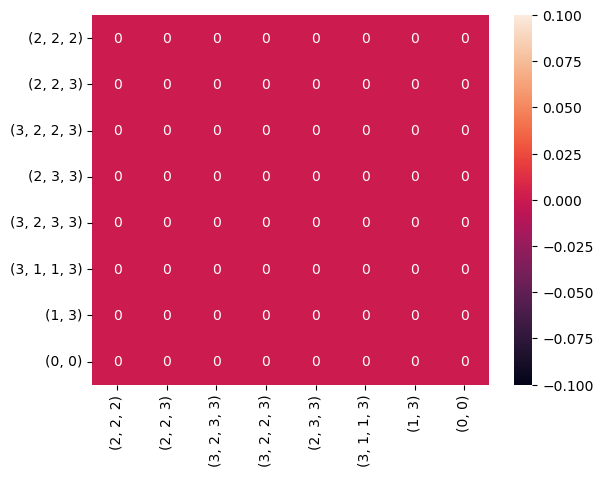

{(2, 2, 2): [0, 16], (2, 2, 3): [1, 5, 6, 9, 14, 15], (3, 2, 2, 3): [2, 4, 13], (2, 3, 3): [3], (3, 2, 3, 3): [7, 8], (3, 1, 1, 3): [10], (1, 3): [11, 12], (0, 0): [17]}
grouped_path3


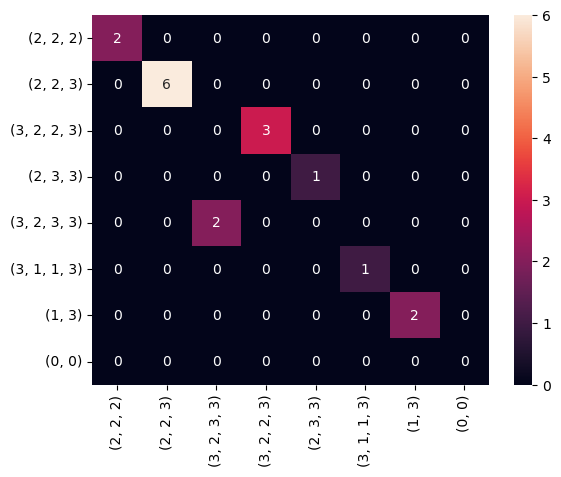

grouped_M3


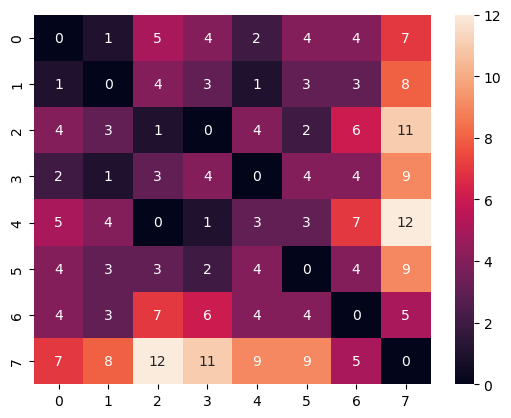

In [54]:
g1.remove_edge(1, 0)
g1.add_edge(16, 0)
g1.add_edge(16, 1)
M3, grouped_M3, grouped_path3 = add_(g1, d1, d2, 15,12)

In [55]:
print("size of graph 1: ", M3[-1:].sum())
print("size of graph 2: ", M3[:,-1].sum())

size of graph 1:  147.0
size of graph 2:  147.0


## Sample 2

In [56]:
# set datasets
d2 = dataset[3]
d1 = dataset[0]

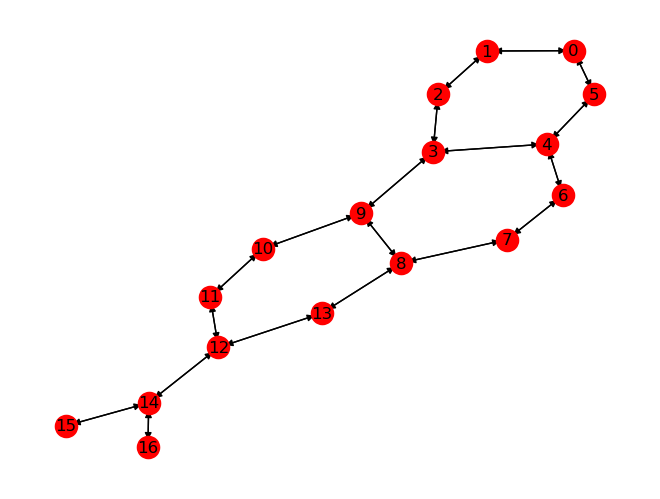

In [57]:
gr.draw_graph(d1)

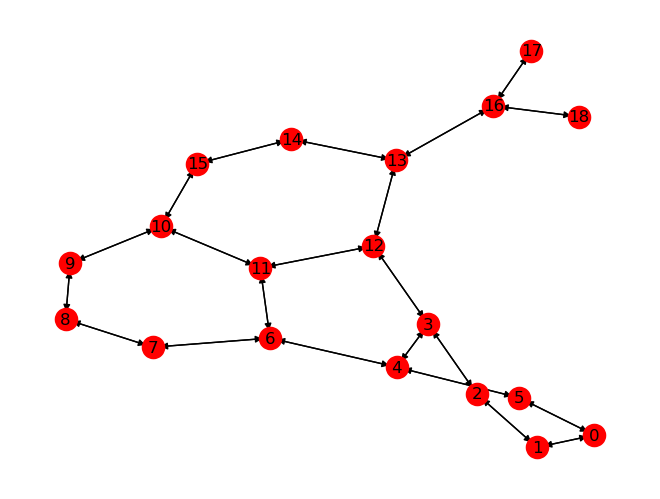

In [58]:
gr.draw_graph(d2)

In [59]:


# calculate histograms
a1, a2, max_max = gr.calc_distrib(d1, d2)
# aff empty nodes if needed
diff = sum(a2) - sum(a1) 
if diff > 0:
    a1[0] = diff
    coragraph = to_networkx(d1)
    while diff > 0:
        coragraph.add_node(max(list(coragraph.nodes))+1)
        diff = diff - 1
    d1_filled = from_networkx(coragraph)
    d1_filled.x = torch.ones(len(list(coragraph.nodes)), 1)
    print('Change 1')
elif diff < 0: 
    a2[0] = abs(diff)
    coragraph = to_networkx(d2)
    while diff < 0:
        coragraph.add_node(max(list(coragraph.nodes))+1)
        diff = diff + 1
    d2_filled = from_networkx(coragraph)
    d2_filled.x = torch.ones(len(list(coragraph.nodes)), 1)
    print('Change 2')
cost_matrix = gr_path.get_cost_matrix(max_max)

# dist_1, dist_2, M, wass = TMD(d1, d2, 1, L=l)
path, d = ot.emd(a1, a2, cost_matrix, log=True) 

Change 1


C:\Users\ekima\AppData\Local\Temp\ipykernel_2292\2196131488.py:26: UserWarning: Input histogram consists of integer. The transport plan will be casted accordingly, possibly resulting in a loss of precision. If this behaviour is unwanted, please make sure your input histogram consists of floating point elements.
  path, d = ot.emd(a1, a2, cost_matrix, log=True)


In [60]:
d1 = d1_filled

In [61]:
path = gr_path.update_path(path)
path

3
0 1
3
1 2
3
2 3


array([[0, 2, 0, 0],
       [0, 2, 2, 0],
       [0, 0, 9, 2],
       [0, 0, 0, 6]])

In [62]:
dist_1, dist_2, M2, wass = gr.TMD_original(d1, d2, 1, L=2)
path_node2, d = ot.emd(dist_1, dist_2, M2, log=True)

dist_1, dist_2, M3, wass = gr.TMD_original(d1, d2, 1, L=3)
path_node3, d = ot.emd(dist_1, dist_2, M3, log=True)

In [63]:
y_labels = get_nl(d1)
x_labels = get_nl(d2)

In [64]:
g1 = to_networkx(d1_filled)
g1 = g1.to_undirected()
# get nodes
nodes = gr_path.get_nodes(g1)
print("all nodes: ", nodes)

all nodes:  [[17, 18], [15, 16], [0, 1, 2, 5, 6, 7, 10, 11, 13], [3, 4, 8, 9, 12, 14]]


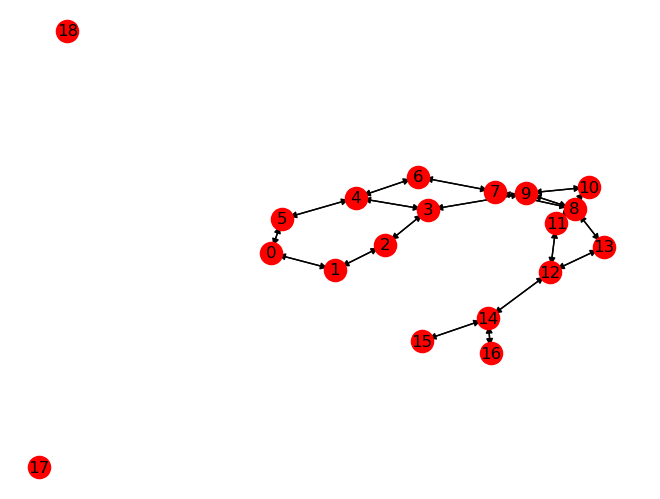

Distance between original graphs:  6.0
Distance to the first graph:  0.0
Distance to the second graph:  6.0
**********
Distance between original graphs, level = 3:  24.0
Distance to the first graph, level = 3:  0.0
Distance to the second graph, level = 3:  24.0
**********
Distance between original graphs, level = 4:  82.0
Distance to the first graph, level = 4:  0.0
Distance to the second graph, level = 4:  82.0
{(2, 2, 2): [0, 1], (2, 2, 3): [2, 5, 6, 7, 10, 11], (3, 2, 3, 3): [3, 9], (3, 2, 2, 3): [4, 8, 12], (2, 3, 3): [13], (3, 1, 1, 3): [14], (1, 3): [15, 16], (0,): [17, 18], (0, 0): [19]}


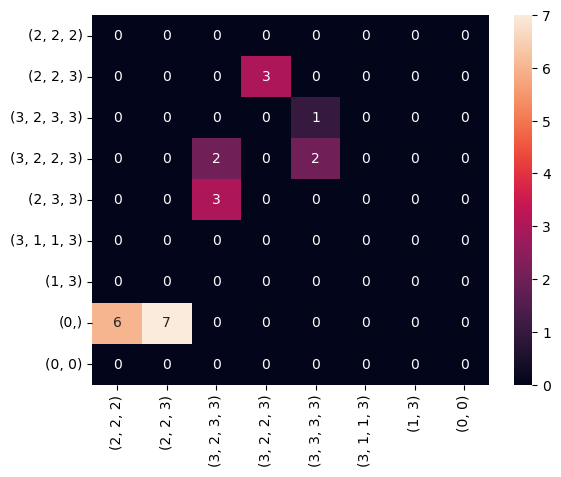

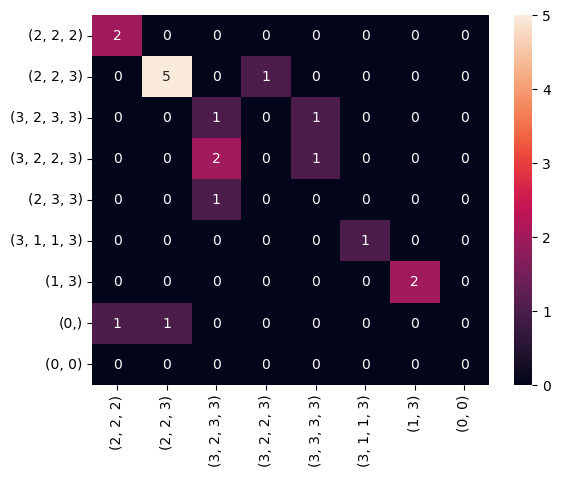

In [65]:
M3, grouped_M3, grouped_path3 = add_no_group(g1, d1, d2, 15,12)

In [66]:
print("size of graph 1: ", M3[-1:].sum())
print("size of graph 2: ", M3[:,-1].sum())

size of graph 1:  173.0
size of graph 2:  149.0


In [67]:
# g1.remove_edge(3, 17)
# g1.add_edge(/, 18)
g1.add_edge(13, 5)
# g1.add_edge(17, 18)


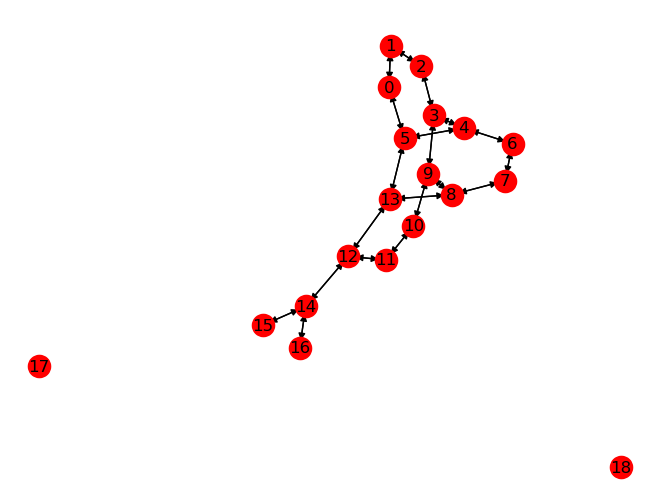

Distance between original graphs:  6.0
Distance to the first graph:  2.0
Distance to the second graph:  4.0
**********
Distance between original graphs, level = 3:  24.0
Distance to the first graph, level = 3:  12.0
Distance to the second graph, level = 3:  14.0
**********
Distance between original graphs, level = 4:  82.0
Distance to the first graph, level = 4:  52.0
Distance to the second graph, level = 4:  44.0
grouped_M3 * grouped_path3


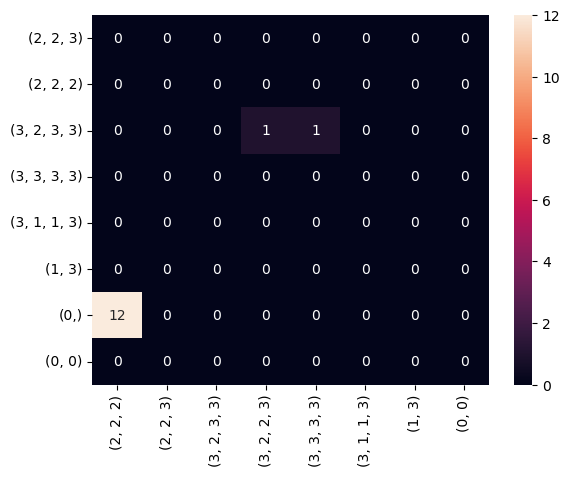

{(2, 2, 3): [0, 2, 6, 7, 10, 11], (2, 2, 2): [1], (3, 2, 3, 3): [3, 4, 5, 8, 9, 12], (3, 3, 3, 3): [13], (3, 1, 1, 3): [14], (1, 3): [15, 16], (0,): [17, 18], (0, 0): [19]}
grouped_path3


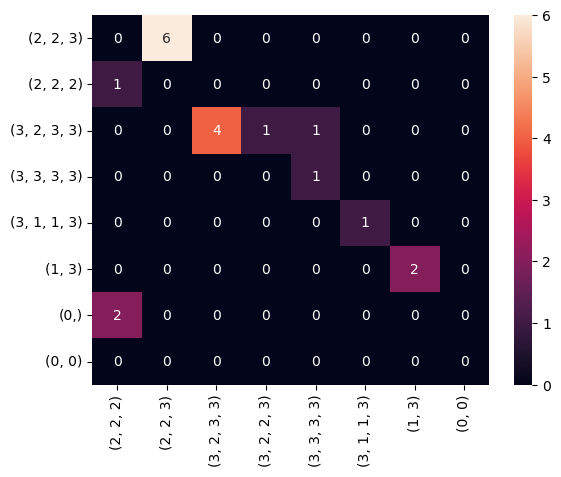

grouped_M3


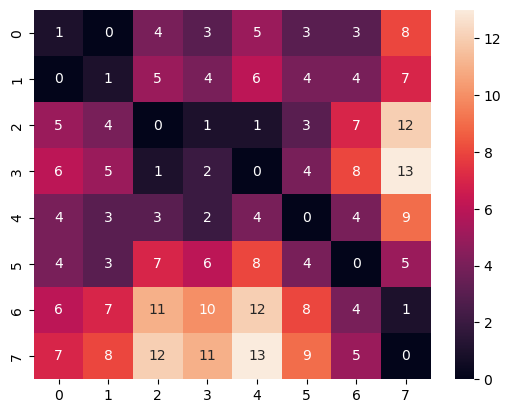

In [68]:
M3, grouped_M3, grouped_path3 = add_(g1, d1, d2, 15,12)

In [69]:
print("size of graph 1: ", M3[-1:].sum())
print("size of graph 2: ", M3[:,-1].sum())

size of graph 1:  173.0
size of graph 2:  161.0


In [70]:
# g1.remove_edge(6, 7)
g1.add_edge(17, 18)
# g1.add_edge(1, 14)


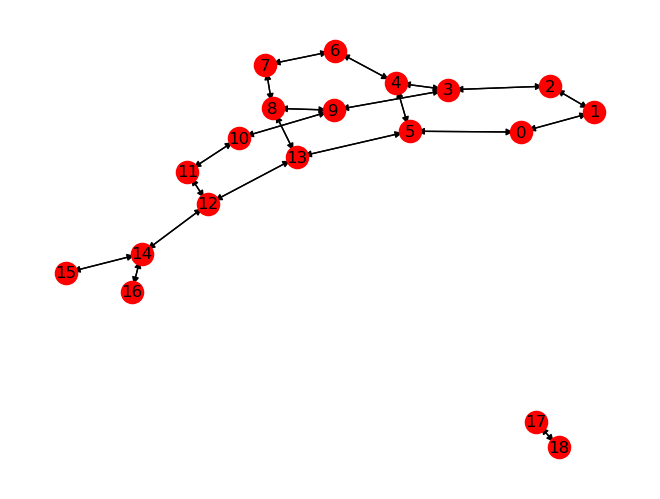

Distance between original graphs:  6.0
Distance to the first graph:  4.0
Distance to the second graph:  2.0
**********
Distance between original graphs, level = 3:  24.0
Distance to the first graph, level = 3:  16.0
Distance to the second graph, level = 3:  10.0
**********
Distance between original graphs, level = 4:  82.0
Distance to the first graph, level = 4:  58.0
Distance to the second graph, level = 4:  38.0
grouped_M3 * grouped_path3


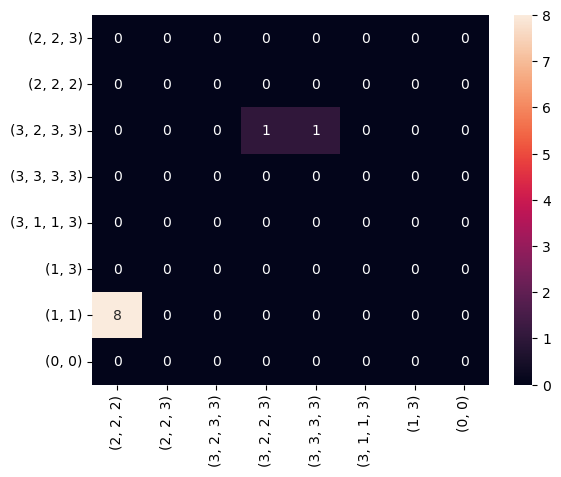

{(2, 2, 3): [0, 2, 6, 7, 10, 11], (2, 2, 2): [1], (3, 2, 3, 3): [3, 4, 5, 8, 9, 12], (3, 3, 3, 3): [13], (3, 1, 1, 3): [14], (1, 3): [15, 16], (1, 1): [17, 18], (0, 0): [19]}
grouped_path3


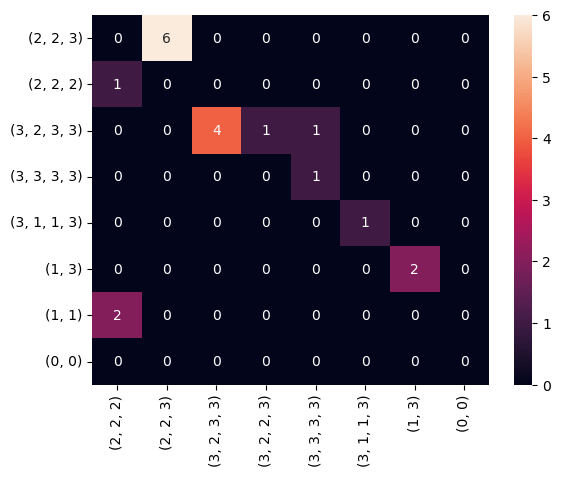

grouped_M3


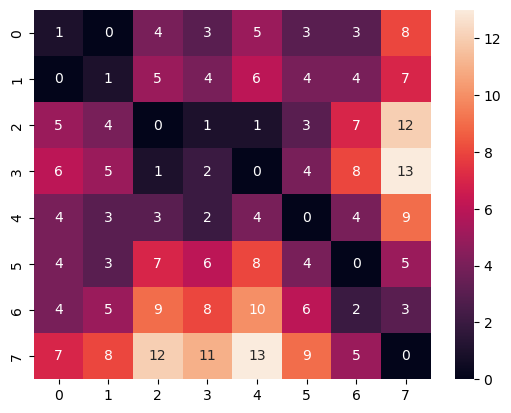

In [71]:
M3, grouped_M3, grouped_path3 = add_(g1, d1, d2, 15,12)

In [72]:
print("size of graph 1: ", M3[-1:].sum())
print("size of graph 2: ", M3[:,-1].sum())

size of graph 1:  173.0
size of graph 2:  165.0


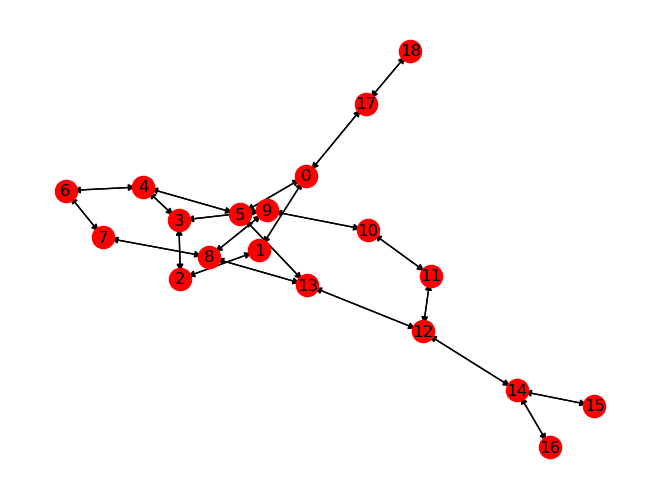

Distance between original graphs:  6.0
Distance to the first graph:  6.0
Distance to the second graph:  2.0
**********
Distance between original graphs, level = 3:  24.0
Distance to the first graph, level = 3:  26.0
Distance to the second graph, level = 3:  10.0
**********
Distance between original graphs, level = 4:  82.0
Distance to the first graph, level = 4:  92.0
Distance to the second graph, level = 4:  36.0
grouped_M3 * grouped_path3


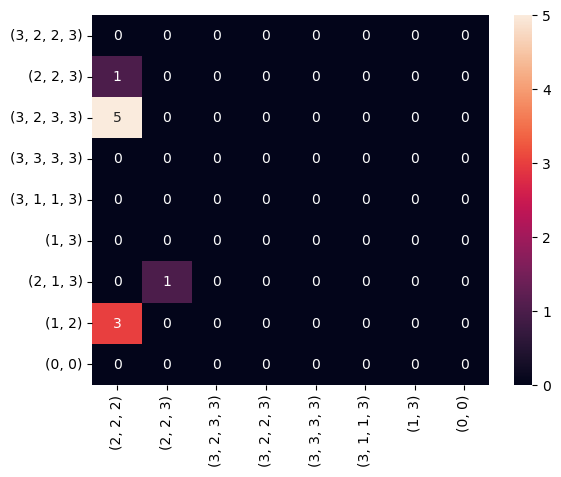

{(3, 2, 2, 3): [0], (2, 2, 3): [1, 2, 6, 7, 10, 11], (3, 2, 3, 3): [3, 4, 8, 9, 12], (3, 3, 3, 3): [5, 13], (3, 1, 1, 3): [14], (1, 3): [15, 16], (2, 1, 3): [17], (1, 2): [18], (0, 0): [19]}
grouped_path3


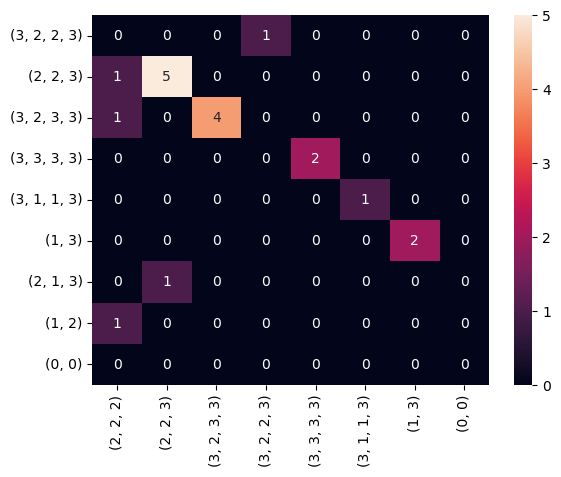

grouped_M3


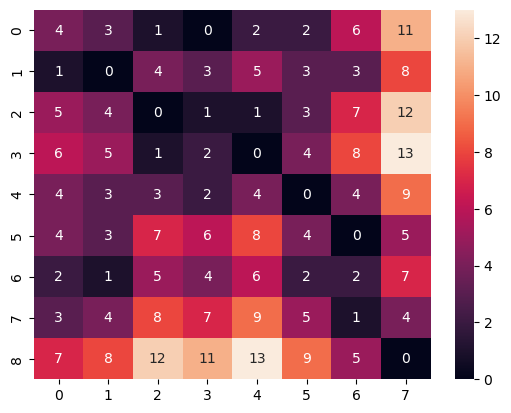

In [73]:
# g1.remove_edge(3, 4)
g1.add_edge(17, 0)
M3, grouped_M3, grouped_path3 = add_(g1, d1, d2, 15,12)

In [74]:
print("size of graph 1: ", M3[-1:].sum())
print("size of graph 2: ", M3[:,-1].sum())

size of graph 1:  173.0
size of graph 2:  175.0


In [61]:
# g1.remove_edge(15, 9)

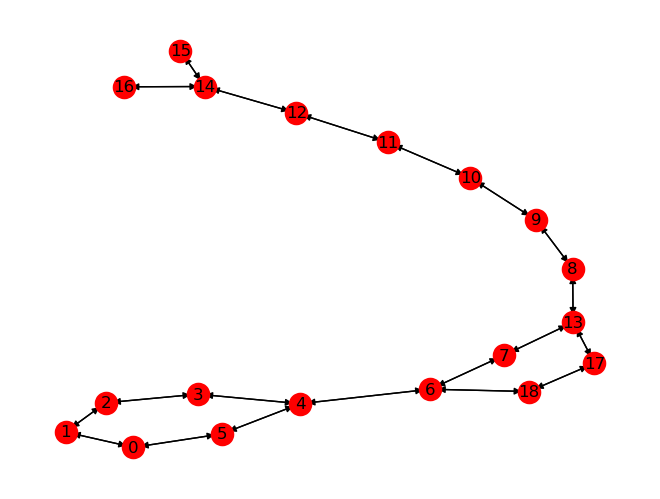

Distance between original graphs:  6.0
Distance to the first graph:  6.0
Distance to the second graph:  4.0
**********
Distance between original graphs, level = 3:  24.0
Distance to the first graph, level = 3:  24.0
Distance to the second graph, level = 3:  24.0
**********
Distance between original graphs, level = 4:  82.0
Distance to the first graph, level = 4:  78.0
Distance to the second graph, level = 4:  102.0


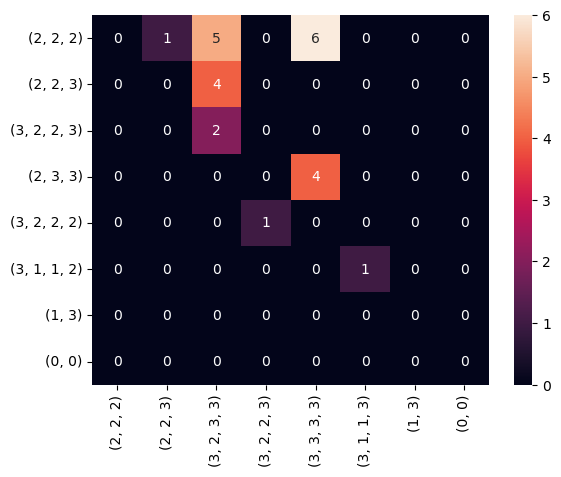

{(2, 2, 2): [0, 1, 2, 9, 10, 11], (2, 2, 3): [3, 5, 8, 12, 17, 18], (3, 2, 2, 3): [4, 6], (2, 3, 3): [7], (3, 2, 2, 2): [13], (3, 1, 1, 2): [14], (1, 3): [15, 16], (0, 0): [19]}


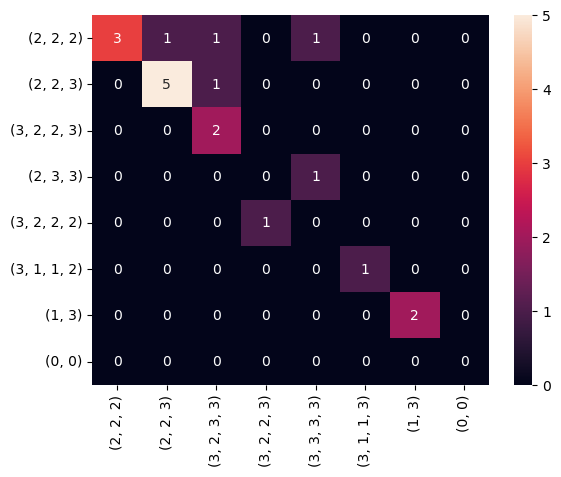

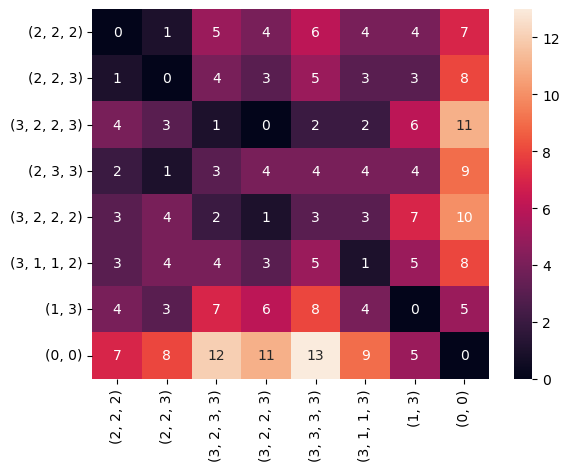

In [407]:
# g1.remove_edge(1, 0)
# g1.add_edge(16, 0)
g1.add_edge(6, 18)

# g1.remove_edge(7, 8)
g1.remove_edge(3, 9)
 
M3, grouped_M3, grouped_path3 = add_(g1, d1, d2, 15,12)

## Example 3 

In [75]:
# set datasets
d2 = dataset[1]
d1 = dataset[4]

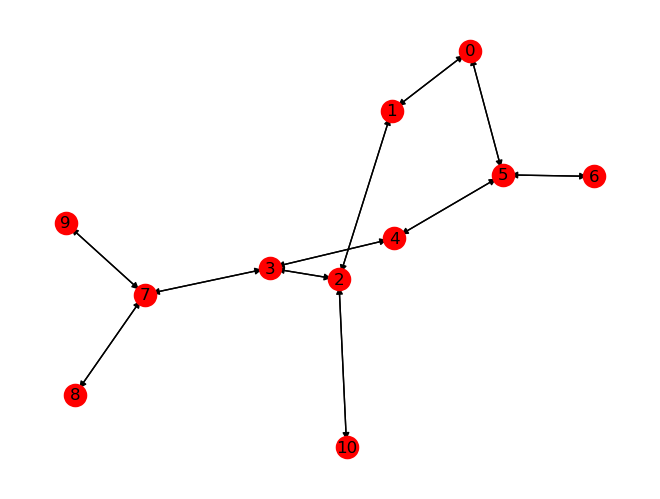

In [76]:
gr.draw_graph(d1)

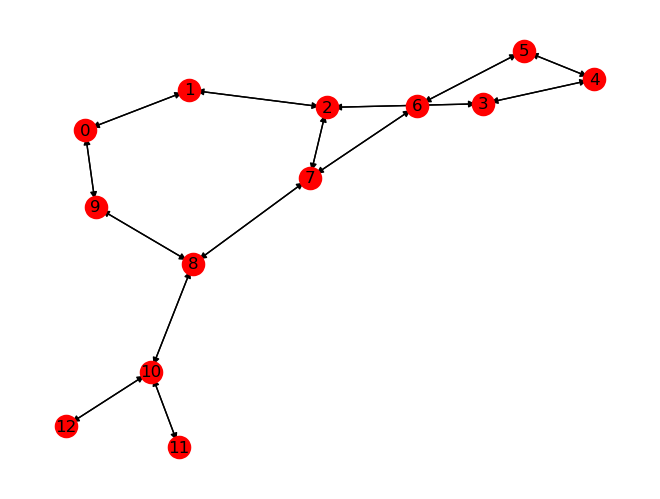

In [77]:
gr.draw_graph(d2)

In [78]:


# calculate histograms
a1, a2, max_max = gr.calc_distrib(d1, d2)
# aff empty nodes if needed
diff = sum(a2) - sum(a1) 
if diff > 0:
    a1[0] = diff
    coragraph = to_networkx(d1)
    while diff > 0:
        coragraph.add_node(max(list(coragraph.nodes))+1)
        diff = diff - 1
    d1_filled = from_networkx(coragraph)
    d1_filled.x = torch.ones(len(list(coragraph.nodes)), 1)
    print('Change 1')
elif diff < 0: 
    a2[0] = abs(diff)
    coragraph = to_networkx(d2)
    while diff < 0:
        coragraph.add_node(max(list(coragraph.nodes))+1)
        diff = diff + 1
    d2_filled = from_networkx(coragraph)
    d2_filled.x = torch.ones(len(list(coragraph.nodes)), 1)
    print('Change 2')
cost_matrix = gr_path.get_cost_matrix(max_max)

# dist_1, dist_2, M, wass = TMD(d1, d2, 1, L=l)
path, d = ot.emd(a1, a2, cost_matrix, log=True) 

Change 1


C:\Users\ekima\AppData\Local\Temp\ipykernel_2292\2196131488.py:26: UserWarning: Input histogram consists of integer. The transport plan will be casted accordingly, possibly resulting in a loss of precision. If this behaviour is unwanted, please make sure your input histogram consists of floating point elements.
  path, d = ot.emd(a1, a2, cost_matrix, log=True)


In [79]:
d1 = d1_filled

In [80]:
path = gr_path.update_path(path)
path

2
0 1
2
1 2


array([[0, 2, 0, 0],
       [0, 2, 4, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [82]:
dist_1, dist_2, M2, wass = gr.TMD_original(d1, d2, 1, L=2)
path_node2, d = ot.emd(dist_1, dist_2, M2, log=True)

dist_1, dist_2, M3, wass = gr.TMD_original(d1, d2, 1, L=3)
path_node3, d = ot.emd(dist_1, dist_2, M3, log=True)

In [83]:
y_labels = get_nl(d1)
x_labels = get_nl(d2)

In [86]:
g1 = to_networkx(d1_filled)
g1 = g1.to_undirected()
# get nodes
nodes = gr_path.get_nodes(g1)
print("all nodes: ", nodes)

all nodes:  [[11, 12], [6, 8, 9, 10], [0, 1, 4], [2, 3, 5, 7]]


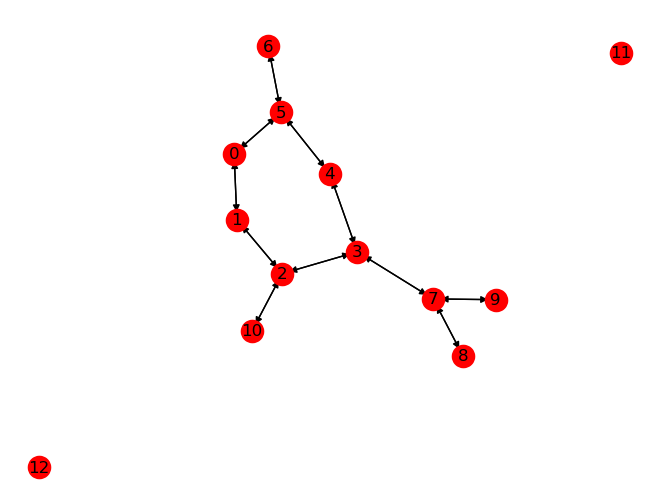

Distance between original graphs:  6.0
Distance to the first graph:  0.0
Distance to the second graph:  6.0
**********
Distance between original graphs, level = 3:  24.0
Distance to the first graph, level = 3:  0.0
Distance to the second graph, level = 3:  24.0
**********
Distance between original graphs, level = 4:  70.0
Distance to the first graph, level = 4:  0.0
Distance to the second graph, level = 4:  70.0
grouped_M3 * grouped_path3


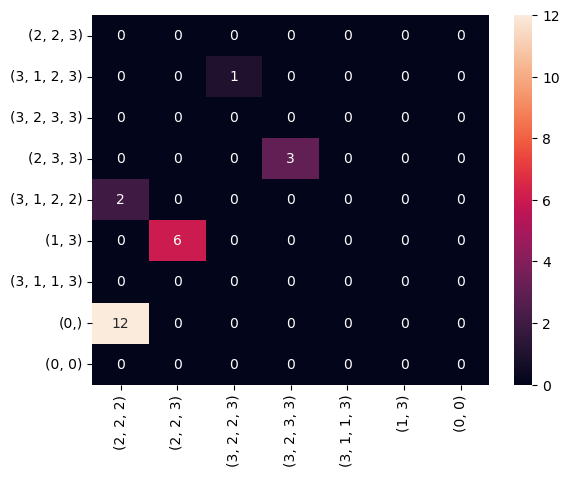

{(2, 2, 3): [0, 1], (3, 1, 2, 3): [2], (3, 2, 3, 3): [3], (2, 3, 3): [4], (3, 1, 2, 2): [5], (1, 3): [6, 8, 9, 10], (3, 1, 1, 3): [7], (0,): [11, 12], (0, 0): [13]}
grouped_path3


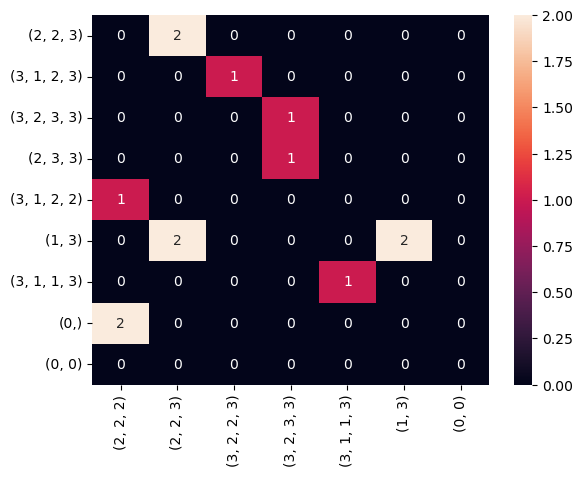

grouped_M3


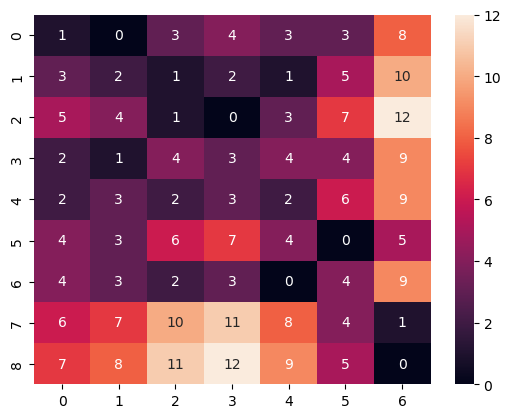

In [87]:
M3, grouped_M3, grouped_path3 = add_(g1, d1, d2, 15,12)

In [88]:
g1.add_edge(11, 0)
# g1.remove_edge(11, 4)

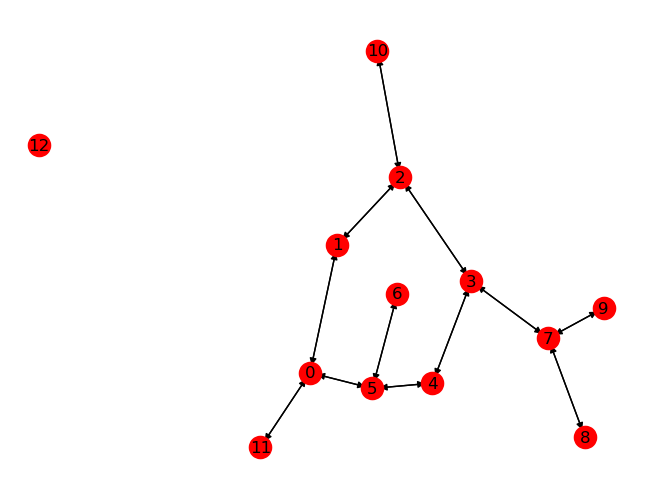

Distance between original graphs:  6.0
Distance to the first graph:  2.0
Distance to the second graph:  6.0
**********
Distance between original graphs, level = 3:  24.0
Distance to the first graph, level = 3:  8.0
Distance to the second graph, level = 3:  24.0
**********
Distance between original graphs, level = 4:  70.0
Distance to the first graph, level = 4:  24.0
Distance to the second graph, level = 4:  70.0
grouped_M3 * grouped_path3


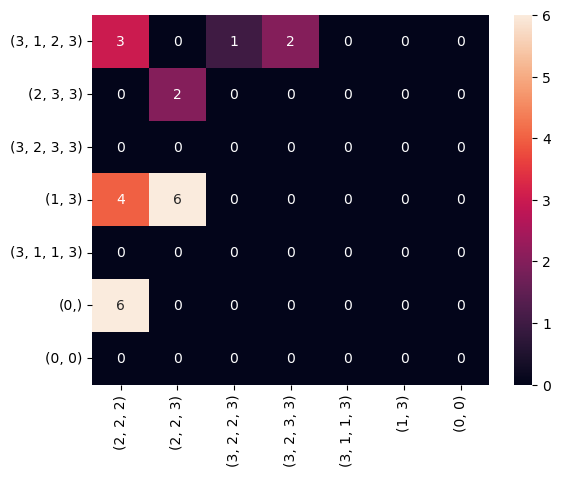

{(3, 1, 2, 3): [0, 2, 5], (2, 3, 3): [1, 4], (3, 2, 3, 3): [3], (1, 3): [6, 8, 9, 10, 11], (3, 1, 1, 3): [7], (0,): [12], (0, 0): [13]}
grouped_path3


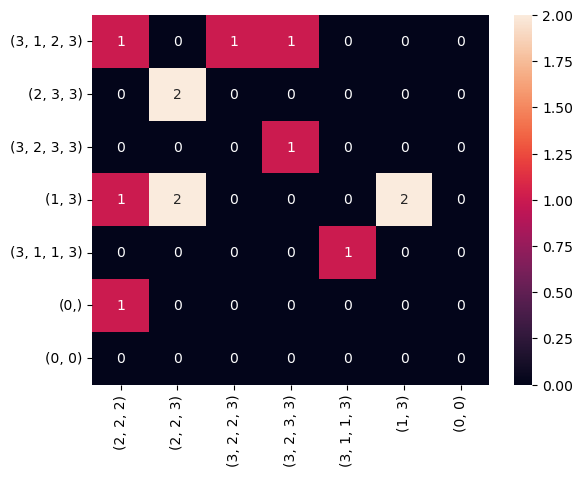

grouped_M3


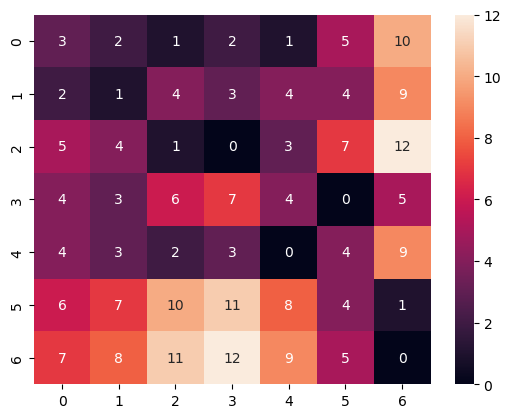

In [89]:
M3, grouped_M3, grouped_path3 = add_(g1, d1, d2, 15,12)

In [90]:
# g1.remove_edge(12, 5)
g1.add_edge(1, 4)
# g1.add_edge(1, 14)


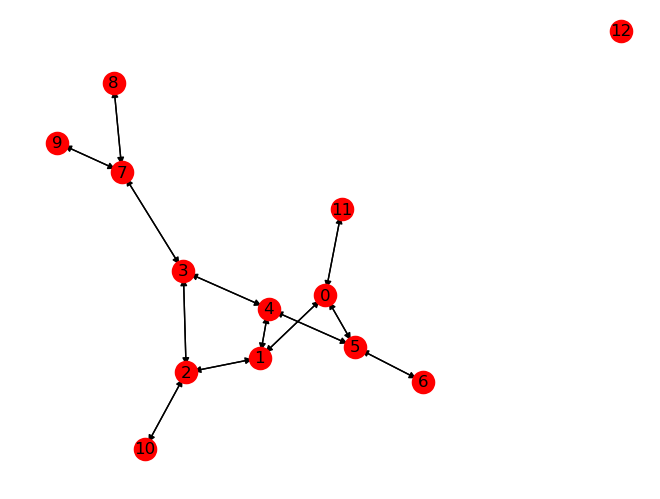

Distance between original graphs:  6.0
Distance to the first graph:  4.0
Distance to the second graph:  8.0
**********
Distance between original graphs, level = 3:  24.0
Distance to the first graph, level = 3:  20.0
Distance to the second graph, level = 3:  30.0
**********
Distance between original graphs, level = 4:  70.0
Distance to the first graph, level = 4:  78.0
Distance to the second graph, level = 4:  96.0
grouped_M3 * grouped_path3


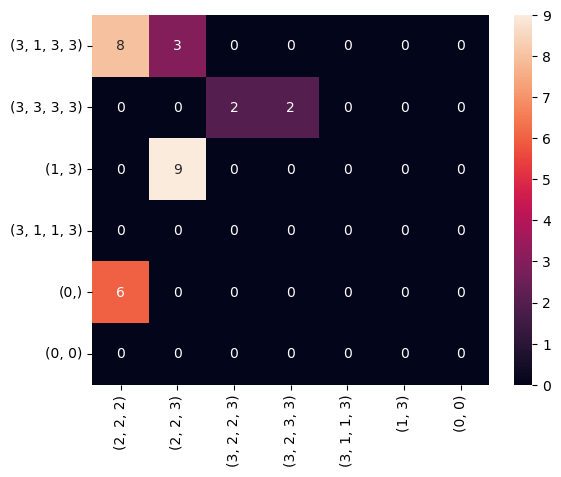

{(3, 1, 3, 3): [0, 2, 5], (3, 3, 3, 3): [1, 3, 4], (1, 3): [6, 8, 9, 10, 11], (3, 1, 1, 3): [7], (0,): [12], (0, 0): [13]}
grouped_path3


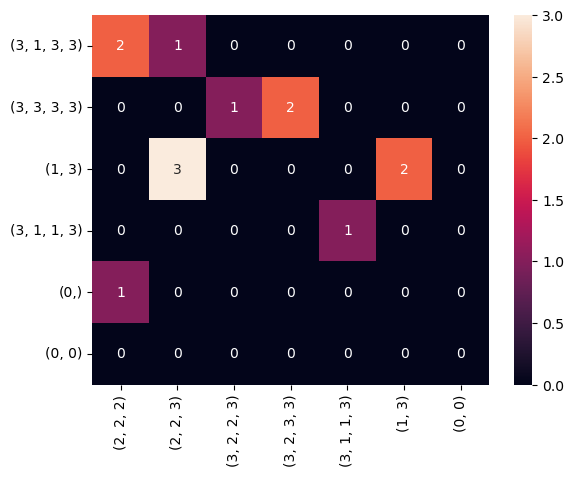

grouped_M3


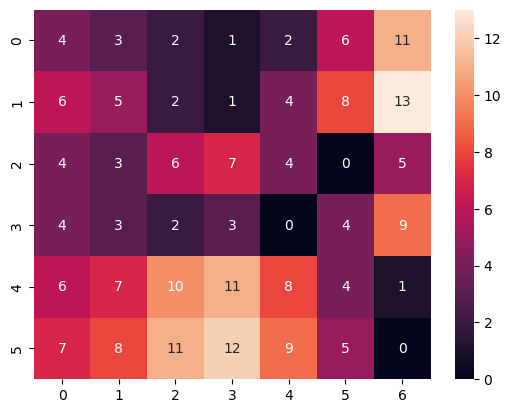

In [91]:
M3, grouped_M3, grouped_path3 = add_(g1, d1, d2, 15,12)

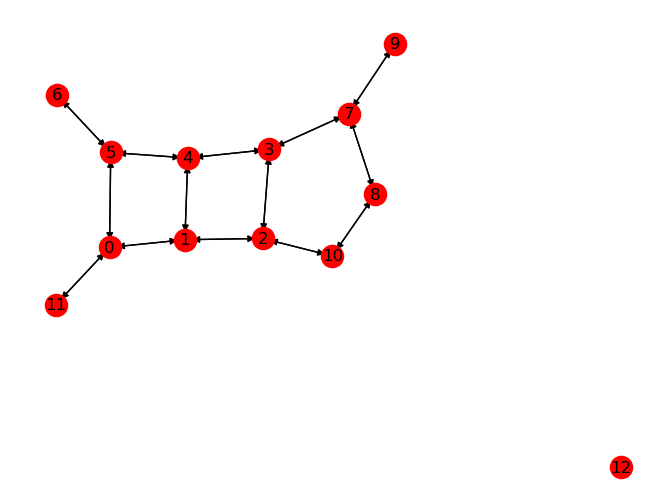

Distance between original graphs:  6.0
Distance to the first graph:  6.0
Distance to the second graph:  6.0
**********
Distance between original graphs, level = 3:  24.0
Distance to the first graph, level = 3:  28.0
Distance to the second graph, level = 3:  26.0
**********
Distance between original graphs, level = 4:  70.0
Distance to the first graph, level = 4:  106.0
Distance to the second graph, level = 4:  92.0
grouped_M3 * grouped_path3


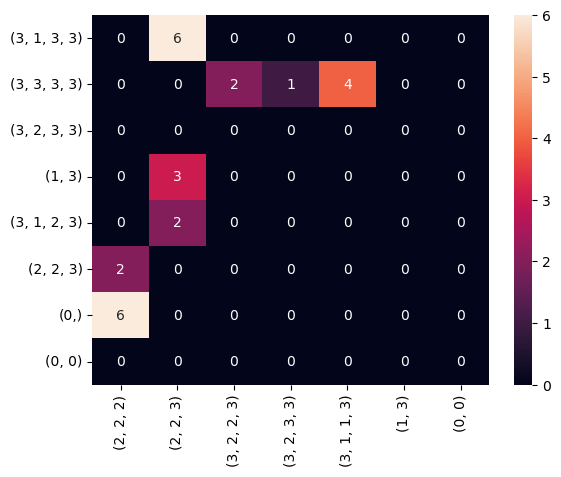

{(3, 1, 3, 3): [0, 5], (3, 3, 3, 3): [1, 3, 4], (3, 2, 3, 3): [2], (1, 3): [6, 9, 11], (3, 1, 2, 3): [7], (2, 2, 3): [8, 10], (0,): [12], (0, 0): [13]}
grouped_path3


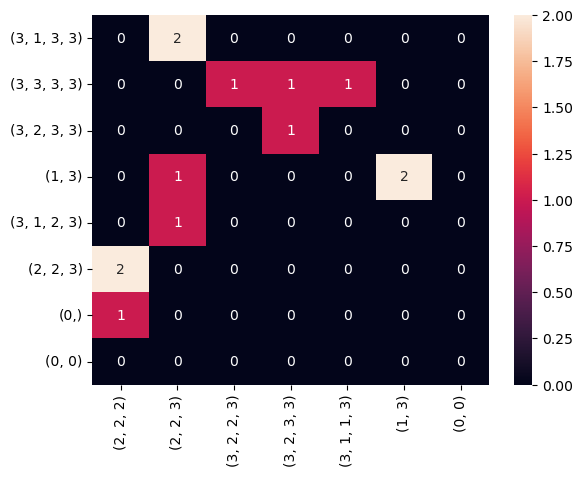

grouped_M3


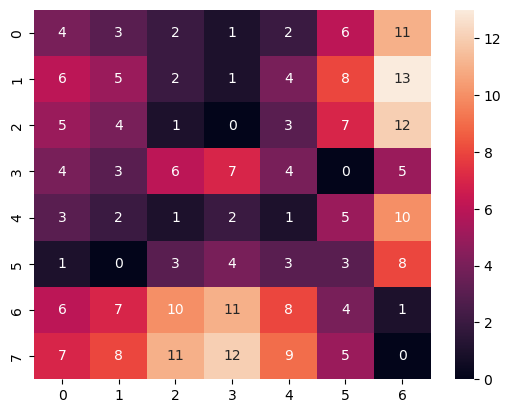

In [93]:

g1.add_edge(10, 8)
M3, grouped_M3, grouped_path3 = add_(g1, d1, d2, 15,12)

In [95]:
def get_nl_l2(input_graph):
    d = gr.get_neighbors(input_graph)
    names = []
    for k, v in d.items():
        neighb = [len(d[vv]) for vv in v]
        neighb.sort()
        name = [len(v)] + neighb
        names.append(name)
    diff = len(d1.x) - len(names)
    for i in range(diff):
        names.append([0])
    names.append([0, 0])
    names_lvl2 = [] 
    for k, v in d.items():

        neighb = [tuple(names[vv]) for vv in v]
        neighb.sort()
        new_name = names[k] + neighb
        names_lvl2.append(new_name)
    for i in range(diff):
        names_lvl2.append([0])
    names_lvl2.append([0, 0])
    return names_lvl2


In [96]:
len(get_nl(d1))

14

In [97]:
get_nl_l2(d1)

[[2, 2, 3, (2, 2, 3), (3, 1, 2, 2)],
 [2, 2, 3, (2, 2, 3), (3, 1, 2, 3)],
 [3, 1, 2, 3, (1, 3), (2, 2, 3), (3, 2, 3, 3)],
 [3, 2, 3, 3, (2, 3, 3), (3, 1, 1, 3), (3, 1, 2, 3)],
 [2, 3, 3, (3, 1, 2, 2), (3, 2, 3, 3)],
 [3, 1, 2, 2, (1, 3), (2, 2, 3), (2, 3, 3)],
 [1, 3, (3, 1, 2, 2)],
 [3, 1, 1, 3, (1, 3), (1, 3), (3, 2, 3, 3)],
 [1, 3, (3, 1, 1, 3)],
 [1, 3, (3, 1, 1, 3)],
 [1, 3, (3, 1, 2, 3)],
 [0],
 [0],
 [0, 0]]

In [ ]:
# https://pythonot.github.io/gen_modules/ot.gromov.html - pot package 

## Edit distance analyses 

Edit distance between 2 simple examples 

In [98]:
G1 = nx.cycle_graph(6)
G2 = nx.wheel_graph(7)
nx.graph_edit_distance(G1, G2)

7.0

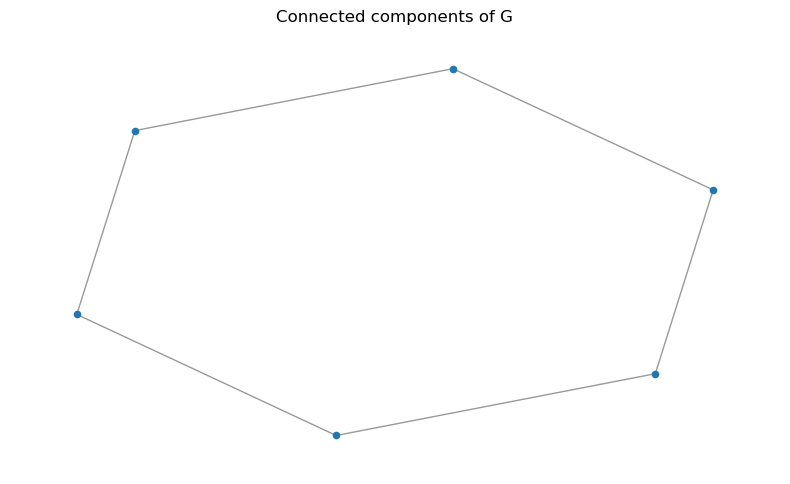

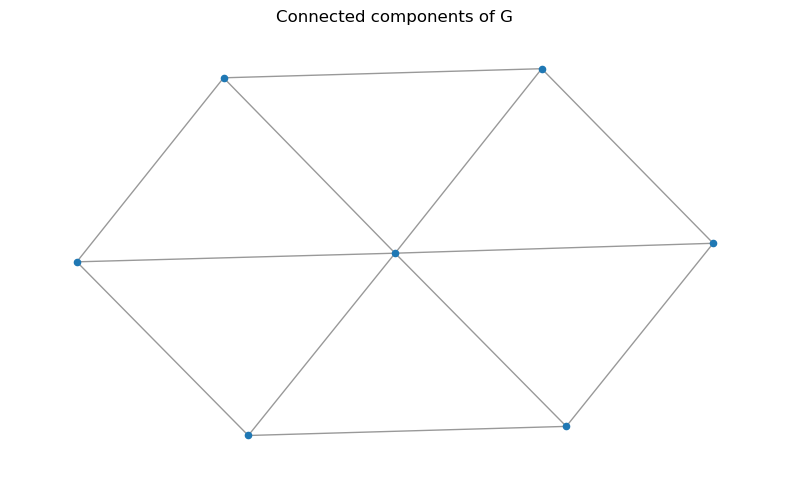

In [101]:
gr.plot_graph(G1)
gr.plot_graph(G2)

In [108]:
paths, cost = nx.optimal_edit_paths(G1, G2)

In [109]:
cost

7.0

In [110]:
paths[0]
# first line - node alignments 
# following lines - edge alignments

([(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (None, 6)],
 [((0, 1), (0, 1)),
  ((1, 2), (1, 2)),
  (None, (0, 2)),
  ((2, 3), (2, 3)),
  (None, (0, 3)),
  ((3, 4), (3, 4)),
  (None, (0, 4)),
  ((0, 5), (0, 5)),
  ((4, 5), (4, 5)),
  (None, (0, 6)),
  (None, (1, 6)),
  (None, (5, 6))])

In [102]:
G3 = to_networkx(dataset[1])
G3 = G3.to_undirected()

G4 = to_networkx(dataset[0])
G4 = G4.to_undirected()


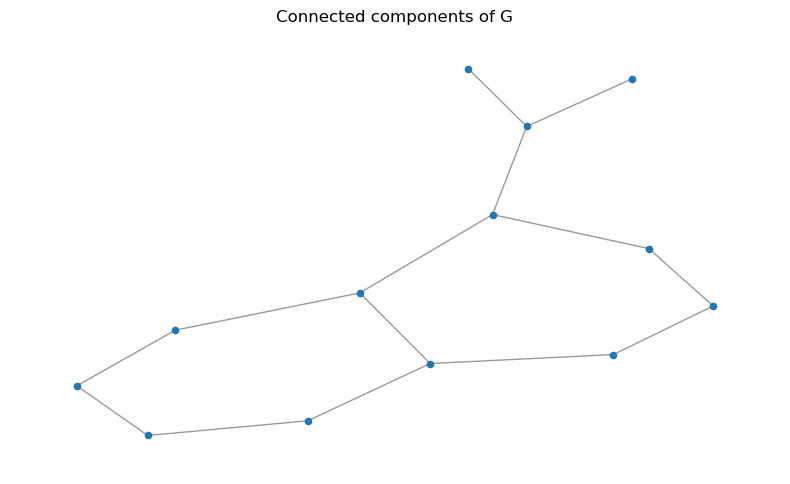

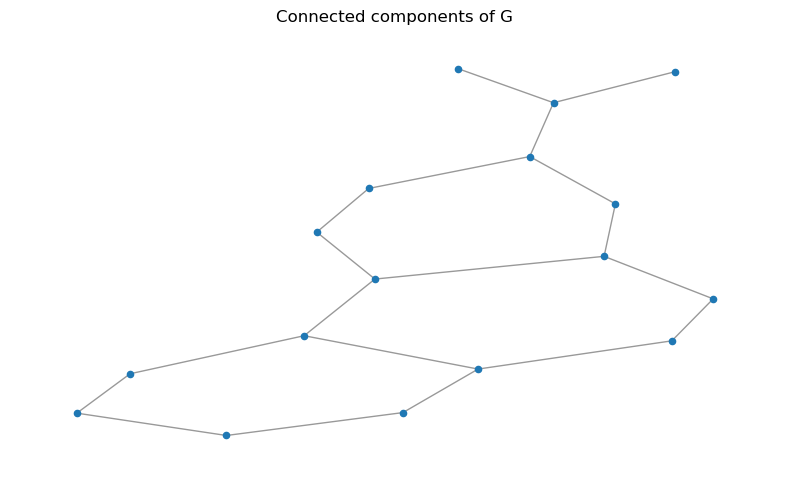

In [103]:
gr.plot_graph(G3)
gr.plot_graph(G4)

In [112]:
# with limited timeout
for i in nx.optimize_edit_paths(G3, G4, timeout=20):
    print(i) # best path for optimization

([(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (None, 13), (None, 14), (None, 15), (None, 16)], [((0, 1), (0, 1)), ((1, 2), (1, 2)), ((2, 3), (2, 3)), ((3, 4), (3, 4)), ((4, 5), (4, 5)), (None, (0, 5)), ((5, 6), None), (None, (4, 6)), ((2, 7), None), ((6, 7), (6, 7)), ((7, 8), (7, 8)), ((0, 9), None), ((8, 9), (8, 9)), (None, (3, 9)), ((8, 10), None), (None, (9, 10)), ((10, 11), (10, 11)), ((10, 12), None), (None, (11, 12)), (None, (8, 13)), (None, (12, 13)), (None, (12, 14)), (None, (14, 15)), (None, (14, 16))], 19.0)
([(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (11, 10), (10, 11), (12, 12), (None, 13), (None, 14), (None, 15), (None, 16)], [((0, 1), (0, 1)), ((1, 2), (1, 2)), ((2, 3), (2, 3)), ((3, 4), (3, 4)), ((4, 5), (4, 5)), (None, (0, 5)), ((5, 6), None), (None, (4, 6)), ((2, 7), None), ((6, 7), (6, 7)), ((7, 8), (7, 8)), ((0, 9), None), ((8, 9), (8, 9)), (None, (3, 9)), (None, (

In [113]:
# set datasets
d2 = dataset[0]
d1 = dataset[1]

# calculate histograms
a1, a2, max_max = gr.calc_distrib(d1, d2)
# aff empty nodes if needed
diff = sum(a2) - sum(a1) 
if diff > 0:
    a1[0] = diff
    coragraph = to_networkx(d1)
    while diff > 0:
        coragraph.add_node(max(list(coragraph.nodes))+1)
        diff = diff - 1
    d1_filled = from_networkx(coragraph)
    d1_filled.x = torch.ones(len(list(coragraph.nodes)), 1)
    print('Change 1')
elif diff < 0: 
    a2[0] = abs(diff)
    coragraph = to_networkx(d2)
    while diff < 0:
        coragraph.add_node(max(list(coragraph.nodes))+1)
        diff = diff + 1
    d2_filled = from_networkx(coragraph)
    d2_filled.x = torch.ones(len(list(coragraph.nodes)), 1)
    print('Change 2')
# cost_matrix = gr_path.get_cost_matrix(max_max)

dist_1, dist_2, M, wass = gr.TMD_original(d1_filled, d2, 1, L=2)
path, d = ot.emd(dist_1, dist_2, M, log=True) 

Change 1


In [114]:
cost_new = np.zeros((18,18))
for pair in i[0]:
    cost_new[pair] = 1

In [116]:
# equal nodes
def return_eq(node1, node2):
    return node1==node2

# relabel nodes based on the matrix from TMD 
def get_new_node(left_index, path):
    return int(np.where(path[left_index] == 1)[0])


In [191]:
G3 = to_networkx(d2)
G3 = G3.to_undirected()

# graph that will be modified 
G4 = to_networkx(d1_filled)
G4 = G4.to_undirected()

G34 = to_networkx(d1_filled)
G34 = G34.to_undirected()



([(0, 10), (1, 11), (2, 8), (3, 9), (4, 0), (5, 5), (6, 7), (7, 3), (8, 14), (9, 2), (10, 12), (11, 16), (12, 6), (13, 15), (14, 13), (15, 4), (16, 1)], [((0, 1), (10, 11)), ((1, 2), (11, 8)), ((2, 3), (8, 9)), ((3, 4), (9, 0)), ((0, 5), None), ((4, 5), (0, 5)), ((4, 6), None), (None, (5, 7)), ((6, 7), (7, 3)), (None, (8, 3)), ((7, 8), (3, 14)), ((3, 9), None), ((8, 9), (14, 2)), (None, (10, 2)), ((9, 10), None), (None, (14, 12)), ((10, 11), (12, 16)), ((11, 12), None), (None, (12, 6)), ((8, 13), None), ((12, 13), None), ((12, 14), None), ((14, 15), None), ((14, 16), None)], 15.0)
([(0, 10), (1, 11), (2, 8), (3, 9), (4, 0), (5, 5), (6, 7), (7, 3), (8, 14), (9, 2), (13, 12), (10, 16), (12, 6), (11, 15), (14, 13), (15, 4), (16, 1)], [((0, 1), (10, 11)), ((1, 2), (11, 8)), ((2, 3), (8, 9)), ((3, 4), (9, 0)), ((0, 5), None), ((4, 5), (0, 5)), ((4, 6), None), (None, (5, 7)), ((6, 7), (7, 3)), (None, (8, 3)), ((7, 8), (3, 14)), ((3, 9), None), ((8, 9), (14, 2)), (None, (10, 2)), ((8, 13), (1

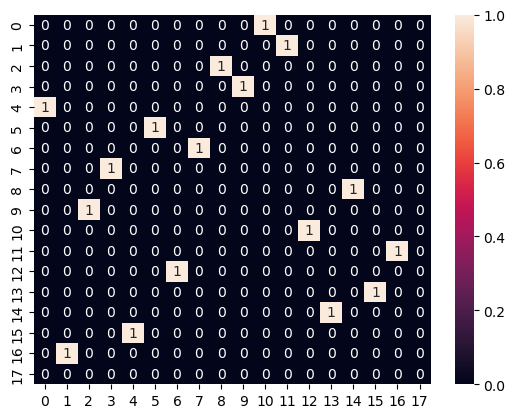

In [202]:
l = 2
dist_1, dist_2, M, wass = gr.TMD_original(d1_filled, d2, 1, L=l)
path, d = ot.emd(dist_1, dist_2, M, log=True) 

sns.heatmap(path, annot=True)

# distance with no alignment
for i in nx.optimize_edit_paths(G3, G4, timeout=0.05): #, node_match=return_eq):
    print(i)

In [203]:
d = {}
for i in G4.nodes():
    d[i] = get_new_node(i, path)
# align nodes in two graphs     
G4 = nx.relabel_nodes(G4, d)

for i in nx.optimize_edit_paths(G3, G4, timeout=0.01, node_match=return_eq):
    print("Nodes: ", i[0])
    print("Edges: ", i[1])
    print("Cost: ", i[2])
    
    print("="*10)

Nodes:  [(0, 10), (1, 11), (2, 8), (3, 9), (4, 0), (5, 5), (6, 7), (7, 3), (8, 14), (9, 2), (10, 12), (11, 16), (12, 6), (13, 15), (14, 13), (15, 4), (16, 1)]
Edges:  [((0, 1), (10, 11)), ((1, 2), (11, 8)), ((2, 3), (8, 9)), ((3, 4), (9, 0)), ((0, 5), None), ((4, 5), (0, 5)), ((4, 6), None), (None, (5, 7)), ((6, 7), (7, 3)), (None, (8, 3)), ((7, 8), (3, 14)), ((3, 9), None), ((8, 9), (14, 2)), (None, (10, 2)), ((9, 10), None), (None, (14, 12)), ((10, 11), (12, 16)), ((11, 12), None), (None, (12, 6)), ((8, 13), None), ((12, 13), None), ((12, 14), None), ((14, 15), None), ((14, 16), None)]
Cost:  15.0


In [194]:
# above the is an optimal path in terms of edit distance
# I try to add and remove all the edges 

In [195]:
G34.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16))

In [196]:
G34 = nx.relabel_nodes(G34, d)


In [197]:
G34.nodes

NodeView((10, 11, 8, 9, 0, 5, 7, 3, 14, 2, 12, 16, 6, 15, 13, 4, 1))

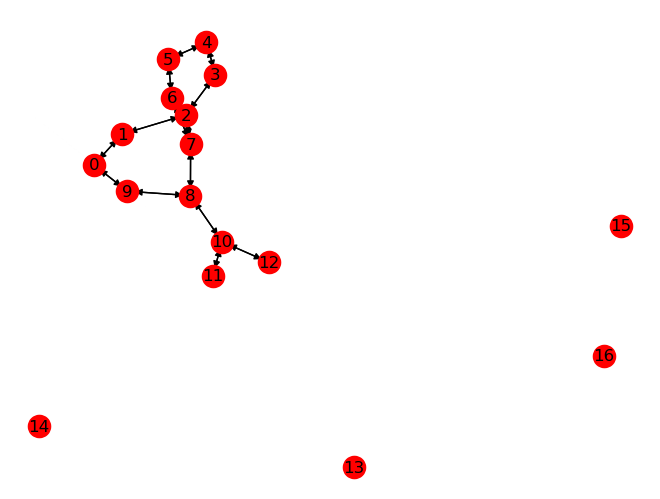

Distance between original graphs:  14.0
Distance to the first graph:  4.0
Distance to the second graph:  10.0
**********
Distance between original graphs, level = 3:  40.0
Distance to the first graph, level = 3:  4.0
Distance to the second graph, level = 3:  36.0
**********
Distance between original graphs, level = 4:  106.0
Distance to the first graph, level = 4:  4.0
Distance to the second graph, level = 4:  102.0
{(2, 2, 2): [0, 4, 5], (2, 2, 3): [1, 3, 6, 9], (3, 2, 2, 3): [2], (3, 2, 3, 3): [7, 8], (3, 1, 1, 3): [10], (1, 3): [11, 12], (0, 0): [13]}


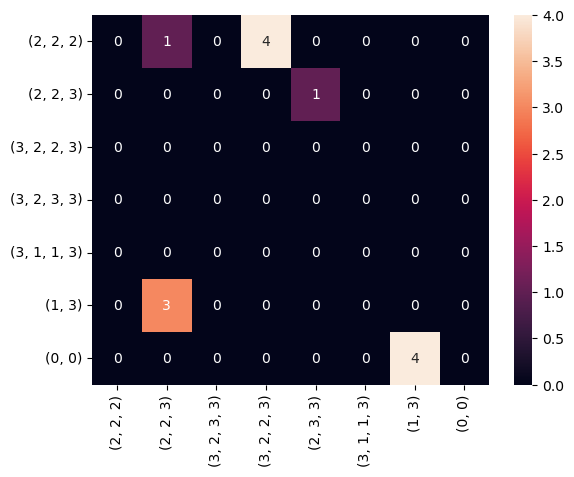

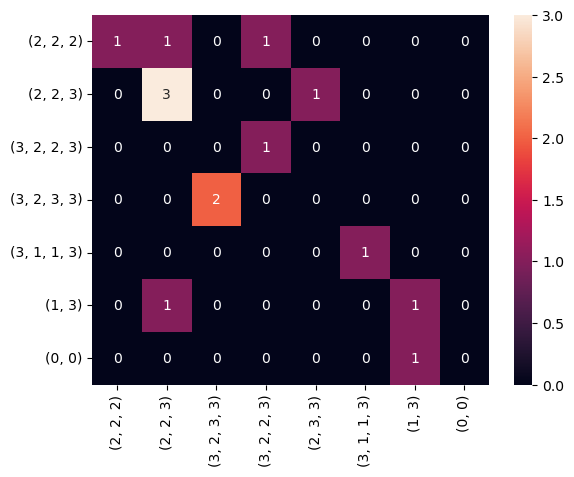

In [163]:
# original graph with distances 
M3, grouped_M3, grouped_path3 = add_no_group(G34, d1, d2, 15,12)

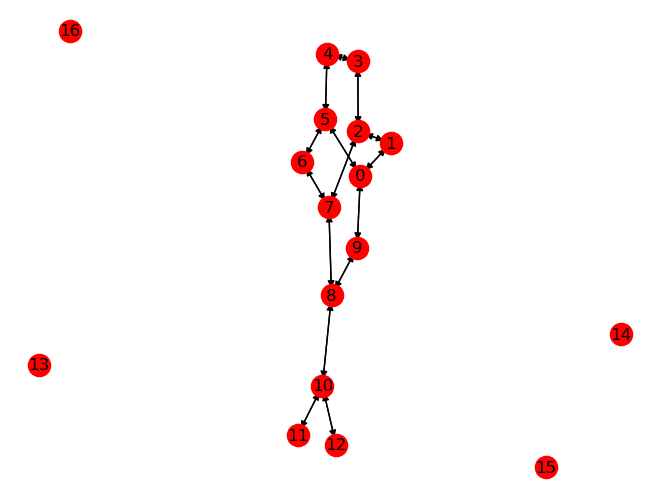

Distance between original graphs:  14.0
Distance to the first graph:  6.0
Distance to the second graph:  8.0
**********
Distance between original graphs, level = 3:  40.0
Distance to the first graph, level = 3:  16.0
Distance to the second graph, level = 3:  28.0
**********
Distance between original graphs, level = 4:  106.0
Distance to the first graph, level = 4:  50.0
Distance to the second graph, level = 4:  84.0
{(3, 2, 2, 3): [0, 2, 5], (2, 3, 3): [1, 6, 9], (2, 2, 3): [3, 4], (3, 2, 3, 3): [7, 8], (3, 1, 1, 3): [10], (1, 3): [11, 12], (0, 0): [13]}


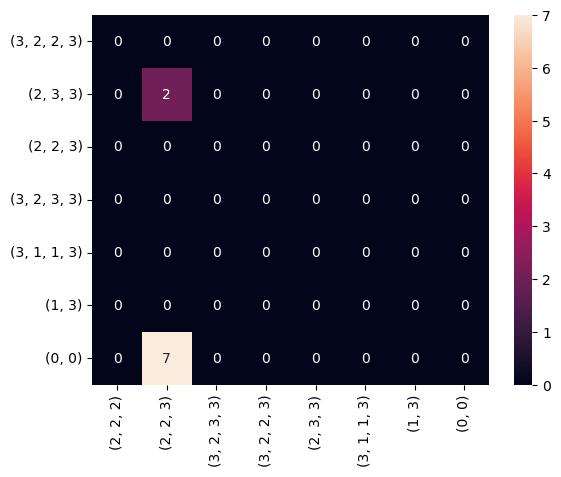

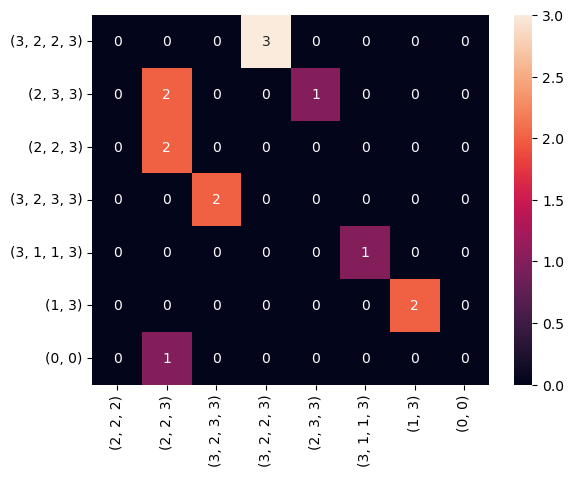

In [165]:
# ((0, 5), None)
G34.add_edge(10, 5)
M3, grouped_M3, grouped_path3 = add_no_group(G34, d1, d2, 15,12)

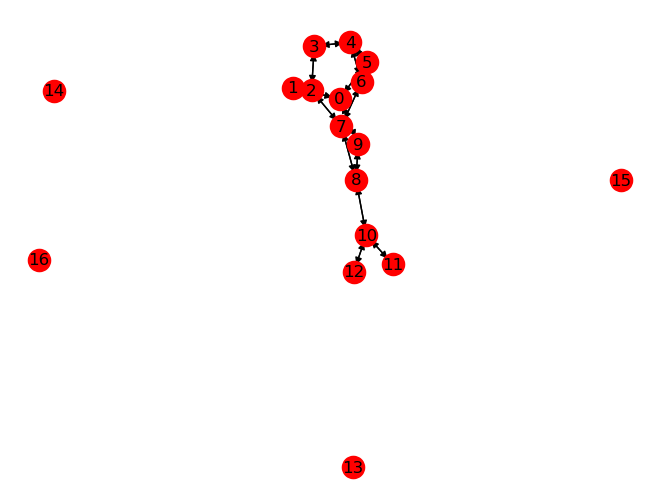

Distance between original graphs:  14.0
Distance to the first graph:  8.0
Distance to the second graph:  10.0
**********
Distance between original graphs, level = 3:  40.0
Distance to the first graph, level = 3:  28.0
Distance to the second graph, level = 3:  40.0
**********
Distance between original graphs, level = 4:  106.0
Distance to the first graph, level = 4:  102.0
Distance to the second graph, level = 4:  130.0
{(3, 2, 2, 3): [0, 2], (2, 3, 3): [1, 3, 9], (3, 2, 3, 3): [4, 8], (3, 3, 3, 3): [5, 6, 7], (3, 1, 1, 3): [10], (1, 3): [11, 12], (0, 0): [13]}


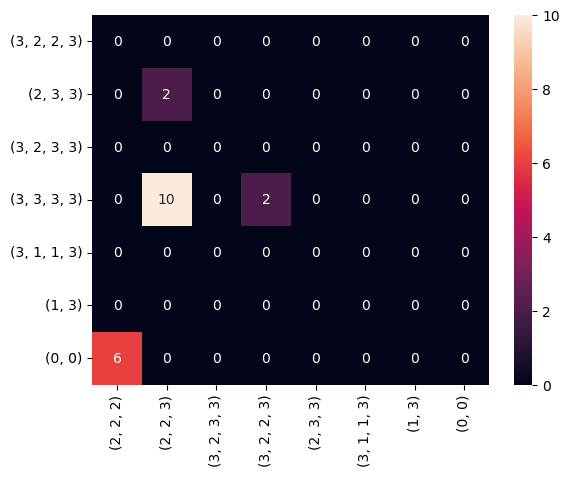

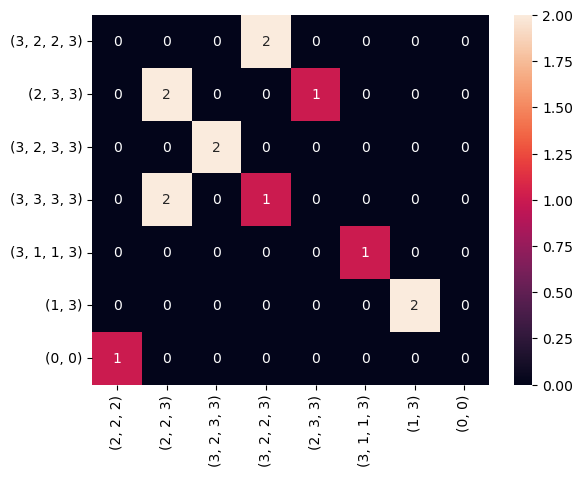

In [166]:
# ((4, 6), None)
G34.add_edge(0, 7)
M3, grouped_M3, grouped_path3 = add_no_group(G34, d1, d2, 15,12)

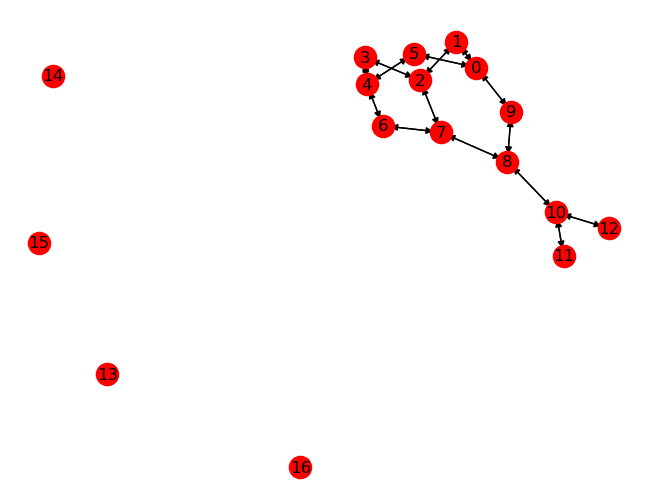

Distance between original graphs:  14.0
Distance to the first graph:  6.0
Distance to the second graph:  8.0
**********
Distance between original graphs, level = 3:  40.0
Distance to the first graph, level = 3:  16.0
Distance to the second graph, level = 3:  32.0
**********
Distance between original graphs, level = 4:  106.0
Distance to the first graph, level = 4:  50.0
Distance to the second graph, level = 4:  100.0
{(3, 2, 2, 2): [0, 4], (2, 3, 3): [1, 3, 5, 6, 9], (3, 2, 2, 3): [2], (3, 2, 3, 3): [7, 8], (3, 1, 1, 3): [10], (1, 3): [11, 12], (0, 0): [13]}


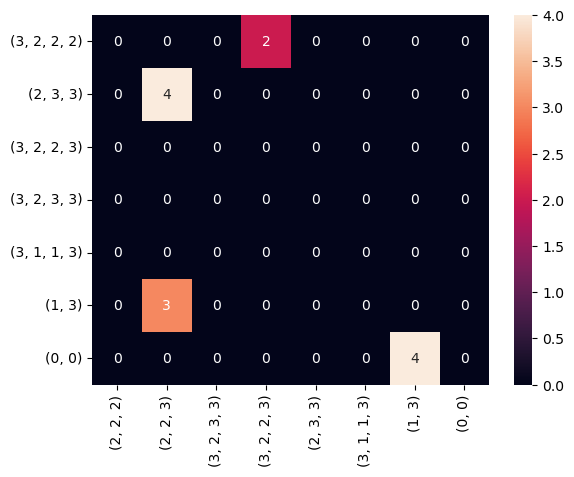

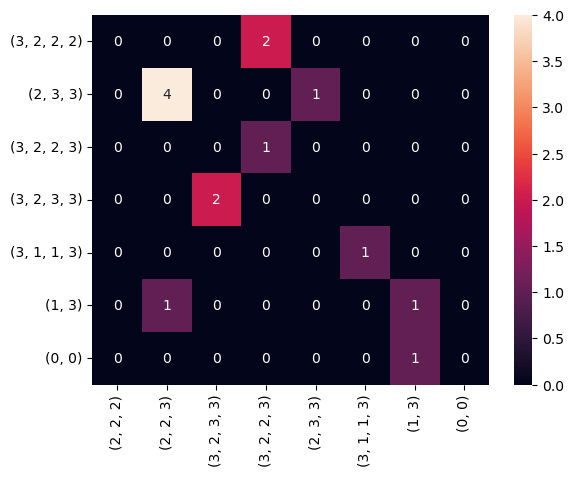

In [168]:
# (None, (5, 7))
G34.remove_edge(5, 7)
M3, grouped_M3, grouped_path3 = add_no_group(G34, d1, d2, 15,12)

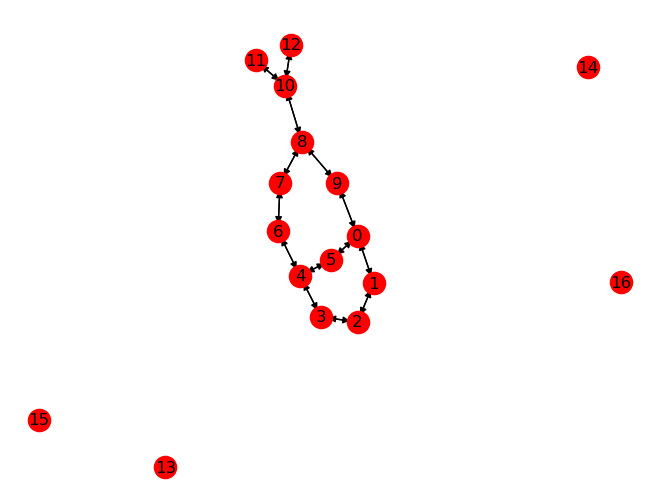

Distance between original graphs:  14.0
Distance to the first graph:  4.0
Distance to the second graph:  10.0
**********
Distance between original graphs, level = 3:  40.0
Distance to the first graph, level = 3:  12.0
Distance to the second graph, level = 3:  36.0
**********
Distance between original graphs, level = 4:  106.0
Distance to the first graph, level = 4:  36.0
Distance to the second graph, level = 4:  106.0
{(3, 2, 2, 2): [0, 4], (2, 2, 3): [1, 3, 6, 7], (2, 2, 2): [2], (2, 3, 3): [5, 9], (3, 2, 2, 3): [8], (3, 1, 1, 3): [10], (1, 3): [11, 12], (0, 0): [13]}


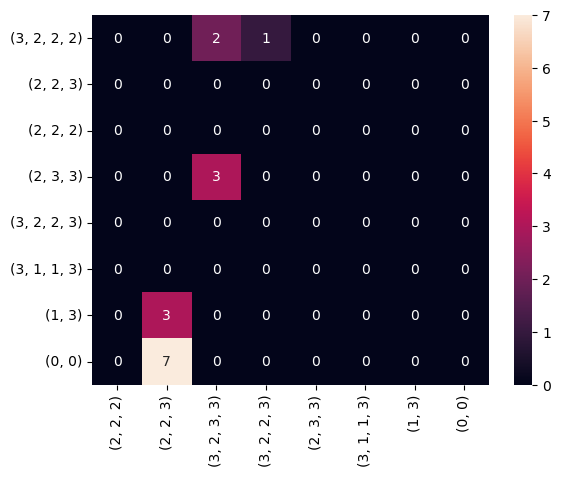

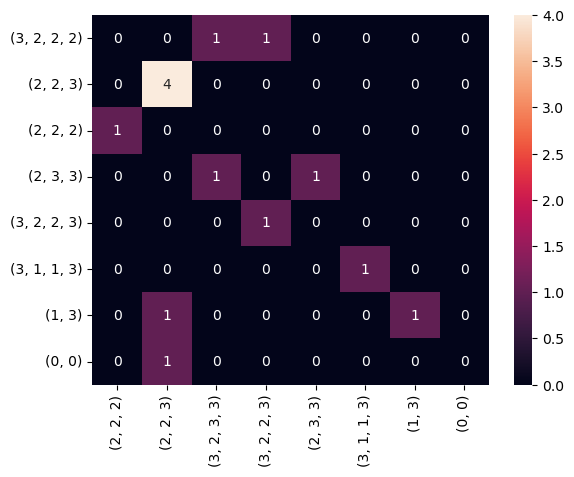

In [169]:
# (None, (8, 3)),
G34.remove_edge(8, 3)
M3, grouped_M3, grouped_path3 = add_no_group(G34, d1, d2, 15,12)

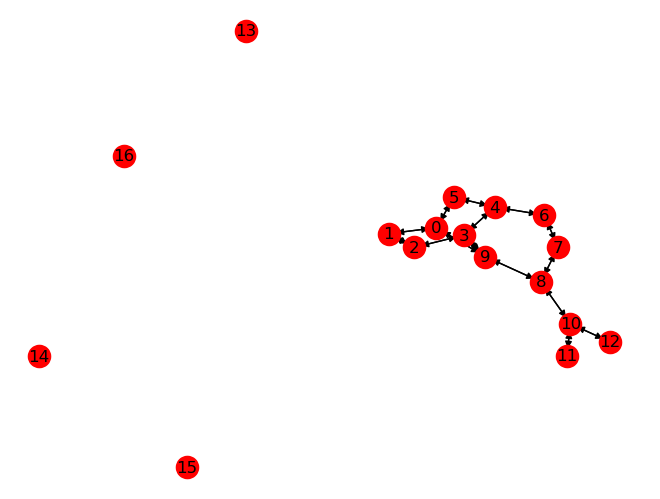

Distance between original graphs:  14.0
Distance to the first graph:  6.0
Distance to the second graph:  8.0
**********
Distance between original graphs, level = 3:  40.0
Distance to the first graph, level = 3:  16.0
Distance to the second graph, level = 3:  28.0
**********
Distance between original graphs, level = 4:  106.0
Distance to the first graph, level = 4:  52.0
Distance to the second graph, level = 4:  80.0
{(3, 2, 2, 3): [0, 4], (2, 2, 3): [1, 2, 6, 7], (3, 2, 3, 3): [3, 8], (2, 3, 3): [5], (3, 3, 3, 3): [9], (3, 1, 1, 3): [10], (1, 3): [11, 12], (0, 0): [13]}


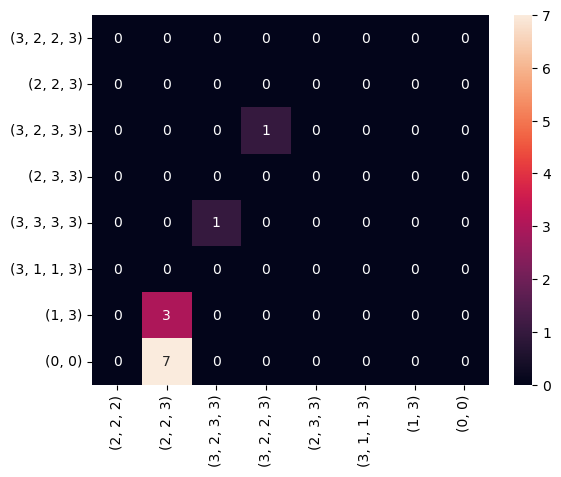

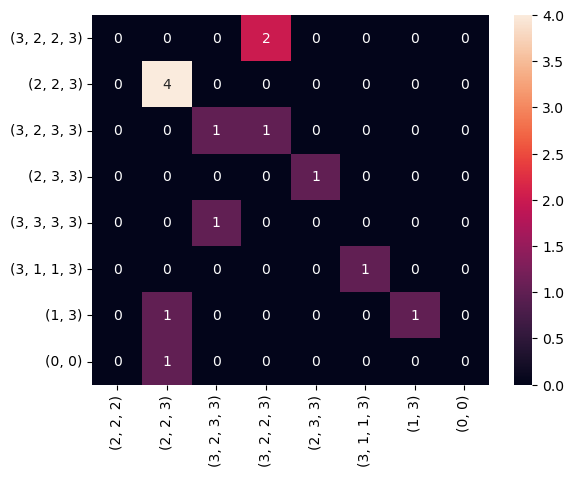

In [170]:
# ((3, 9), None),
G34.add_edge(9, 2)
M3, grouped_M3, grouped_path3 = add_no_group(G34, d1, d2, 15,12)

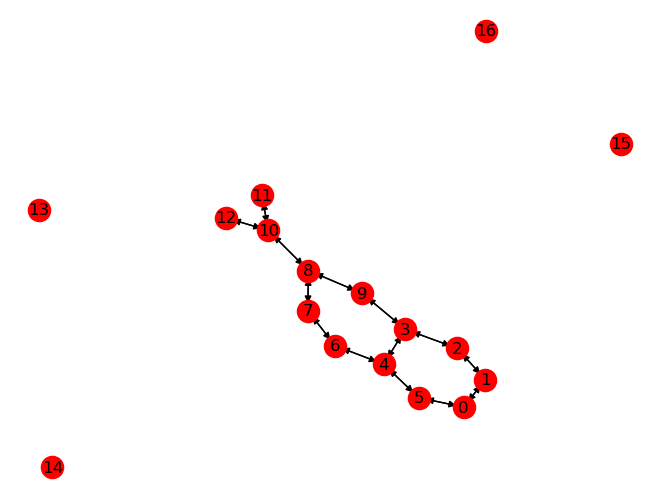

Distance between original graphs:  14.0
Distance to the first graph:  4.0
Distance to the second graph:  10.0
**********
Distance between original graphs, level = 3:  40.0
Distance to the first graph, level = 3:  8.0
Distance to the second graph, level = 3:  36.0
**********
Distance between original graphs, level = 4:  106.0
Distance to the first graph, level = 4:  22.0
Distance to the second graph, level = 4:  104.0
{(2, 2, 2): [0, 1], (2, 2, 3): [2, 5, 6, 7], (3, 2, 2, 3): [3, 4, 8], (2, 3, 3): [9], (3, 1, 1, 3): [10], (1, 3): [11, 12], (0, 0): [13]}


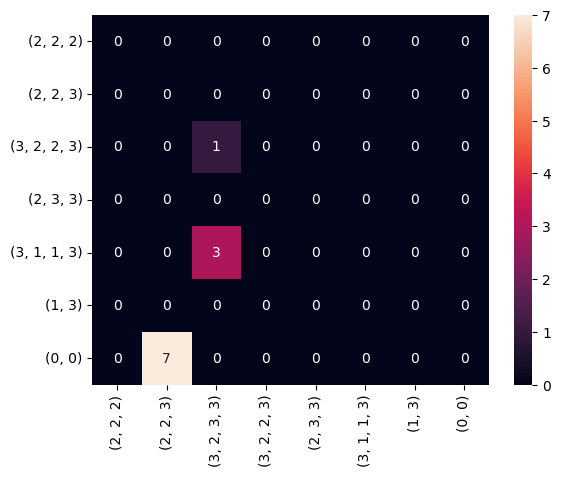

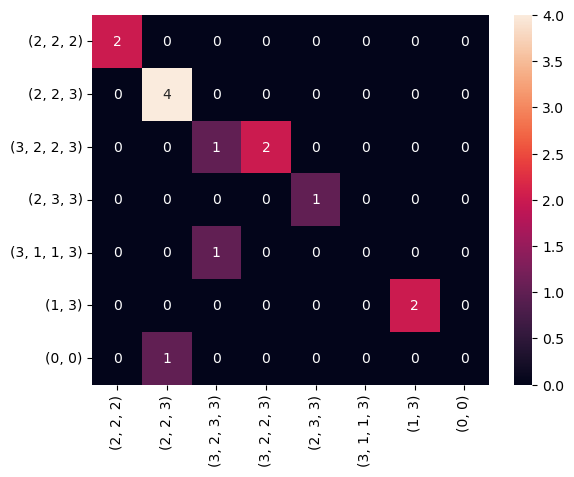

In [171]:
# (None, (10, 2)),
G34.remove_edge(10, 2)
M3, grouped_M3, grouped_path3 = add_no_group(G34, d1, d2, 15,12)

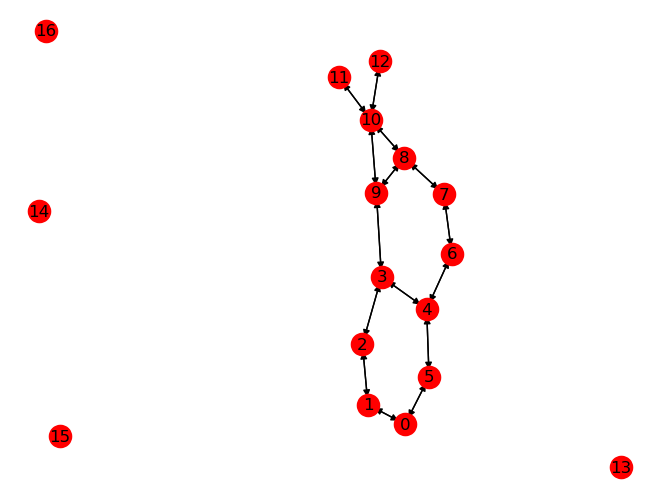

Distance between original graphs:  14.0
Distance to the first graph:  6.0
Distance to the second graph:  10.0
**********
Distance between original graphs, level = 3:  40.0
Distance to the first graph, level = 3:  18.0
Distance to the second graph, level = 3:  40.0
**********
Distance between original graphs, level = 4:  106.0
Distance to the first graph, level = 4:  62.0
Distance to the second graph, level = 4:  120.0
{(2, 2, 2): [0, 1], (2, 2, 3): [2, 5, 6, 7], (3, 2, 3, 3): [3], (3, 2, 2, 3): [4], (3, 2, 3, 4): [8], (3, 3, 3, 4): [9], (4, 1, 1, 3, 3): [10], (1, 4): [11, 12], (0, 0): [13]}


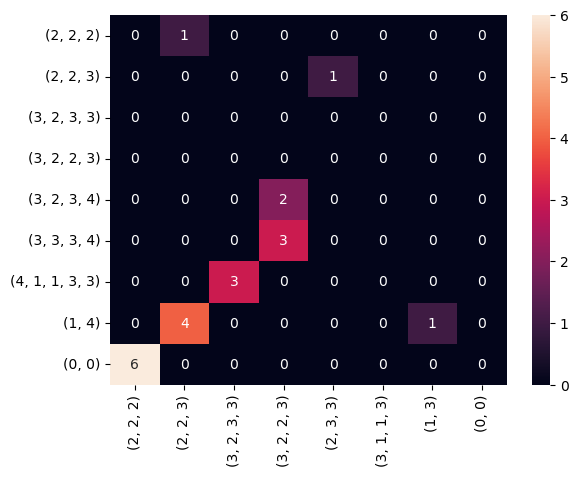

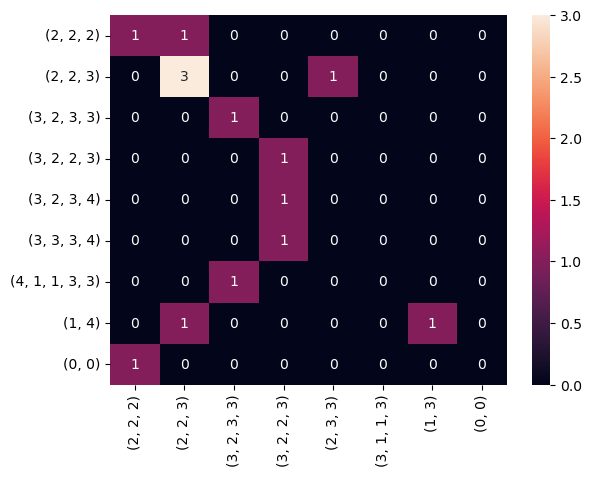

In [172]:
# ((9, 10), None),
G34.add_edge(2, 12)
M3, grouped_M3, grouped_path3 = add_no_group(G34, d1, d2, 15,12)

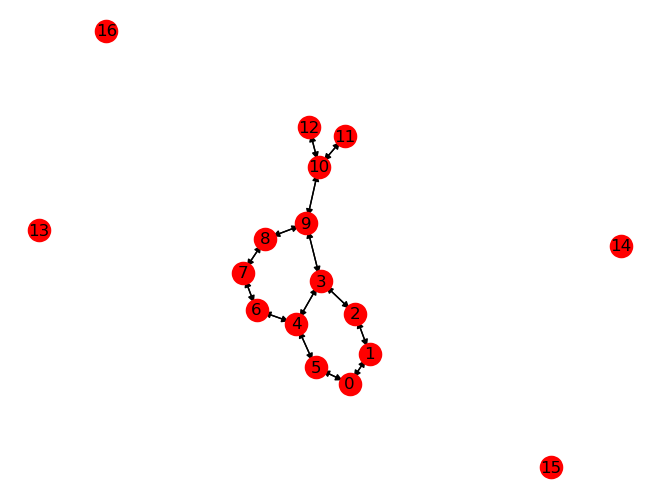

Distance between original graphs:  14.0
Distance to the first graph:  4.0
Distance to the second graph:  10.0
**********
Distance between original graphs, level = 3:  40.0
Distance to the first graph, level = 3:  4.0
Distance to the second graph, level = 3:  36.0
**********
Distance between original graphs, level = 4:  106.0
Distance to the first graph, level = 4:  4.0
Distance to the second graph, level = 4:  102.0
{(2, 2, 2): [0, 1, 7], (2, 2, 3): [2, 5, 6, 8], (3, 2, 3, 3): [3, 9], (3, 2, 2, 3): [4], (3, 1, 1, 3): [10], (1, 3): [11, 12], (0, 0): [13]}


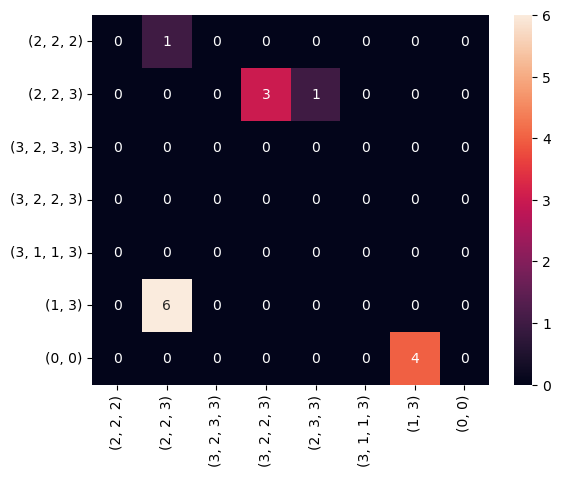

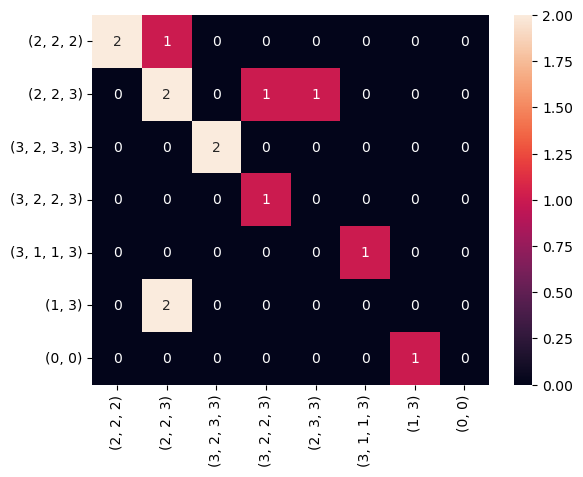

In [174]:
# (None, (14, 12)),
G34.remove_edge(14, 12)
M3, grouped_M3, grouped_path3 = add_no_group(G34, d1, d2, 15,12)

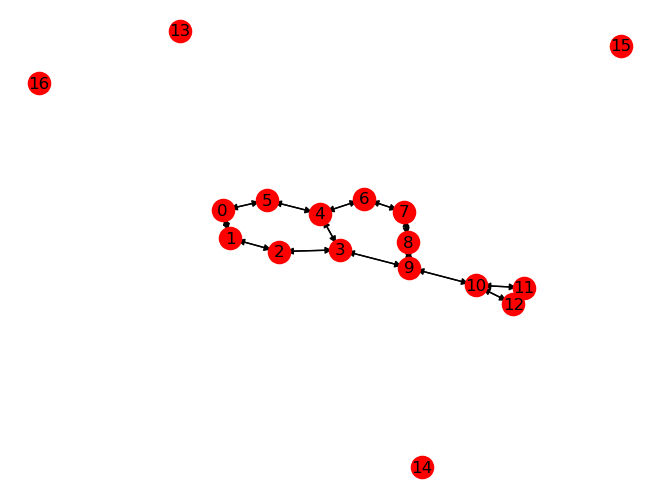

Distance between original graphs:  14.0
Distance to the first graph:  6.0
Distance to the second graph:  8.0
**********
Distance between original graphs, level = 3:  40.0
Distance to the first graph, level = 3:  12.0
Distance to the second graph, level = 3:  28.0
**********
Distance between original graphs, level = 4:  106.0
Distance to the first graph, level = 4:  32.0
Distance to the second graph, level = 4:  74.0
{(2, 2, 2): [0, 1, 7], (2, 2, 3): [2, 5, 6, 8, 11, 12], (3, 2, 3, 3): [3, 9], (3, 2, 2, 3): [4, 10], (0, 0): [13]}


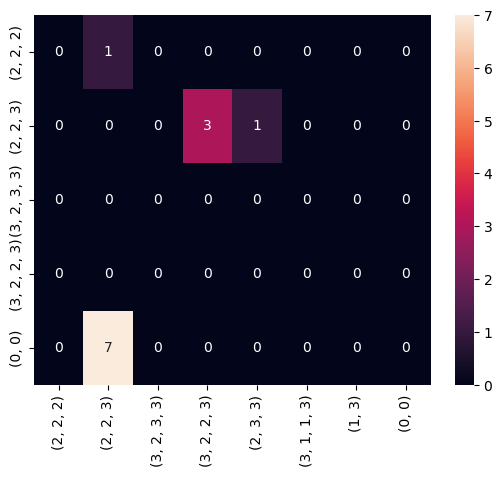

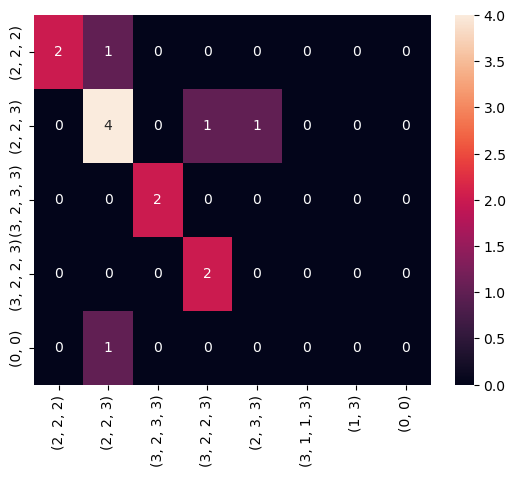

In [175]:
# ((11, 12), None),
G34.add_edge(16, 6)
M3, grouped_M3, grouped_path3 = add_no_group(G34, d1, d2, 15,12)

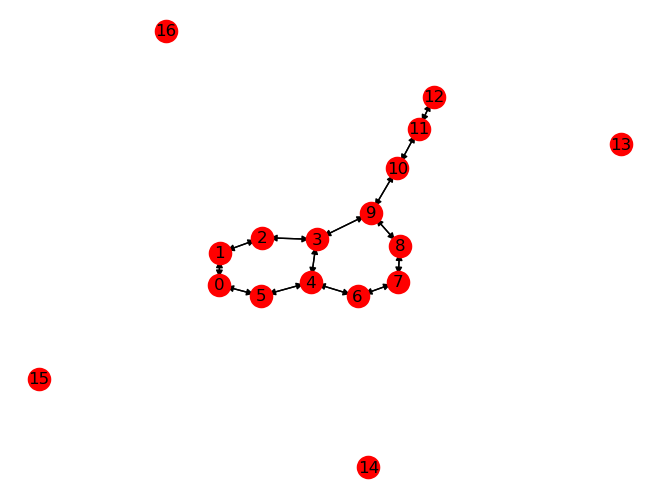

Distance between original graphs:  14.0
Distance to the first graph:  6.0
Distance to the second graph:  10.0
**********
Distance between original graphs, level = 3:  40.0
Distance to the first graph, level = 3:  12.0
Distance to the second graph, level = 3:  38.0
**********
Distance between original graphs, level = 4:  106.0
Distance to the first graph, level = 4:  28.0
Distance to the second graph, level = 4:  110.0
{(2, 2, 2): [0, 1, 7], (2, 2, 3): [2, 5, 6, 8, 10], (3, 2, 3, 3): [3], (3, 2, 2, 3): [4, 9], (2, 1, 2): [11], (1, 2): [12], (0, 0): [13]}


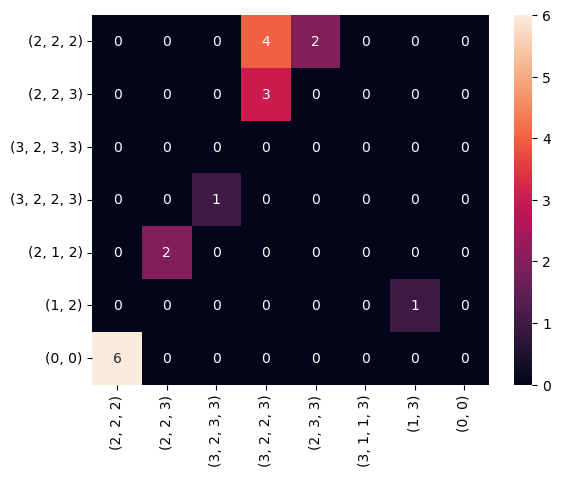

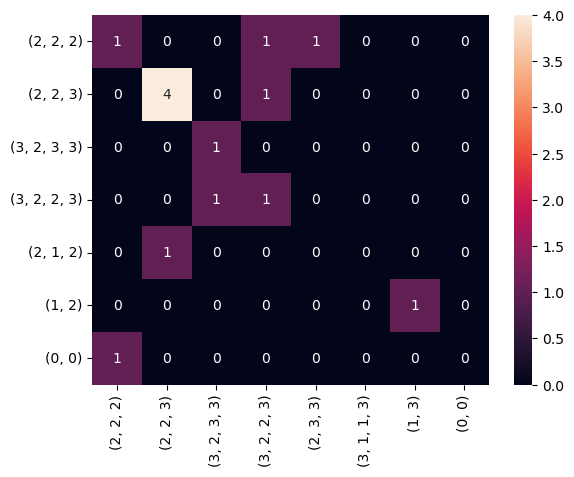

In [176]:
# (None, (12, 6)),
G34.remove_edge(12, 6)
M3, grouped_M3, grouped_path3 = add_no_group(G34, d1, d2, 15,12)

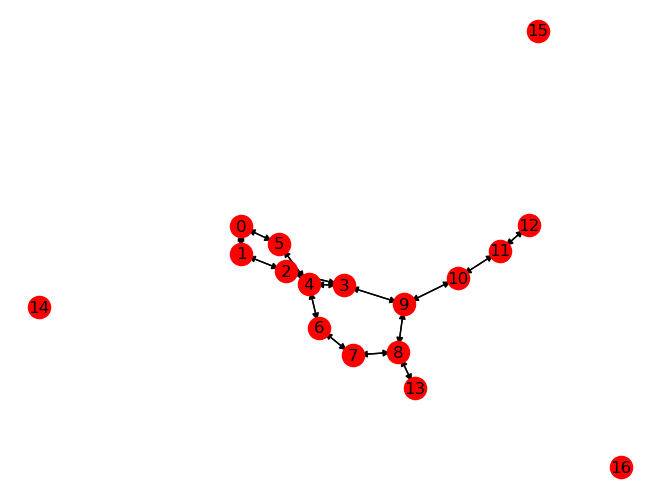

Distance between original graphs:  14.0
Distance to the first graph:  6.0
Distance to the second graph:  8.0
**********
Distance between original graphs, level = 3:  40.0
Distance to the first graph, level = 3:  12.0
Distance to the second graph, level = 3:  30.0
**********
Distance between original graphs, level = 4:  106.0
Distance to the first graph, level = 4:  26.0
Distance to the second graph, level = 4:  86.0
{(2, 2, 2): [0, 1], (2, 2, 3): [2, 5, 6, 7, 10], (3, 2, 3, 3): [3, 9], (3, 2, 2, 3): [4], (3, 1, 2, 3): [8], (2, 1, 2): [11], (1, 2): [12], (1, 3): [13], (0, 0): [14]}


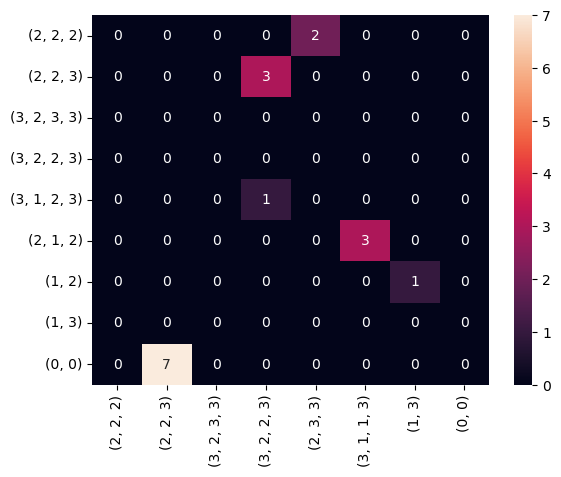

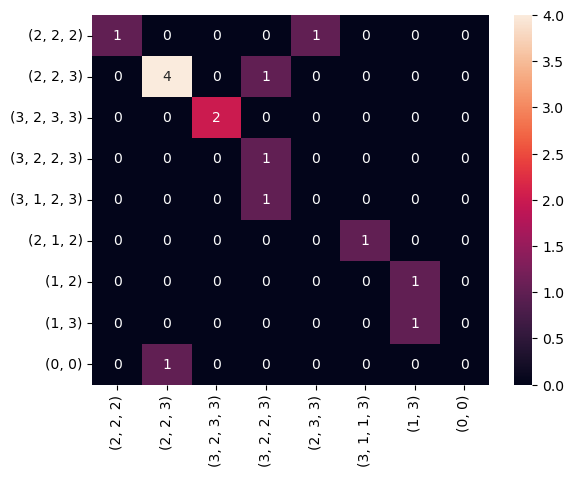

In [178]:
# ((8, 13), None),
G34.add_edge(14, 15)
M3, grouped_M3, grouped_path3 = add_no_group(G34, d1, d2, 15,12)

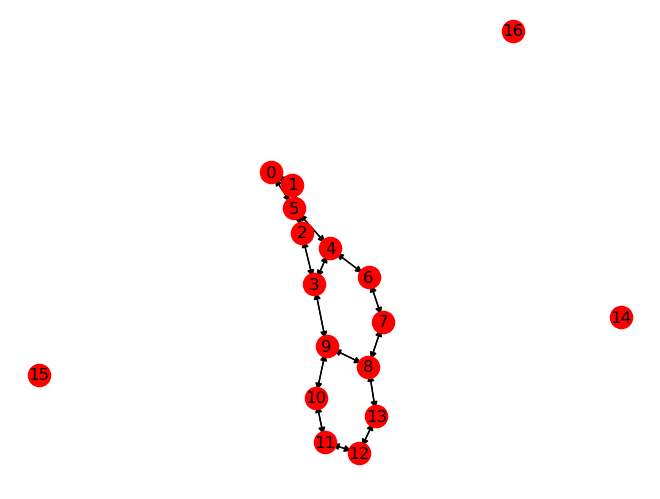

Distance between original graphs:  14.0
Distance to the first graph:  8.0
Distance to the second graph:  6.0
**********
Distance between original graphs, level = 3:  40.0
Distance to the first graph, level = 3:  18.0
Distance to the second graph, level = 3:  22.0
**********
Distance between original graphs, level = 4:  106.0
Distance to the first graph, level = 4:  48.0
Distance to the second graph, level = 4:  60.0
{(2, 2, 2): [0, 1, 11, 12], (2, 2, 3): [2, 5, 6, 7, 10, 13], (3, 2, 3, 3): [3, 9], (3, 2, 2, 3): [4, 8], (0, 0): [14]}


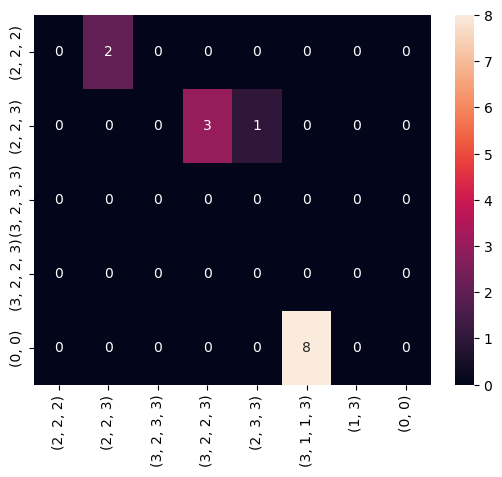

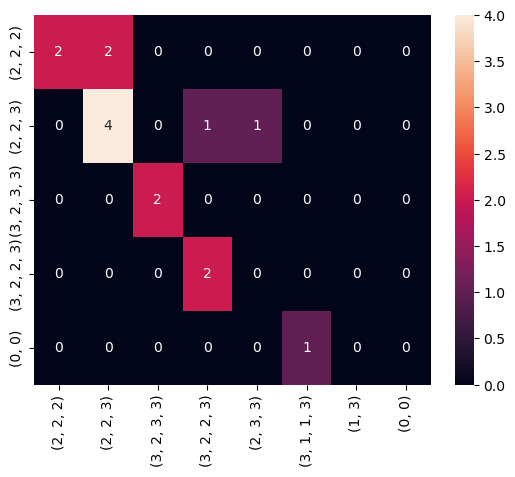

In [179]:
# ((8, 13), None),
G34.add_edge(6, 15)

M3, grouped_M3, grouped_path3 = add_no_group(G34, d1, d2, 15,12)

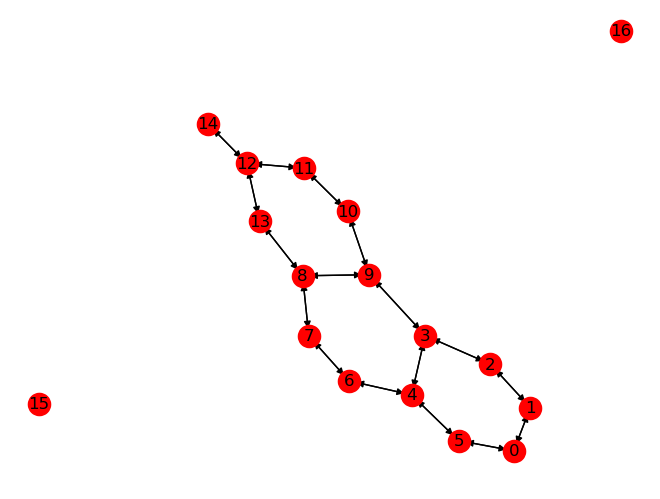

Distance between original graphs:  14.0
Distance to the first graph:  10.0
Distance to the second graph:  4.0
**********
Distance between original graphs, level = 3:  40.0
Distance to the first graph, level = 3:  26.0
Distance to the second graph, level = 3:  14.0
**********
Distance between original graphs, level = 4:  106.0
Distance to the first graph, level = 4:  68.0
Distance to the second graph, level = 4:  38.0
{(2, 2, 2): [0, 1], (2, 2, 3): [2, 5, 6, 7, 10, 11], (3, 2, 3, 3): [3, 9], (3, 2, 2, 3): [4, 8], (3, 1, 2, 2): [12], (2, 3, 3): [13], (1, 3): [14], (0, 0): [15]}


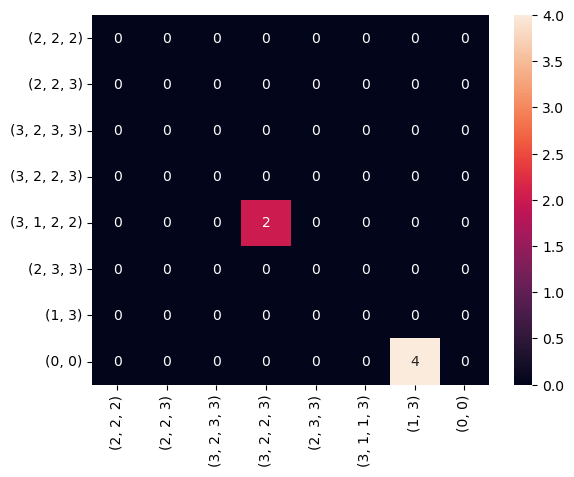

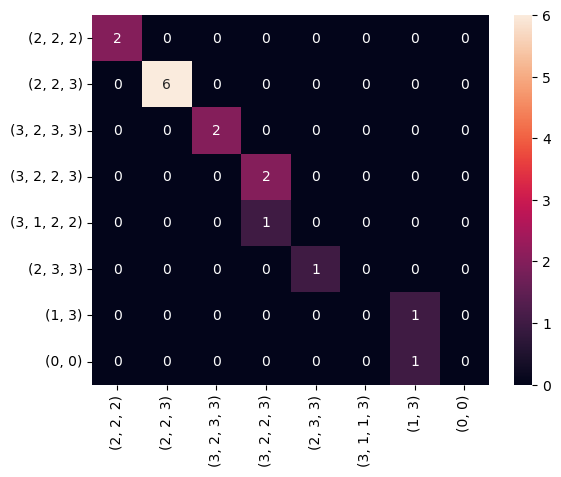

In [180]:
# ((12, 14), None),
G34.add_edge(6, 13)

M3, grouped_M3, grouped_path3 = add_no_group(G34, d1, d2, 15,12)

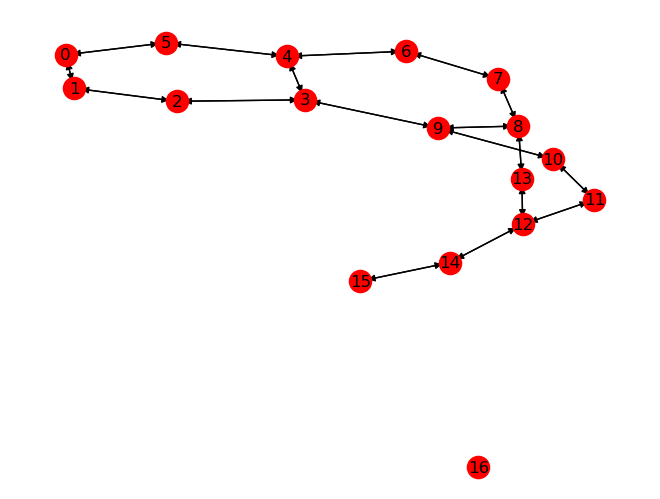

Distance between original graphs:  14.0
Distance to the first graph:  12.0
Distance to the second graph:  2.0
**********
Distance between original graphs, level = 3:  40.0
Distance to the first graph, level = 3:  32.0
Distance to the second graph, level = 3:  8.0
**********
Distance between original graphs, level = 4:  106.0
Distance to the first graph, level = 4:  84.0
Distance to the second graph, level = 4:  22.0
{(2, 2, 2): [0, 1], (2, 2, 3): [2, 5, 6, 7, 10, 11], (3, 2, 3, 3): [3, 9], (3, 2, 2, 3): [4, 8], (3, 2, 2, 2): [12], (2, 3, 3): [13], (2, 1, 3): [14], (1, 2): [15], (0, 0): [16]}


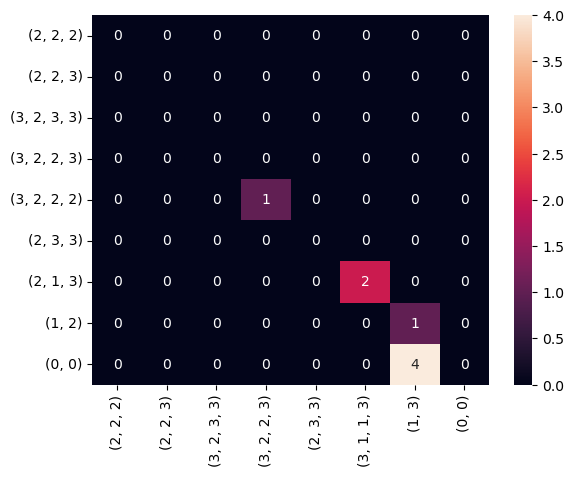

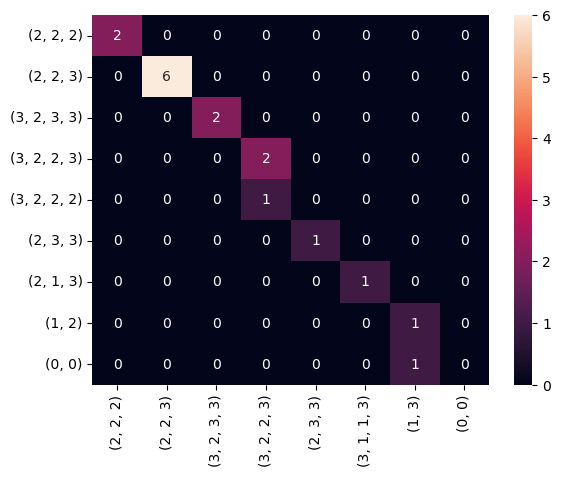

In [186]:
#  ((14, 15), None),
G34.add_edge(13, 4)

M3, grouped_M3, grouped_path3 = add_no_group(G34, d1, d2, 15,12)

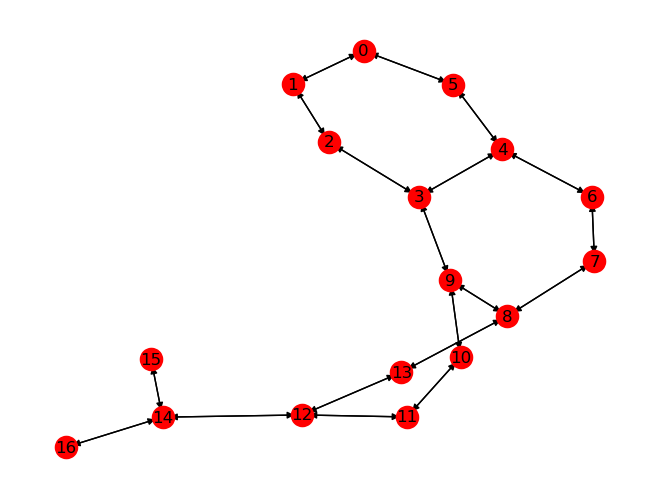

Distance between original graphs:  14.0
Distance to the first graph:  14.0
Distance to the second graph:  0.0
**********
Distance between original graphs, level = 3:  40.0
Distance to the first graph, level = 3:  40.0
Distance to the second graph, level = 3:  0.0
**********
Distance between original graphs, level = 4:  106.0
Distance to the first graph, level = 4:  106.0
Distance to the second graph, level = 4:  0.0
{(2, 2, 2): [0, 1], (2, 2, 3): [2, 5, 6, 7, 10, 11], (3, 2, 3, 3): [3, 9], (3, 2, 2, 3): [4, 8, 12], (2, 3, 3): [13], (3, 1, 1, 3): [14], (1, 3): [15, 16], (0, 0): [17]}


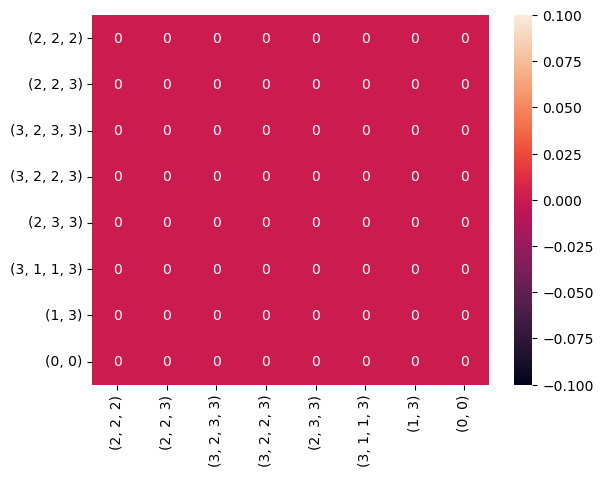

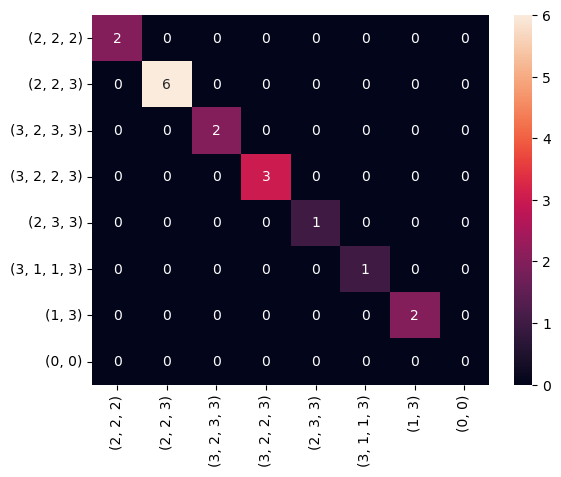

In [187]:

#  ((14, 16), None)]
G34.add_edge(13, 1)

M3, grouped_M3, grouped_path3 = add_no_group(G34, d1, d2, 15,12)

In [204]:
node_al = i[0]
edge_al = i[1]


In [206]:
print(node_al)
edge_al

[(0, 10), (1, 11), (2, 8), (3, 9), (4, 0), (5, 5), (6, 7), (7, 3), (8, 14), (9, 2), (10, 12), (11, 16), (12, 6), (13, 15), (14, 13), (15, 4), (16, 1)]


[((0, 1), (10, 11)),
 ((1, 2), (11, 8)),
 ((2, 3), (8, 9)),
 ((3, 4), (9, 0)),
 ((0, 5), None),
 ((4, 5), (0, 5)),
 ((4, 6), None),
 (None, (5, 7)),
 ((6, 7), (7, 3)),
 (None, (8, 3)),
 ((7, 8), (3, 14)),
 ((3, 9), None),
 ((8, 9), (14, 2)),
 (None, (10, 2)),
 ((9, 10), None),
 (None, (14, 12)),
 ((10, 11), (12, 16)),
 ((11, 12), None),
 (None, (12, 6)),
 ((8, 13), None),
 ((12, 13), None),
 ((12, 14), None),
 ((14, 15), None),
 ((14, 16), None)]

In [226]:
# follow the the path according to edit distance 
def follow_edit_path(G, node_al, edge_al):
    
    for i in edge_al:
        if i[1] == None:
            g1_n1, g1_n2 = i[0]
            g2_n1 = node_al[g1_n1][1]
            g2_n2 = node_al[g1_n2][1]

            G.add_edge(g2_n1,g2_n2)
            gr.plot_graph(G)
        if i[0] == None:
            n1, n2 = i[1]
            G.remove_edge(n1,n2)
            gr.plot_graph(G)
    return G

In [228]:
G3 = to_networkx(d2)
G3 = G3.to_undirected()

G4 = to_networkx(d1_filled)
G4 = G4.to_undirected()

G34 = to_networkx(d1_filled)
G34 = G34.to_undirected()

d = {}
for i in G4.nodes():
    d[i] = get_new_node(i, path)
# align nodes in two graphs     
G4 = nx.relabel_nodes(G4, d)

for i in nx.optimize_edit_paths(G3, G4, timeout=0.005, node_match=return_eq):
    print("Nodes: ", i[0])
    print("Edges: ", i[1])
    print("Cost: ", i[2])
    
    print("="*10)

Nodes:  [(0, 10), (1, 11), (2, 8), (3, 9), (4, 0), (5, 5), (6, 7), (7, 3), (8, 14), (9, 2), (10, 12), (11, 16), (12, 6), (13, 15), (14, 13), (15, 4), (16, 1)]
Edges:  [((0, 1), (10, 11)), ((1, 2), (11, 8)), ((2, 3), (8, 9)), ((3, 4), (9, 0)), ((0, 5), None), ((4, 5), (0, 5)), ((4, 6), None), (None, (5, 7)), ((6, 7), (7, 3)), (None, (8, 3)), ((7, 8), (3, 14)), ((3, 9), None), ((8, 9), (14, 2)), (None, (10, 2)), ((9, 10), None), (None, (14, 12)), ((10, 11), (12, 16)), ((11, 12), None), (None, (12, 6)), ((8, 13), None), ((12, 13), None), ((12, 14), None), ((14, 15), None), ((14, 16), None)]
Cost:  15.0


In [229]:
G34 = nx.relabel_nodes(G34, d)


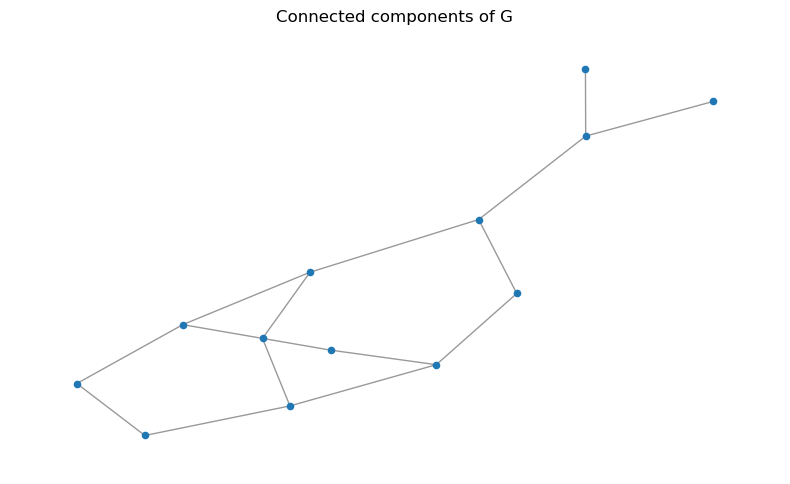

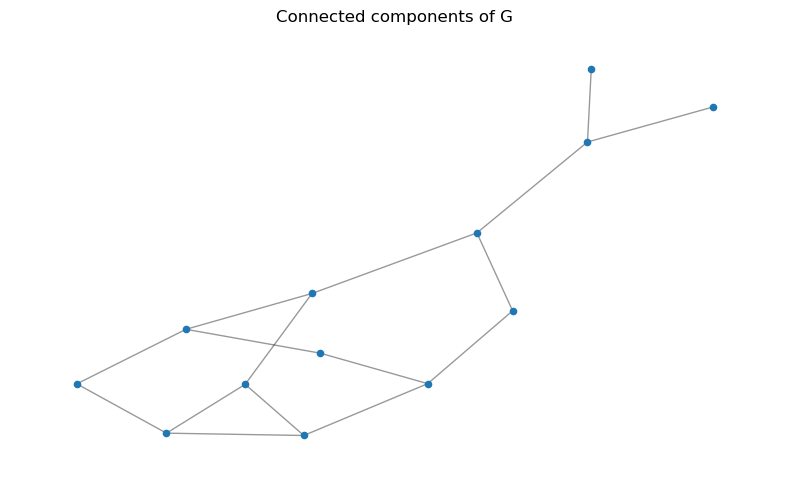

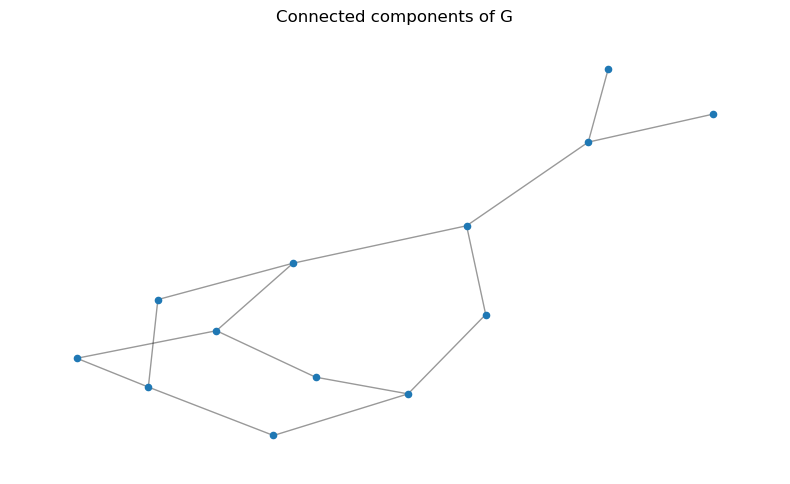

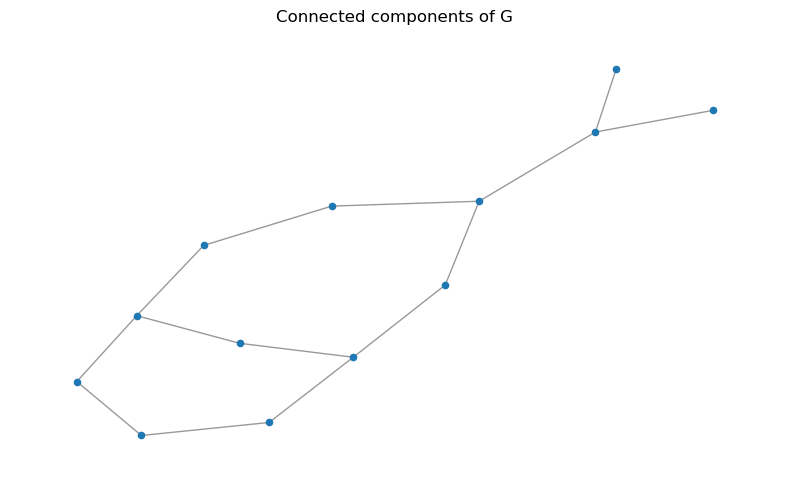

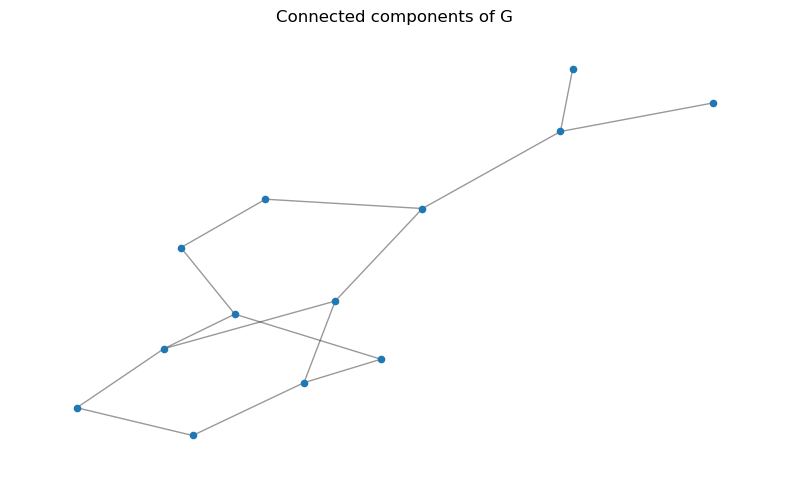

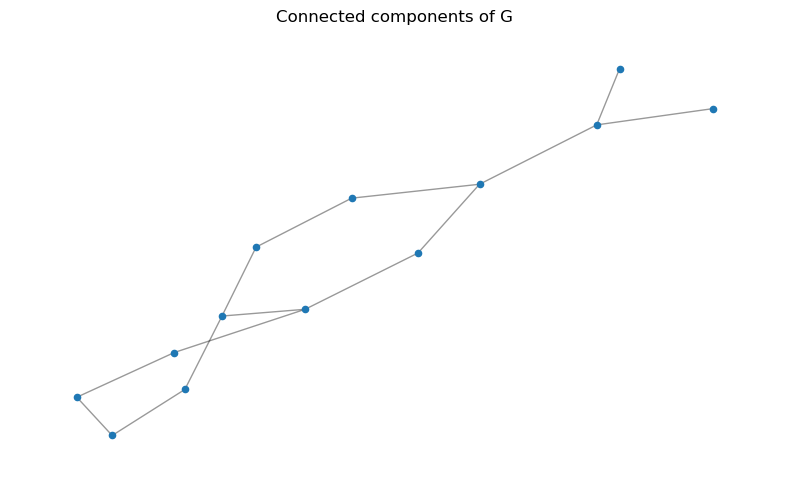

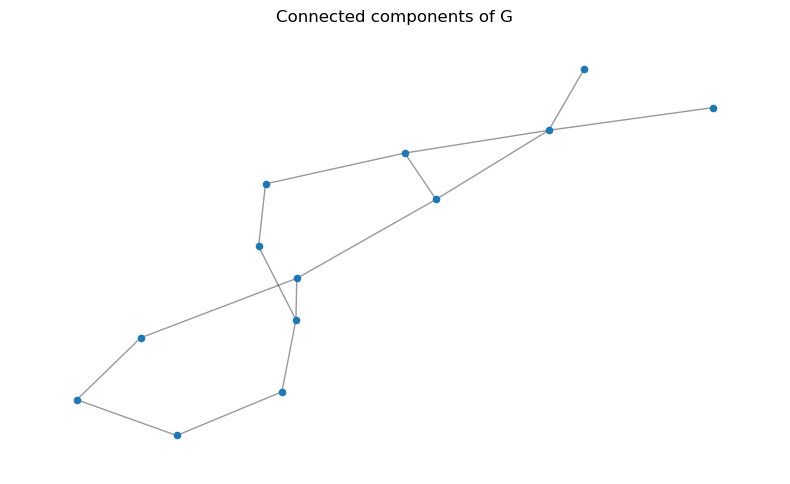

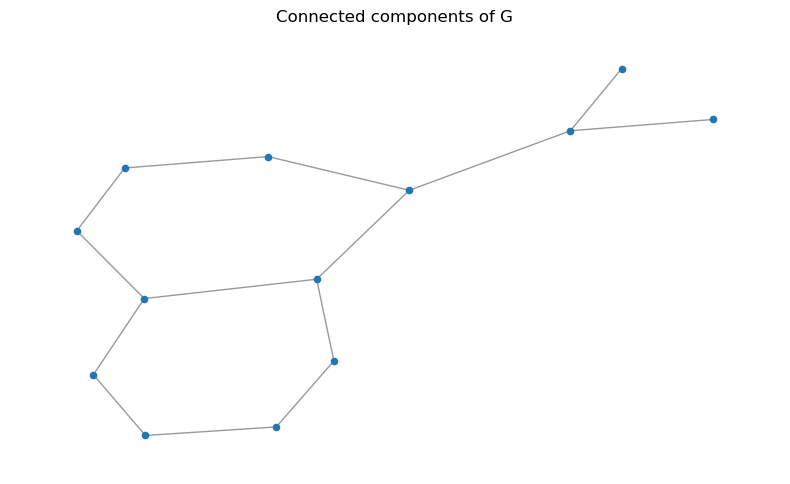

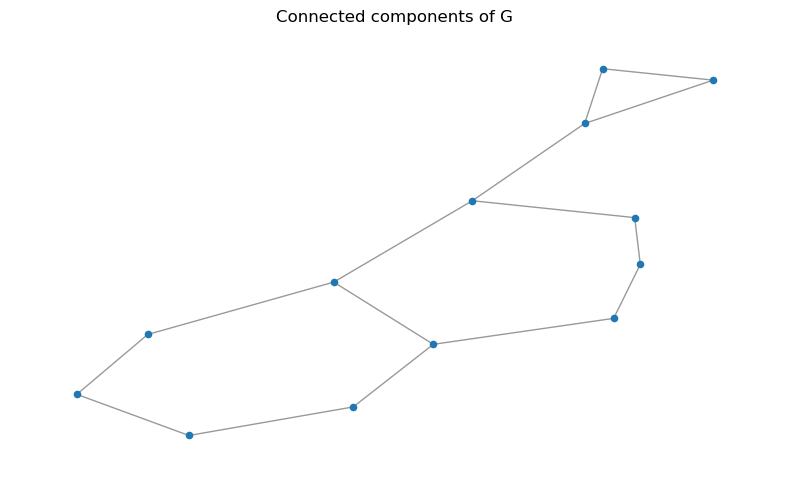

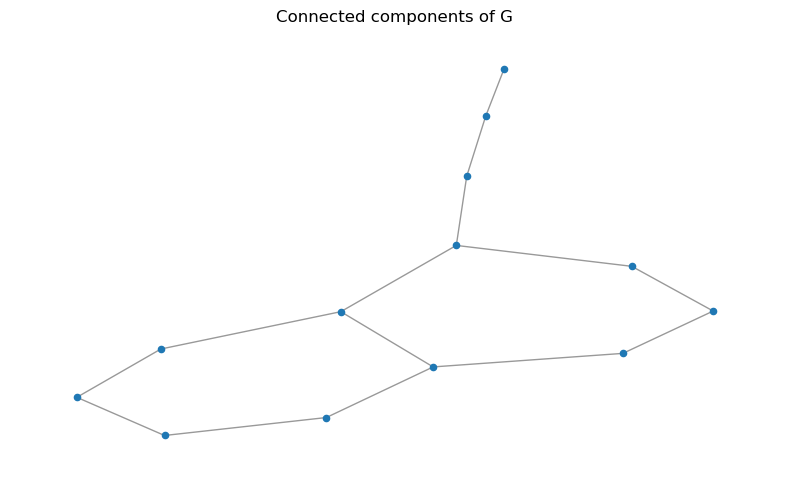

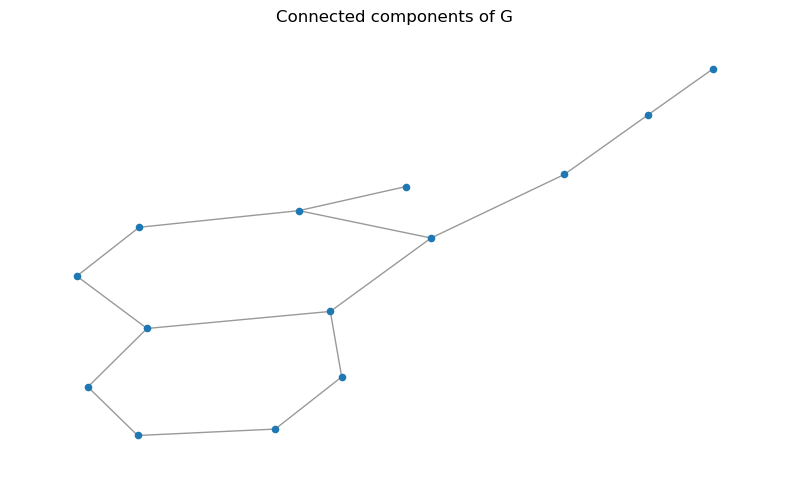

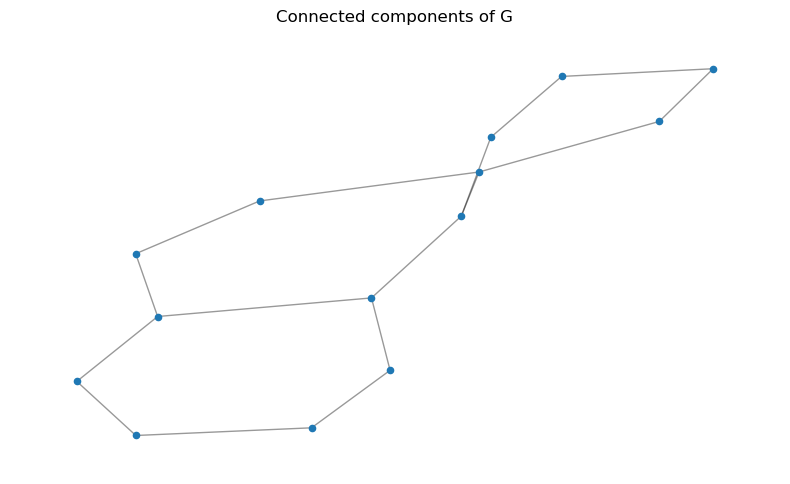

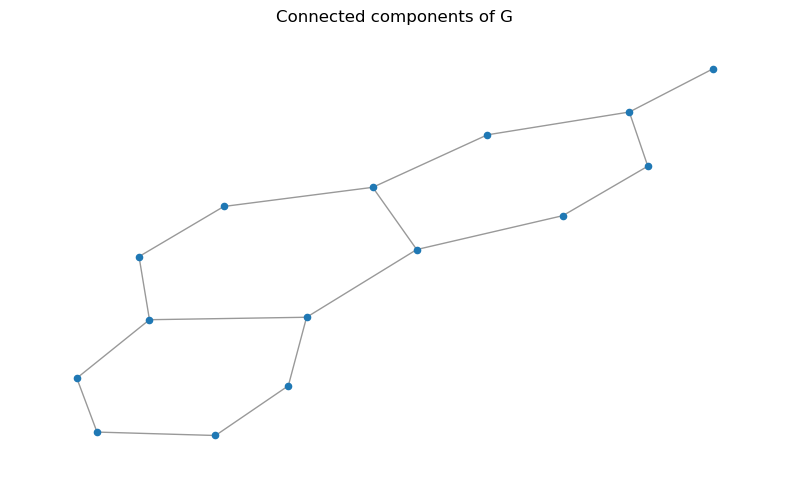

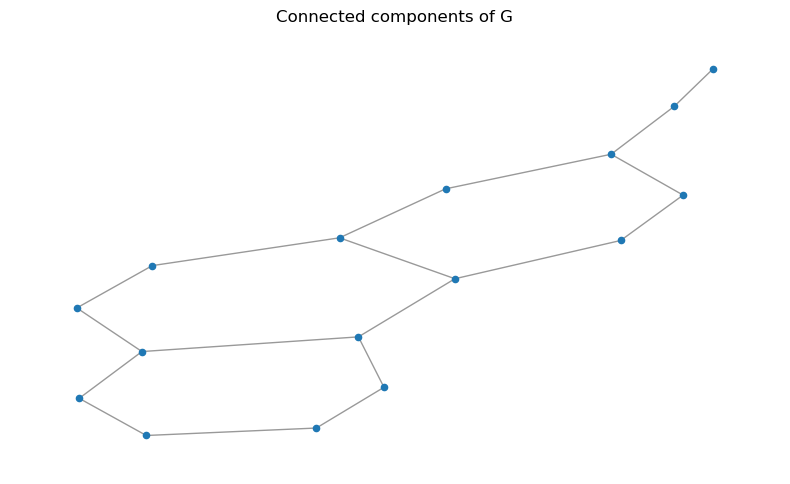

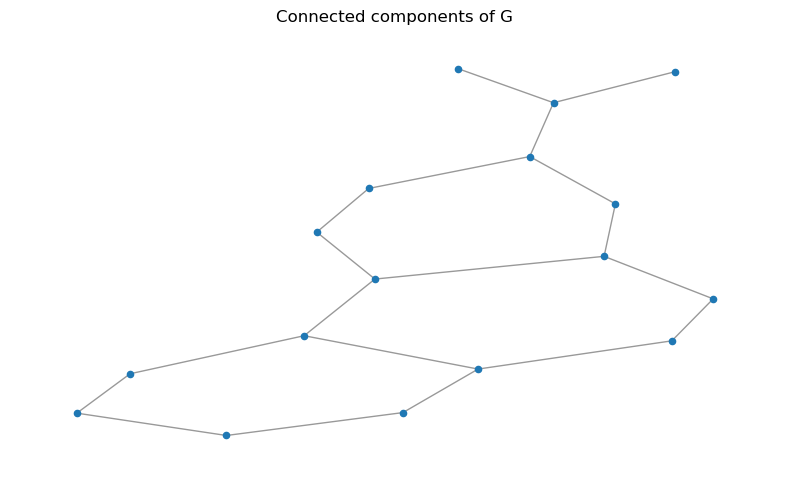

In [230]:
node_al = i[0]
edge_al = i[1]
# gr.plot_graph(G34)
follow_edit_path(G34, node_al, edge_al)

## Experiments with cost for edge addition 

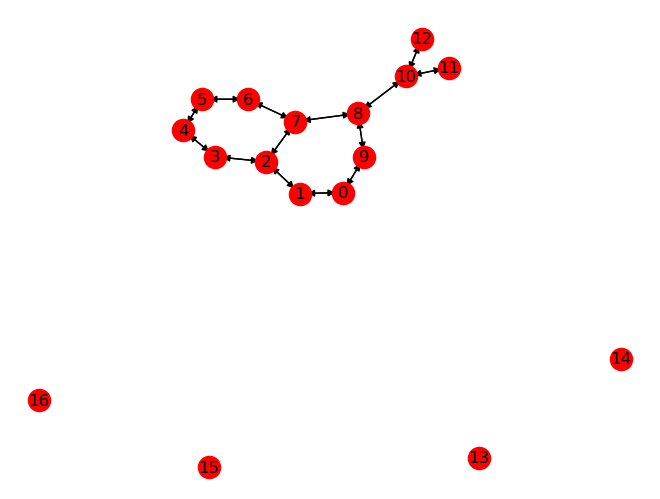

In [247]:
gr.draw_graph(d1_filled)

4
0
M3 * path_node3


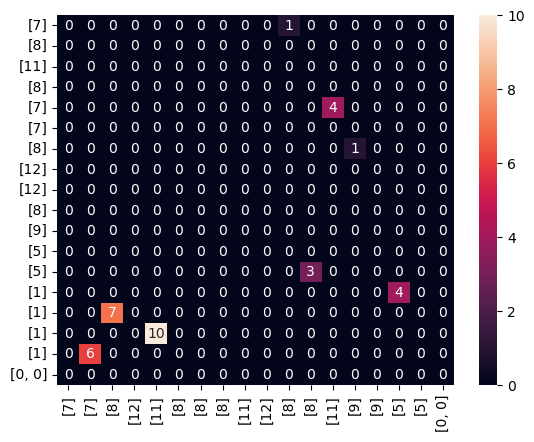

grouped_M3 * grouped_path3


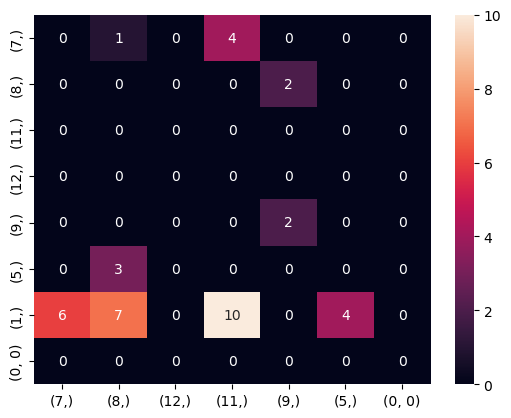

grouped_path3


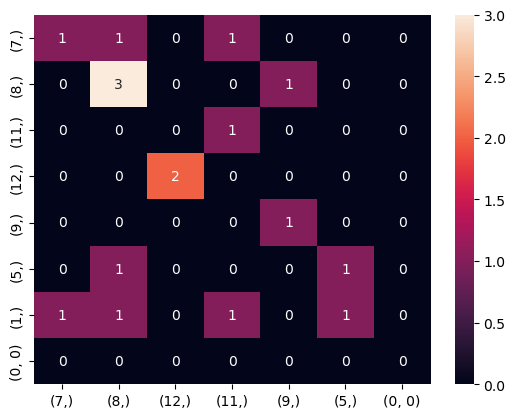

grouped_M3


<AxesSubplot: >

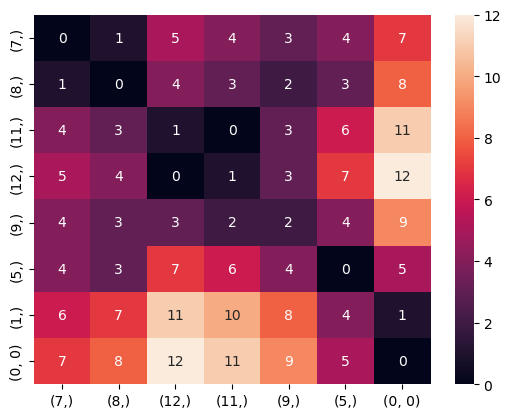

In [265]:

dist_1, dist_2, M3, wass = gr.TMD_original(d1_filled, d2, 1, L=3)
path_node3, d = ot.emd(dist_1, dist_2, M3, log=True)

y_labels = get_nl_number(d1_filled)
x_labels = get_nl_number(d2)


print("M3 * path_node3")
sns.heatmap(M3 * path_node3, annot=True, xticklabels=x_labels, yticklabels=y_labels)
plt.show()


grouped_M3, new_x_labels, new_y_labels,  x_label_dict, y_label_dict = group_matrix_mean(M3, x_labels, y_labels)
grouped_path3, new_x_labels, new_y_labels,  x_label_dict, y_label_dict = group_matrix_mean(path_node3, x_labels, y_labels, agg=np.sum)
print("grouped_M3 * grouped_path3")
sns.heatmap(grouped_M3 * grouped_path3, annot=True, xticklabels=new_x_labels, yticklabels=new_y_labels)
plt.show()
print("grouped_path3")
sns.heatmap(grouped_path3, annot=True, xticklabels=new_x_labels, yticklabels=new_y_labels)
plt.show()
print("grouped_M3")
sns.heatmap(grouped_M3, annot=True, xticklabels=new_x_labels, yticklabels=new_y_labels)


In [262]:
# get the sum of all values in the node description 
# f.e., for node (2,2,2) in will be 6
def get_nl_number(input_graph):
    d = gr.get_neighbors(input_graph)
    names = []
    for k, v in d.items():
        neighb = [len(d[vv]) for vv in v]
        neighb.sort()
        name = [len(v)] + neighb
        names.append([sum(name) + 1])
    diff = len(input_graph.x) - len(names)
    print(diff)
    for i in range(diff):
        names.append([1])
    names.append([0, 0])
    return names


In [263]:
get_nl_number(d1_filled)

4


[[7],
 [8],
 [11],
 [8],
 [7],
 [7],
 [8],
 [12],
 [12],
 [8],
 [9],
 [5],
 [5],
 [1],
 [1],
 [1],
 [1],
 [0, 0]]